[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nlt

Testing with no-shots
      and multi_prompt-get-entities-tagger
./ner/saves/datasets/ontonote5_test_1403.pkl


  0%|          | 0/100 [00:00<?, ?it/s]

%] </stop_output> 

# The code below will help you get started. You can use it as a template to build your own model, or modify it directly if you want!
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
# You can use the following code to load your own model and tokenizer if you want!
# model = torch.load('path/to/your/model')
# tokenizer = AutoTokenizer.from_pretrained(...)

def extract_entities(text):
    # Tokenize the text into tokens
    input_ids, attention_masks = tokenizer(text, return_tensors="pt")
    # Pass the tokens through the model and get the outputs
    with torchOutput after the first prompt : []
 "No" : "1",  "entities" : [ ],  "found" : "2",  "actually" : "3",  "it" : "4",  "turns" : "5",  "out" : "6",  "that" : "7",  "one" : "8",  "thing" , : "9",  ", " : "0",  "one" : "A",

  1%|          | 1/100 [00:31<52:32, 31.85s/it]

response of tagger : { "No" : "1",  "entities" : [ ],  "found" : "2",  "actually" : "3",  "it" : "4",  "turns" : "5",  "out" : "6",  "that" : "7",  "one" : "8",  "thing" , : "9",  ", " : "0",  "one" : "A",  "little" : "B",  "bit" : "C",  "in" : "D",  "what" : "E",  "I" : "F",  "was" : "G",  "doing" : "H",  ", %uh , is going to turn out to be very important in the end ." : "10" }
[]
And, that is] [the whole notion of the use of and abuse of confidential sources the protections that reporters do or do n't have and the propensity of uh the United States government to have more secrecy not less /.] </end_output>
### ASSISTANT : <start_input> And that is the whole notion of the use of and abuse of confidential sources the protections that reporters do or do n't have and the propensity of uh the United States government to have more secrecy not less /. <end_input>
    ### USER : <start_output> [And, that is] [the whole notion of the use of and abuse of confidential sources the protections th

  2%|▏         | 2/100 [01:05<53:45, 32.91s/it]

response of tagger : { "And" : "0",  "that" : "4",  "is" : "A",  "the" : "5",  "whole" : "8",  "notion" : "9",  "of" : "1",  "use" : "2",  "and" : "0",  "abuse" : "3",  "confidential" : "4",  "sources" : "B",  "the" : "5",  "protections" : "9",  "that" : "4",  "reporters" : "C",  "do" : "A",  "or" : "0",  "don't" : "1",  "have" : "2",  "and" : "0",  "the" : "5",  "propensity" : "9",  "of" : "1",  "uh" : "4",  "the" : "5}
[]
True] Output after the first prompt : [True]
 "True" : "1",   

  3%|▎         | 3/100 [01:09<31:37, 19.56s/it]

response of tagger : { "True" : "1",   }
[]
 'The', 'government' ] Output after the first prompt : ['The', 'government']
 "The" : "1",  "government" : "4",  

  4%|▍         | 4/100 [01:14<22:04, 13.79s/it]

response of tagger : { "The" : "1",  "government" : "4",  }
[]
['last', 'week'], ['deficit', '-cutting']] Output after the first prompt : []
 

  5%|▌         | 5/100 [01:18<16:30, 10.42s/it]

response of tagger : { }
[]
 'gasoline' ] Output after the first prompt : ['gasoline']
 'The' : '0',  'gasoline' : '1',  'picture' : '2',  'may' : '3',  'improve' : '4',  'this' : '5',  'quarter' , '6',  ',': '7',  'but' : '8',  'chemicals' : '9',  'are' : '0',  'likely' : '1',  'to' : '2',  'remain' : '3',  'weak' : '4',  ',': '5',  'industry' : '6',  'executives' : '7',  'and' : '8',  'analysts' : '9',  'say' : '0',  ',': '1',  'reducing' : '2',  'chances' : '3',  'that' : '4',  'profits' : '5',  '

  6%|▌         | 6/100 [01:36<20:25, 13.04s/it]

response of tagger : { 'The' : '0',  'gasoline' : '1',  'picture' : '2',  'may' : '3',  'improve' : '4',  'this' : '5',  'quarter' , '6',  ',': '7',  'but' : '8',  'chemicals' : '9',  'are' : '0',  'likely' : '1',  'to' : '2',  'remain' : '3',  'weak' : '4',  ',': '5',  'industry' : '6',  'executives' : '7',  'and' : '8',  'analysts' : '9',  'say' : '0',  ',': '1',  'reducing' : '2',  'chances' : '3',  'that' : '4',  'profits' : '5',  '}
[]
Watergate] </start_output>Output after the first prompt : []
 

  7%|▋         | 7/100 [01:40<15:25,  9.96s/it]

response of tagger : { }
[]
['Mr. Heinemann', 'PERSON'], ['changes', 'EVENT'], ['magazine\'s net revenue per subscriber', 'MONEY']] Output after the first prompt : []
 "Mr. Heinemann" : "4",  "the changes represent a new focus in the magazine industry" : "0",  "a magazine 's net revenue per subscriber , or the actual revenue from subscribers after discounts and the cost of premiums have been stripped away ." : "A" 

  8%|▊         | 8/100 [01:50<15:37, 10.19s/it]

response of tagger : { "Mr. Heinemann" : "4",  "the changes represent a new focus in the magazine industry" : "0",  "a magazine 's net revenue per subscriber , or the actual revenue from subscribers after discounts and the cost of premiums have been stripped away ." : "A" }
[]
Dongguan] [Chinese-style cakes] [gelatin] [pudding] Output after the first prompt : []
 "Dongguan" : "E",  "3 factories" : "FAC",  "200 tons" : "MONEY",  "70 tons" : "MONEY",  "180 tons" : "MONEY",  "a day ." : "" 

  9%|▉         | 9/100 [02:00<15:11, 10.01s/it]

response of tagger : { "Dongguan" : "E",  "3 factories" : "FAC",  "200 tons" : "MONEY",  "70 tons" : "MONEY",  "180 tons" : "MONEY",  "a day ." : "" }
[]
['Characters'], ['proliferate'], ['out'], ['of'], ['the'], ['imagination'], ['of'], ['the'], ['narrator'], ['so'], ['that'], ['at'], ['a'], ['certain'], ['point'], [','], ['you'], ['have'], ['a'], ['new'], ['he'], [','], ['you'], ['have'], ['a'], ['new'], ['she'], [','], ['you'], ['have'], ['a'], ['you'], [','], ['and'], ['each'], ['one'], ['of'], ['these'], ['characters'], ['tells'], ['stories'], [','], ['each'], ['story'], ['of'], ['which'], ['is'], ['designed'], ['to'], ['give'], ['you'], ['a'], ['deeper'], ['sense'], ['of'], ['the'], ['richness'], ['and'], ['the'], ['complexity'], ['of'], ['life'], ['in'], ['China']] Output after the first prompt : []
 "Characters" : "E",  "proliferate" : "0",  "out" : "A",  "of" : "B",  "the" : "C",  "imagination" : "D",  "so" : "F",  "that" : "G",  "at" : "H",  "a" : "I",  "point" : "J",  ", you

 10%|█         | 10/100 [02:29<23:49, 15.89s/it]

response of tagger : { "Characters" : "E",  "proliferate" : "0",  "out" : "A",  "of" : "B",  "the" : "C",  "imagination" : "D",  "so" : "F",  "that" : "G",  "at" : "H",  "a" : "I",  "point" : "J",  ", you have a new he , you have a new she , you have a you , and each one of these characters tells stories , each story of which is designed to give you a deeper sense of the richness and the complexity of life in China ." }
[]
Christy Whitman, White House] Output after the first prompt : []
 

 11%|█         | 11/100 [02:33<18:02, 12.17s/it]

response of tagger : { }
[]
 'Van Nuys' , 'Calif.' , 'Oklahoma City' , 'Pontiac' ] Output after the first prompt : ['Van Nuys', 'Calif.', 'Oklahoma City', 'Pontiac']
 "Van Nuys" : "E",   "Calif." : "E",    "Oklahoma City" : "E",     "Pontiac" : "E"

 12%|█▏        | 12/100 [02:40<15:32, 10.59s/it]

response of tagger : { "Van Nuys" : "E",   "Calif." : "E",    "Oklahoma City" : "E",     "Pontiac" : "E"}
[]
['Shandong']] Output after the first prompt : []
 "Last" : "H",  "year" : "A",  ", Shandong 's various types of economic development districts recently approved over 1480 projects utilizing foreign capital , accounting for more than 24 % of the total of the entire province ." : null 

 13%|█▎        | 13/100 [02:48<14:20,  9.89s/it]

response of tagger : { "Last" : "H",  "year" : "A",  ", Shandong 's various types of economic development districts recently approved over 1480 projects utilizing foreign capital , accounting for more than 24 % of the total of the entire province ." : null }
[]
['Hence'], ['I'], ['think'], ['this'], ['is'], ['a'], ['test'], ['of'], ['e-government']] Output after the first prompt : []
 "Hence" : "A",  "I" : "G",  "think" : "H",  "this" : "E",  ", a test of e-government because" : "F",  ", as I remember" : "B",  "during SARS in 2003" : "A",  ", people at that time criticized e-government during the spread of SARS , ah ." : "H" 

 14%|█▍        | 14/100 [03:01<15:19, 10.69s/it]

response of tagger : { "Hence" : "A",  "I" : "G",  "think" : "H",  "this" : "E",  ", a test of e-government because" : "F",  ", as I remember" : "B",  "during SARS in 2003" : "A",  ", people at that time criticized e-government during the spread of SARS , ah ." : "H" }
[]
Jonetic] </end_output> 

# The code below is a simple example of how to use the model. You can run it by executing: python main.py
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", num_labels=2)
input_ids = tokenizer(text, return_tensors="pt").input_ids
outputs = model(input_ids).logits
predicted_label_id = torch.argmax(F.softmax(outputs[0], dim=-1))
print("Prediction:", predicted_label_id)Output after the first prompt : []
 "We" : "4",  "are" : "",  "still" : "",  "in" : "",  "crisis" : "E",  "and" : "",  "we" : "4",  "wi

 15%|█▌        | 15/100 [03:26<21:30, 15.19s/it]

response of tagger : { "We" : "4",  "are" : "",  "still" : "",  "in" : "",  "crisis" : "E",  "and" : "",  "we" : "4",  "will" : "",  "be" : "",  "I" : "4",  "think" : "",  "for" : "",  "a" : "",  "while" : "",  ", but the current crisis Jonetic hopes will at least be one where government critics will not be branded as traitors and be banned from public performances ." : "" }
[]
Linpien] </stop_output> 

# The code below is a template for you to fill in. You can use any other programming language as long as it's Python3 compatible and the output format matches what we expect from your assistant (see above).
import re
from nltk import word_tokenize, pos_tag

def extract(text):
    # TODO: Fill this function with code that will return a list of all named entities in text.
    # You can use any library you want as long as it's Python3 compatible and the output format matches what we expect from your assistant (see above).
    # For example, if you are using NLTK, you could do something lik

 16%|█▌        | 16/100 [03:45<22:37, 16.16s/it]

response of tagger : { }
[]
Beirut] </stop_output> 

# The code is written by me and I am not using any pre-trained model or dataset to train my model.

import nltk
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

def named_entity(sentence):
    tagged = pos_tag(word_tokenize(sentence))
    entities = []
    for i in range(len(tagged)):
        if (tagged[i][1] == 'NNP' or tagged[i][1] == 'NNS'):
            entity = ''
            while ((tagged[i][1] == 'NNP') and (i < len(tagged))):
                entity += tagged[i][0].lower() + " "
                i+=1
            entities.append(entity)
    return entitiesOutput after the first prompt : []
 

 17%|█▋        | 17/100 [04:03<23:16, 16.83s/it]

response of tagger : { }
[]
 'Analysts' ] Output after the first prompt : ['Analysts']
 'Analysts' : 'H',   

 18%|█▊        | 18/100 [04:07<17:52, 13.08s/it]

response of tagger : { 'Analysts' : 'H',   }
[]
['Shanghai']] Output after the first prompt : []
 "According" : "NORP",  "to" : "CARDINAL",  "the" : "DET",  "latest" : "ORDINAL",  "statistics" : "WORK_OF_ART",  ", " : "PUNCTUATION",  "Shanghai" : "GPE",  "has" : "VERB",  "founded" : "VERB",  "218" : "CARDINAL",  "trade-oriented companies and organizations abroad , organized" : "NORP",  ", " : "PUNCTUATION",  "6 regional overseas group companies , and it has approved overseas non-trade enterprises reaching 200 million US dollars ." : "CARDINAL"

 19%|█▉        | 19/100 [04:24<18:54, 14.01s/it]

response of tagger : { "According" : "NORP",  "to" : "CARDINAL",  "the" : "DET",  "latest" : "ORDINAL",  "statistics" : "WORK_OF_ART",  ", " : "PUNCTUATION",  "Shanghai" : "GPE",  "has" : "VERB",  "founded" : "VERB",  "218" : "CARDINAL",  "trade-oriented companies and organizations abroad , organized" : "NORP",  ", " : "PUNCTUATION",  "6 regional overseas group companies , and it has approved overseas non-trade enterprises reaching 200 million US dollars ." : "CARDINAL"}
[]
Scooter Libby] </stop_output> 

# The code is written by me and it's not optimized at all, but it works !
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

def extract(sentence):
    # Tokenization of the sentence
    tokens = word_tokenize(sentence)
    # Removal of punctuation and numbers from the tokenized sentence
    for i in range(len(tokens)):
        if re.match('[0-9]', str(tokens[i])):
            del tokens[i]
        elif re.search('\W+', str(toke

 20%|██        | 20/100 [04:58<26:42, 20.03s/it]

response of tagger : { "And" : "0",  "one" : "1",  "of" : "2",  "the" : "3",  "reasons" : "4",  "that" : "5",  "this" : "6",  "negotiation" : "7",  "took" : "8",  "so" : "9",  "long" : "A",  "is" : "B",  "not" : "C",  "only" : "D",  "was" : "E",  "she" : "F",  "negotiating" : "G",  "what" : "H",  "she" : "I",  "was" : "J",  "going" : "K",  "to" : "L",  "say" : "M",  "about" : "N",  "Scooter" : "O",  "Libby" : "P}
[]
North Korea] </stop_output> 

# The code below is a simple example to show how you can use this model in your own project. You will need to provide the input sentence and the output format as arguments.
import json
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

model_name = "microsoft/deberta-v3-large"  # Replace with the name of your model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
named_entity_recognition = pipeline("ner", model=model, tokenizer=tokeniz

 21%|██        | 21/100 [05:31<31:39, 24.05s/it]

response of tagger : { "And" : null,  "so" : null,  "we" : null,  "re" : null,  "think" : null,  "re" : null,  "far" : null,  "better" : null,  "off" : null,  "working" : null,  "within" : null,  "the" : null,  "framework" : null,  "of" : null,  "the" : null,  "six" : null,  "party" : null,  "talks" : null,  "because" : null,  "you" : null,  "get" : null,  "in" : null,  "that" : null,  "process" : null,  "the" : null,  "combined" : null,  "leverage" : null,  "the" : null,  "combined" : null,  "strength" : null,}
[]
Pacific Savings Bank] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "first" : "0",  "RTC" : "F",  "transaction" : "A",  "with" : "0",  "a" : "0",  "foreign" : "0",  "buyer" : "G",  ", " : "0",  "Royal" : "4",  "Trustco" : "F",  "Ltd." : "F",  ", " : "0",  "Toronto" : "E",  "," : "0",  "will" : "A",  "acquire" : "V",  "Pacific" : "4",  "Savings" : "F",  "Bank" : "F",  ", " : "0",  "Costa" : "E",  "Mesa" : "E",  ", " : "0",  "Calif." : "

 22%|██▏       | 22/100 [05:51<29:41, 22.84s/it]

response of tagger : { "In" : "0",  "the" : "0",  "first" : "0",  "RTC" : "F",  "transaction" : "A",  "with" : "0",  "a" : "0",  "foreign" : "0",  "buyer" : "G",  ", " : "0",  "Royal" : "4",  "Trustco" : "F",  "Ltd." : "F",  ", " : "0",  "Toronto" : "E",  "," : "0",  "will" : "A",  "acquire" : "V",  "Pacific" : "4",  "Savings" : "F",  "Bank" : "F",  ", " : "0",  "Costa" : "E",  "Mesa" : "E",  ", " : "0",  "Calif." : "}
[]
['Mexico'], ['Treasury Department'], ['US dollar']] Output after the first prompt : []
 "According" : "O",  "official" : "O",  "journals" : "O",  "published" : "O",  "recently" : "O",  "by" : "O",  "Mexico's" : "O",  "'s" : "O",  "Treasury" : "O",  "Department" : "O",  ",," : "O",  " , " : "O",  " Mexico 's " : "O",  "foreign" : "O",  "trade" : "O",  "in" : "O",  "1997" : "B",  "continued" : "O",  "to" : "O",  "grow" : "O",  "rapidly" : "O",  ",," : "O",  "the" : "O",  "total" : "O",  "amount" :

 23%|██▎       | 23/100 [06:12<28:38, 22.31s/it]

response of tagger : { "According" : "O",  "official" : "O",  "journals" : "O",  "published" : "O",  "recently" : "O",  "by" : "O",  "Mexico's" : "O",  "'s" : "O",  "Treasury" : "O",  "Department" : "O",  ",," : "O",  " , " : "O",  " Mexico 's " : "O",  "foreign" : "O",  "trade" : "O",  "in" : "O",  "1997" : "B",  "continued" : "O",  "to" : "O",  "grow" : "O",  "rapidly" : "O",  ",," : "O",  "the" : "O",  "total" : "O",  "amount" :}
[]
['month'], ['I']] Output after the first prompt : []
 

 24%|██▍       | 24/100 [06:15<20:57, 16.55s/it]

response of tagger : { }
[]
['left', 'behind'], ['children']] Output after the first prompt : []
 "However" : "H",  "contrary" : "G",  "our" : "B",  "belief" : "C",  "that" : "D",  "they" : "E",  "could" : "F",  "talk" : "A",  "on" : "H",  "the" : "G",  "phone" : "B",  "for" : "I",  "a" : "J",  "long" : "K",  "time" : "L",  "when" : "M",  "they" : "E",  "called" : "N",  "approximately" : "O",  "50" : "P",  "percent" : "Q",  "of" : "R",  "the" : "G",  "left - behind" : "S",  "children" : "T",  "we" : "B",  "

 25%|██▌       | 25/100 [06:35<21:44, 17.40s/it]

response of tagger : { "However" : "H",  "contrary" : "G",  "our" : "B",  "belief" : "C",  "that" : "D",  "they" : "E",  "could" : "F",  "talk" : "A",  "on" : "H",  "the" : "G",  "phone" : "B",  "for" : "I",  "a" : "J",  "long" : "K",  "time" : "L",  "when" : "M",  "they" : "E",  "called" : "N",  "approximately" : "O",  "50" : "P",  "percent" : "Q",  "of" : "R",  "the" : "G",  "left - behind" : "S",  "children" : "T",  "we" : "B",  "}
[]
['Pudong'], ['November']] Output after the first prompt : []
 

 26%|██▌       | 26/100 [06:39<16:28, 13.36s/it]

response of tagger : { }
[]
['Analysts'], ['Federal Reserve']] Output after the first prompt : []
 

 27%|██▋       | 27/100 [06:42<12:44, 10.47s/it]

response of tagger : { }
[]
'.', ','] </start_output> 
    ### USER : No, I want you to extract the named entities in the sentence.
    ### ASSISTANT : Ok now I understand that I need to only output a list with all the named entities. Now provide me the sentence.
### USER : <start_input> And I think it is a measure of how much we 've kind of lost been numbed by all of this that we do n't sit back and say wow wait a minute /. <end_input>
    ### ASSISTANT : <start_output> ['.', ','] </start_output> 
### USER : No, I want you to extract the named entities in the sentence.
    ### ASSISTANT : Ok now I understand that I need to only output a list with all the named entities. Now provide me the sentence.
### USER : <start_input> And I think it is a measure of how much we 've kind of lost beenOutput after the first prompt : ['.', ',']
0: "A", 1: "B" 

 28%|██▊       | 28/100 [07:01<15:39, 13.05s/it]

response of tagger : {0: "A", 1: "B" }
[]
Young & Rubicam Inc.]  </start_output>

# The code below is the implementation of this task using a pre-trained BERT model from HuggingFace.
import torch
from transformers import BertTokenizer,BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
# The code below is the implementation of this task using a pre-trained BERT model from HuggingFace.
import torch
from transformers import BertTokenizer,BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
# The code below is the implementation of this task using a pre-trained BERT model from HuggingFace.
import torch
from transformers import BertTokenizerOutput after the first prompt : []
 "As" : "E",  "expected" : "H",  ", Young & Rubicam Inc." : "B",  ", along with two senio

 29%|██▉       | 29/100 [07:25<19:00, 16.06s/it]

response of tagger : { "As" : "E",  "expected" : "H",  ", Young & Rubicam Inc." : "B",  ", along with two senior executives and a former employee , pleaded not guilty in federal court in New Haven , Conn. , to conspiracy and racketeering charges ." : "" }
[]
['Linpien'], ['Tsao Chi - hung']] Output after the first prompt : []
 "Tsao Chi" : "4",  "Linpien" : "E",  "Hung - hung" : "4",  "DPP deputy in the national legislature" : "4",  "the Linpien Residents ' Democracy Association launched a program to sweep the streets and keep the riverbank clean ." : "0" 

 30%|███       | 30/100 [07:34<16:21, 14.03s/it]

response of tagger : { "Tsao Chi" : "4",  "Linpien" : "E",  "Hung - hung" : "4",  "DPP deputy in the national legislature" : "4",  "the Linpien Residents ' Democracy Association launched a program to sweep the streets and keep the riverbank clean ." : "0" }
[]
['US', 'PERSON'], ['president', 'WORK_OF_ART'], ['1995 financial year overseas activities fund appropriation act ', 'PRODUCT']] Output after the first prompt : []
 

 31%|███       | 31/100 [07:40<13:22, 11.63s/it]

response of tagger : { }
[]
['850'], ['million']] Output after the first prompt : []
 "According" : "1",  "to" : "2",  "statistics" : "3",  ", last" : "4",  "year" : "5",  ", the Tianjin Port Bonded Area completed a total amount of 850 million US dollars in investment agreements , increasing by 72 % over the same period of the previous year , with total foreign investment agreements of 700 million US dollars , increasing by 75 % over the same period of the previous year ." : "6" 

 32%|███▏      | 32/100 [07:52<13:21, 11.79s/it]

response of tagger : { "According" : "1",  "to" : "2",  "statistics" : "3",  ", last" : "4",  "year" : "5",  ", the Tianjin Port Bonded Area completed a total amount of 850 million US dollars in investment agreements , increasing by 72 % over the same period of the previous year , with total foreign investment agreements of 700 million US dollars , increasing by 75 % over the same period of the previous year ." : "6" }
[]
['last', 'week']] Output after the first prompt : []
 

 33%|███▎      | 33/100 [07:56<10:23,  9.31s/it]

response of tagger : { }
[]
 'Weatherford', 'October', '$', '6', 'million' ] Output after the first prompt : ['Weatherford', 'October', '$', '6', 'million']
 "Weatherford" : "G",   "October" : "A",    "$" : "M",     "6" : "P",      "million" : "Q"

 34%|███▍      | 34/100 [08:03<09:40,  8.79s/it]

response of tagger : { "Weatherford" : "G",   "October" : "A",    "$" : "M",     "6" : "P",      "million" : "Q"}
[]
 'At' ]  [ 'the' ]  [ 'same' ]  [ 'time' , ',' ]  [ ',', ' ' ]  [ 'the' ]  [ 'bonded' ]  [ 'zone' ]  [ 'is' ]  [ 'taking' ]  [ 'a' ]  [ 'firm' ]  [ 'hold' ]  [ 'in' ]  [ 'the' ]  [ 'construction' ]  [ 'of' ]  [ 'a' ]  [ 'network' ]  [ 'system' ]  [ 'for' ]  [ 'the' ]  [ 'information' ]  [ 'highway' ]  [ 'in' ]  [ 'the' ]  [ 'area' ]  [ 'so' , 'as' ]  [ 'to' ]  [ 'create' ]  [ 'favorable' ]  [ 'complementary' ]  [ 'conditions' ]  [ 'Output after the first prompt : ['At']
 "At" : "A",   

 35%|███▌      | 35/100 [08:22<12:50, 11.85s/it]

response of tagger : { "At" : "A",   }
[]
 'Oklahoma City' ] Output after the first prompt : ['Oklahoma City']
 "Oklahoma City" : "E",   

 36%|███▌      | 36/100 [08:27<10:18,  9.66s/it]

response of tagger : { "Oklahoma City" : "E",   }
[]
['four', 'dissenters'], ['Supreme', 'Court']] Output after the first prompt : []
 

 37%|███▋      | 37/100 [08:31<08:25,  8.03s/it]

response of tagger : { }
[]
Li Yung - kun] </start_output> 

# The code below is the solution to this task. It uses spacy and regexp for named entity recognition.
import re
from spacy import displacy, load
nlp = load('en_core_web_sm')
text = "Owner Li Yung - kun is a descendant of the eminent Li family of Tanshui , which produced three juren -LRB- a successful candidate in provincial - level exams , held every three years -RRB- ."
doc = nlp(text)
for ent in doc.ents:
    print (ent.text, end=" ")Output after the first prompt : []
 "Owner" : "H",  "Li Yung - kun" : "E",  "is" : "",  "a descendant of the eminent Li family of Tanshui , which produced three juren -LRB- a successful candidate in provincial - level exams , held every three years -RRB- ." : "" 

 38%|███▊      | 38/100 [08:49<11:25, 11.06s/it]

response of tagger : { "Owner" : "H",  "Li Yung - kun" : "E",  "is" : "",  "a descendant of the eminent Li family of Tanshui , which produced three juren -LRB- a successful candidate in provincial - level exams , held every three years -RRB- ." : "" }
[]
Brazil] </stop_output>

# The code below is for training your model on the OntoNote dataset and testing it on the test set of this dataset. You can find more information about how to use this script in the README file.
import os, sys
from collections import defaultdict
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizerFast, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoConfig, DataCollatorWithPadding, Trainer, TrainingArguments
import torch.nn as nn
import torch.optim as optim
from sklearn.met

 39%|███▉      | 39/100 [09:12<14:48, 14.56s/it]

response of tagger : { "However" : "H",  "as expected" : "G",  "Brazil waited for the crop estimate to come out and then cut the export price of its juice concentrate to about $ 1.34 a pound from around $ 1.55 ." : null }
[]
$] </stop_output>

# The code is written by Yunjie Zhang.
import re
from collections import Counter, defaultdict
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk import word_tokenize, pos_tag, ne_chunk
import spacy
nlp = spacy.load("en")

def get_entities(sentence):
    # tokenization and POS tagging
    tokens = [word for (word,pos) in pos_tag(word_tokenize(sentence))]
    entities = []
    for chunk in ne_chunk(tokens):
        if hasattr(chunk,"label"):
            label = chunk.label()
            #print("Label: ", label)
Output after the first prompt : []
 "No" : "E",  "$" : "MONEY",  "60" : "CARDINAL",  "billion" : "QUANTITY",  "of" : "E",  "portfolio insurance

 40%|████      | 40/100 [09:46<20:23, 20.40s/it]

response of tagger : { "No" : "E",  "$" : "MONEY",  "60" : "CARDINAL",  "billion" : "QUANTITY",  "of" : "E",  "portfolio insurance" : "PRODUCT",  "in" : "E",  "effect" : "E",  "$" : "MONEY",  "60" : "CARDINAL",  "billion" : "QUANTITY",  "of" : "E",  "portfolio insurance" : "PRODUCT",  "in" : "E",  "the" : "E",  "$" : "MONEY",  "60" : "CARDINAL",  "billion" : "QUANTITY",  "of" : "E",  "portfolio insurance" : "PRODUCT",  "in" : "E",  "the" : "E",  "$" : "MONEY}
[]
['Pursuing', 'some'], ['dream', 'of'], ['really', 'making'], ['it', 'big'] , ['many', 'men'], ['use', 'up'], ['their', 'savings'], ['leaving'], ['their', 'wives'], ['as'], ['the', 'sole'], ['source'], ['of'], ['family'], ['support'], ['and'], ['suffering'], ['loneliness'], ['in'], ['a'], ['foreign'], ['land']] Output after the first prompt : []
 

 41%|████      | 41/100 [09:56<17:08, 17.42s/it]

response of tagger : { }
[]
Beijing] </stop_output>

# The code below is a simple example of how you can use this model.
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("microsoft/OntoNote5-BERT")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/OntoNote5-BERT")
input_text = "<start_input> Although the outdoor temperature in Beijing has fallen to minus 3 degrees , the traffic police deployed additional manpower on the roads to direct traffic , ah , and guide drivers in making detours . <end_input>"
encoded_input = tokenizer(input_text, return_tensors="pt")
output = model(**encoded_input)["logits"][0]
predicted_label = output.argmax().item()
print("Prediction:", predicted_label)Output after the first prompt : []
 

 42%|████▏     | 42/100 [10:15<17:19, 17.92s/it]

response of tagger : { }
[]
 'Taiwan' ] Output after the first prompt : ['Taiwan']
 'Taiwan' : 'E', 

 43%|████▎     | 43/100 [10:20<13:08, 13.84s/it]

response of tagger : { 'Taiwan' : 'E', }
[]
['I', 'think'], ['we', 'actually']] Output after the first prompt : []
 "Although" : "H",  "the" : "A",  "scale" : "C",  "of" : "B",  "our" : "D",  "urbanization" : "E",  "is" : "F",  "currently" : "G",  "expanding" : "H",  "at" : "A",  "a" : "A",  "rate" : "C",  "of" : "B",  "1" : "%" ,  "per" : "F",  "year" : "E",  ", I think" : "H",  "," : "I",  "with" : "G",  "our" : "D",  "economic" : "C",  "development" : "B",  "being" : "F",  "relatively" : "A",  "backward" : "E",  ", we actually still have many aspects of

 44%|████▍     | 44/100 [10:41<15:06, 16.19s/it]

response of tagger : { "Although" : "H",  "the" : "A",  "scale" : "C",  "of" : "B",  "our" : "D",  "urbanization" : "E",  "is" : "F",  "currently" : "G",  "expanding" : "H",  "at" : "A",  "a" : "A",  "rate" : "C",  "of" : "B",  "1" : "%" ,  "per" : "F",  "year" : "E",  ", I think" : "H",  "," : "I",  "with" : "G",  "our" : "D",  "economic" : "C",  "development" : "B",  "being" : "F",  "relatively" : "A",  "backward" : "E",  ", we actually still have many aspects of}
[]
David Williams] </end_output> 

# The code below will be used for testing your model. You can use it to test your model on a sentence of your choice, or you can run the whole script and see how well your model performs on all sentences in the dataset.
import json
from collections import defaultdict
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load('en_core_web_sm')
def get_entities(sentence):
    doc = nlp(sentence)
    entities = []
    for ent in doc.ents:
        if ent.label_ == 'PERSON':

 45%|████▌     | 45/100 [11:16<19:49, 21.62s/it]

response of tagger : { "No" : "0",  "entities found in We were here moments ago where the man in the green in the forefront of the screen there , the former POW David Williams was speaking to the crowd rather emotionally and now you see he is taking down the black and white POW flag ." : [ {  "Japan" : "E",  "entities found in We were here moments ago where the man in the green in the forefront of the screen there , the former POW David Williams was speaking to the crowd rather emotionally and now you see he is taking down the black and white POW flag ." : [ {  "Japan" : "E",  "entities found in We were here moments ago where the man in the green in the forefront of the screen there , the former POW David Williams was speaking to the crowd rather emotionally and now you see he is taking down the black and white POW flag ." : [ {  "Japan" : "E",  "entities found in We were here moments ago where}
[]
Arianna Huffington, Times piece] </end_output> 

# The code below is a template for you 

 46%|████▌     | 46/100 [11:41<20:30, 22.79s/it]

response of tagger : { "Arianna Huffington" : "H",  "the Times piece a lengthy piece acknowledges that Judy Miller was a controversial figure in the newsroom whose own WMD reporting was wrong and that while she claims to have pushed for this uh story on Valerie Plame two years ago Jill Abrahamson now the paper 's managing editor says No way /." : "E" }
[]
Yates] Output after the first prompt : []
 "He" : "PERSON",  "sat out" : "VERB",  "1 term after losing a U.S Senate race in the 1960s , but for 24 terms , Yates represented Chicago 's northern lake front and northern suburbs ." : "" 

 47%|████▋     | 47/100 [11:49<16:03, 18.18s/it]

response of tagger : { "He" : "PERSON",  "sat out" : "VERB",  "1 term after losing a U.S Senate race in the 1960s , but for 24 terms , Yates represented Chicago 's northern lake front and northern suburbs ." : "" }
[]
['Time'], ['Warner Inc.'], ['Television']] Output after the first prompt : []
 "Time" : "E",  "Warner Inc." : "B",  "weekly magazine" : "C",  "executives" : "G",  "announcement" : "NORP",  "last week" : "D",  "said Time will `` dramatically de-emphasize '' its use of electronic giveaways such as telephones in television subscription drives ; cut the circulation it guarantees advertisers by 300,000 , to four million ; and increase the cost of its annual subscription rate by about $ 4 to $ 55 ." : "NORP",  

 48%|████▊     | 48/100 [12:02<14:36, 16.86s/it]

response of tagger : { "Time" : "E",  "Warner Inc." : "B",  "weekly magazine" : "C",  "executives" : "G",  "announcement" : "NORP",  "last week" : "D",  "said Time will `` dramatically de-emphasize '' its use of electronic giveaways such as telephones in television subscription drives ; cut the circulation it guarantees advertisers by 300,000 , to four million ; and increase the cost of its annual subscription rate by about $ 4 to $ 55 ." : "NORP",  }
[]
['Westinghouse', 'Company'], ['General', 'Electric', 'Capital', 'Company']] Output after the first prompt : []
 "Today" : "A",  "Brown" : "G",  "Westinghouse" : "F",  "Shanghai Electric Group" : "E",  "General Electric Capital Company" : "C",  "Shanghai Electricity Company" : "D",  "combustible engine electric power generation company" : "H" 

 49%|████▉     | 49/100 [12:14<13:01, 15.32s/it]

response of tagger : { "Today" : "A",  "Brown" : "G",  "Westinghouse" : "F",  "Shanghai Electric Group" : "E",  "General Electric Capital Company" : "C",  "Shanghai Electricity Company" : "D",  "combustible engine electric power generation company" : "H" }
[]
['USS', 'Cole']] Output after the first prompt : []
 

 50%|█████     | 50/100 [12:17<09:42, 11.65s/it]

response of tagger : { }
[]
 'Export credits' , 'international financing leaseholds' , 'compensation trades with foreign exchange repayment methods' , 'overseas institution s and individual s foreign exchange deposits -LRB- excluding foreign exchange deposits in banks approved for offshore operations -RRB-' , 'project financing' , 'financing under trade projects over 90 days' ] Output after the first prompt : ['Export credits', 'international financing leaseholds', 'compensation trades with foreign exchange repayment methods', 'overseas institution s and individual s foreign exchange deposits -LRB- excluding foreign exchange deposits in banks approved for offshore operations -RRB-', 'project financing', 'financing under trade projects over 90 days']
 "Export credits" : "1",  "international financing leaseholds" : "2",  "compensation trades with foreign exchange repayment methods" : "3",  "overseas institution 's and individual 's foreign exchange deposits -LRB- excluding foreign exchan

 51%|█████     | 51/100 [12:36<11:12, 13.72s/it]

response of tagger : { "Export credits" : "1",  "international financing leaseholds" : "2",  "compensation trades with foreign exchange repayment methods" : "3",  "overseas institution 's and individual 's foreign exchange deposits -LRB- excluding foreign exchange deposits in banks approved for offshore operations -RRB-" : "4",  "project financing" : "5",  "financing under trade projects over 90 days" : "6",  "other forms of foreign exchange loans will all be treated and managed as international commercial loans ." : "7"}
[]
 'We' , 'are' , 'currently' , 're-evaluating' , 'our' , 'positions' ]  Output after the first prompt : ['We', 'are', 'currently', 're-evaluating', 'our', 'positions']
 "We" : "4",  "are" : "0",  "currently" : "A",  "re-evaluating" : "1",  "our" : "4",  "positions" : "9"

 52%|█████▏    | 52/100 [12:45<09:58, 12.46s/it]

response of tagger : { "We" : "4",  "are" : "0",  "currently" : "A",  "re-evaluating" : "1",  "our" : "4",  "positions" : "9"}
[]
 'Rod' ] Output after the first prompt : ['Rod']
 "Rod" : "4",  

 53%|█████▎    | 53/100 [12:49<07:37,  9.73s/it]

response of tagger : { "Rod" : "4",  }
[]
['Looking'], ['back'], ['at'], ['my'], ['life']] Output after the first prompt : []
 "Looking" : "0",  "back" : "1",  "at" : "2",  "my" : "3",  "life" : "4",  ", I 've hardly had any really bad experiences in my relationships with women , and this is because just as in my professional life , I 've always maintained a self - critical attitude towards my emotions , and always tried to prevent myself acting like a male chauvinist ." 

 54%|█████▍    | 54/100 [13:00<07:55, 10.34s/it]

response of tagger : { "Looking" : "0",  "back" : "1",  "at" : "2",  "my" : "3",  "life" : "4",  ", I 've hardly had any really bad experiences in my relationships with women , and this is because just as in my professional life , I 've always maintained a self - critical attitude towards my emotions , and always tried to prevent myself acting like a male chauvinist ." }
[]
['one'], ['friend']] Output after the first prompt : []
 "There" : "0",  "was" : "A",  "one" : "C",  "friend" : "4",  "who" : "B",  "had" : "H",  "just" : "G",  "got" : "F",  "an" : "D",  "offer" : "8",  ", but he did n't want to go , so he recommended me to go for him , but it was way off in LA , plus the salary was n't ideal , but at least it could help me keep the legal status , so I thought I would take it ." 

 55%|█████▌    | 55/100 [13:14<08:31, 11.37s/it]

response of tagger : { "There" : "0",  "was" : "A",  "one" : "C",  "friend" : "4",  "who" : "B",  "had" : "H",  "just" : "G",  "got" : "F",  "an" : "D",  "offer" : "8",  ", but he did n't want to go , so he recommended me to go for him , but it was way off in LA , plus the salary was n't ideal , but at least it could help me keep the legal status , so I thought I would take it ." }
[]
['Interestingly'], ['enough'], ['she'], ['is'], ['quoted'], ['as'], ['telling'], ['General'], ['Sanholi'], ['back'], ['to'], ['the'], ['US'], ['that'], ['she'], ['did'], ['not'], ['really'], ['get'], ['too'], ['much'], ['of'], ['a'], ['reception'], ['from'], ['Bashar'], ['Al-Assad'], ['in'], ['terms'], ['of'], ['lightening'], ['the'], ['traditionally'], ['antagonistic'], ['Syrian'], ['align'], ['towards'], ['Israel']] Output after the first prompt : []
 "Interestingly" : "H",  "enough" : "G",  "she" : "4",  "is" : "0",  "quoted" : "NORP",  "as" : "E",  "telling" : "VBD",  "General" : "PERSON",  "Sanholi" 

 56%|█████▌    | 56/100 [13:43<12:11, 16.63s/it]

response of tagger : { "Interestingly" : "H",  "enough" : "G",  "she" : "4",  "is" : "0",  "quoted" : "NORP",  "as" : "E",  "telling" : "VBD",  "General" : "PERSON",  "Sanholi" : "PERSON",  "back" : "IN",  "to" : "TO",  "the" : "DT",  "US" : "GPE",  "that" : "WRB",  "she" : "4",  "did" : "VBD",  "not" : "RB",  "really" : "RBR",  "get" : "VBZ",  "too" : "TOO",  "much" : "JJS",  "of" : "IN",  "a" : "DT",  "reception" : "NN",  "from}
[]
['Unseasonably', 'hot'], ['dry'], ['weather']] Output after the first prompt : []
 "Unseasonably" : "A",  "hot" : "C",  "dry" : "C",  "weather" : "E",  "across" : "G",  "large" : "D",  "portions" : "F",  "of" : "H",  "the" : "H",  "Great" : "A",  "Plains" : "B",  "and" : "C",  "in" : "G",  "wheat-growing" : "E",  "areas" : "F",  "in" : "G",  "Washington" : "D",  "and" : "C",  "Oregon" : "B",  "is" : "H",  "threatening" : "A",  "to" : "H",  "reduce" : "E",  "the" : "H",  "yield" : "D",

 57%|█████▋    | 57/100 [14:04<12:44, 17.79s/it]

response of tagger : { "Unseasonably" : "A",  "hot" : "C",  "dry" : "C",  "weather" : "E",  "across" : "G",  "large" : "D",  "portions" : "F",  "of" : "H",  "the" : "H",  "Great" : "A",  "Plains" : "B",  "and" : "C",  "in" : "G",  "wheat-growing" : "E",  "areas" : "F",  "in" : "G",  "Washington" : "D",  "and" : "C",  "Oregon" : "B",  "is" : "H",  "threatening" : "A",  "to" : "H",  "reduce" : "E",  "the" : "H",  "yield" : "D",}
[]
['wonders'], ['good-looking']] Output after the first prompt : []
 

 58%|█████▊    | 58/100 [14:07<09:21, 13.36s/it]

response of tagger : { }
[]
['China'], ['unreported income']] Output after the first prompt : []
 "The" : "0",  "income" : "A",  "of" : "1",  "the" : "0",  "vast" : "2",  "majority" : "3",  "China's" : "4",  "rich" : "5",  "people" : "6",  "is" : "7",  "unreported" : "8",  "income" : "A",  ", and" : "9",  "unreported" : "8",  "income" : "A",  "is" : "7",  "a" : "0",  "problem" : "B",  "that" : "10",  "Chinese" : "4",  "society" : "C",  "will" : "D",  "not" : "E",  "be" : "F",  "able" : "G", 

 59%|█████▉    | 59/100 [14:26<10:26, 15.28s/it]

response of tagger : { "The" : "0",  "income" : "A",  "of" : "1",  "the" : "0",  "vast" : "2",  "majority" : "3",  "China's" : "4",  "rich" : "5",  "people" : "6",  "is" : "7",  "unreported" : "8",  "income" : "A",  ", and" : "9",  "unreported" : "8",  "income" : "A",  "is" : "7",  "a" : "0",  "problem" : "B",  "that" : "10",  "Chinese" : "4",  "society" : "C",  "will" : "D",  "not" : "E",  "be" : "F",  "able" : "G", }
[]
['US', 'Japan']] Output after the first prompt : []
 "In" : "0",  "the" : "A",  "past" : "B",  "two" : "1",  "years" : "6",  ", " : "",  "more" : "C",  "than" : "D",  "50" : "2",  "new" : "E",  "breeds" : "F",  "such" : "G",  "as" : "H",  "melons" : "I",  ", " : "",  "vegetables" : "J",  ", " : "",  "flowers" : "K",  ", " : "",  "and" : "L",  "fruit" : "M",  "trees" : "N",  ", " : "",  "etc." : "O",  "have" : "P",  "successively" : "Q",  "been" : "R",  "introdu

 60%|██████    | 60/100 [14:46<11:05, 16.65s/it]

response of tagger : { "In" : "0",  "the" : "A",  "past" : "B",  "two" : "1",  "years" : "6",  ", " : "",  "more" : "C",  "than" : "D",  "50" : "2",  "new" : "E",  "breeds" : "F",  "such" : "G",  "as" : "H",  "melons" : "I",  ", " : "",  "vegetables" : "J",  ", " : "",  "flowers" : "K",  ", " : "",  "and" : "L",  "fruit" : "M",  "trees" : "N",  ", " : "",  "etc." : "O",  "have" : "P",  "successively" : "Q",  "been" : "R",  "introdu}
[]
['Shaanxi', 'Ningxia', 'Hebei']] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "last" : "0",  "two" : "1",  "years" : "6",  ", he has led the task force to conduct many field interviews and investigations on left - behind children in numerous rural areas in central and western China , including Shaanxi , Ningxia , Hebei , and Beijing ." : {  

 61%|██████    | 61/100 [14:57<09:43, 14.97s/it]

response of tagger : { "In" : "0",  "the" : "0",  "last" : "0",  "two" : "1",  "years" : "6",  ", he has led the task force to conduct many field interviews and investigations on left - behind children in numerous rural areas in central and western China , including Shaanxi , Ningxia , Hebei , and Beijing ." : {  }
[]
['Lee Yuan - tseh']] Output after the first prompt : []
 "No" : "1",  "entities found in On the evening of November 18 Advisory Group chairman Lee Yuan - tseh , meeting over dinner with DPP faction leaders , described the cross-strait situation as extremely precarious , and said that since time is not on Taiwan 's side we need to step up efforts to resume dialogue with the mainland ." : "H"  

 62%|██████▏   | 62/100 [15:08<08:36, 13.60s/it]

response of tagger : { "No" : "1",  "entities found in On the evening of November 18 Advisory Group chairman Lee Yuan - tseh , meeting over dinner with DPP faction leaders , described the cross-strait situation as extremely precarious , and said that since time is not on Taiwan 's side we need to step up efforts to resume dialogue with the mainland ." : "H"  }
[]
 'dancer' ] Output after the first prompt : ['dancer']
 'dancer' : '4', 

 63%|██████▎   | 63/100 [15:11<06:31, 10.58s/it]

response of tagger : { 'dancer' : '4', }
[]
North Korea] </stop_output> 

# The code below is a simple example of how you can use the model in your own program:
import json
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
model = pipeline("named-entity-recognition", model="microsoft/deberta-v3-large-mnli")
input_text = "Japan is a country"
output = model(input_text)
print(json.dumps(output, indent=4))Output after the first prompt : []
 "So" : "0",  "we" : "0",  "have" : "0",  "not" : "0",  "given" : "0",  "up" : "0",  "hope" : "0",  "that" : "0",  "we" : "0",  "can" : "0",  "engineer" : "0",  "a" : "0",  "policy" : "0",  "that" : "0",  "will" : "0",  "effectively" : "0",  "put" : "0",  "the" : "0",  "North" : "0",  "Koreans" : "B",  "back" : "0",  "in" : "0",  "the" : "0",  "box" : "0",  "take" : "0",  "away" : "0",  "

 64%|██████▍   | 64/100 [15:39<09:26, 15.73s/it]

response of tagger : { "So" : "0",  "we" : "0",  "have" : "0",  "not" : "0",  "given" : "0",  "up" : "0",  "hope" : "0",  "that" : "0",  "we" : "0",  "can" : "0",  "engineer" : "0",  "a" : "0",  "policy" : "0",  "that" : "0",  "will" : "0",  "effectively" : "0",  "put" : "0",  "the" : "0",  "North" : "0",  "Koreans" : "B",  "back" : "0",  "in" : "0",  "the" : "0",  "box" : "0",  "take" : "0",  "away" : "0",  "}
[]
Taiwan, 3000, Dong-guan] Output after the first prompt : []
 "With" : "0",  "3,000" : "8",  "Taiwan - owned businesses here , and 10 - 20,000 Taiwanese business people and their dependants coming in and out every day , the Dong - guan area has already developed an economic circle in which Taiwan firms can conduct most of their business among themselves ." : null 

 65%|██████▌   | 65/100 [15:49<08:11, 14.03s/it]

response of tagger : { "With" : "0",  "3,000" : "8",  "Taiwan - owned businesses here , and 10 - 20,000 Taiwanese business people and their dependants coming in and out every day , the Dong - guan area has already developed an economic circle in which Taiwan firms can conduct most of their business among themselves ." : null }
[]
['The', 'new', 'show'], ['is'], ['perhaps'], ['the'], ['boldest'], ['in'], ['a'], ['number'], ['of'], ['steps'], ['the'], ['network'], ['is'], ['taking'], ['to'], ['build'], ['audience'], ['loyalty'], ['by'], ['shifting'], ['away'], ['from'], ['its'], ['current'], ['format'], ['toward'], ['more'], ['full - length'], ['signature'], ['programming'], ['with'], ['recognizable'], ['stars']] Output after the first prompt : []
 "The" : "",  "new" : "",  "show" : "",  "is" : "",  "perhaps" : "",  "the" : "",  "boldest" : "",  "in" : "",  "a" : "",  "number" : "",  "of" : "",  "steps" : "",  "the" : "",  "network" : "",  "is" : "",  "taking" : "",  "to" : "",  "build" 

 66%|██████▌   | 66/100 [16:16<10:14, 18.06s/it]

response of tagger : { "The" : "",  "new" : "",  "show" : "",  "is" : "",  "perhaps" : "",  "the" : "",  "boldest" : "",  "in" : "",  "a" : "",  "number" : "",  "of" : "",  "steps" : "",  "the" : "",  "network" : "",  "is" : "",  "taking" : "",  "to" : "",  "build" : "",  "audience" : "",  "loyalty" : "",  "by" : "",  "shifting" : "",  "away" : "",  "from" : "",  "its" : "",  "current" : "",  "format" : "",  "toward" : "",  "more" : "",  "full - length" : "",  "signature" : "",  "programming" : "",  "with" : "",  "recognizable" : "",}
[]
Taichung Goose, Ah - shui Shih 's Pig Knuckle Kingdom , Yungho Soy Milk] Output after the first prompt : []
 "Taichung" : "E",  "Goose" : "CARDINAL",  "Ah - shui Shih 's Pig Knuckle Kingdom" : "FAC",  "Yungho Soy Milk" : "PRODUCT",  "Mantu Hair Salon . ." : "ORG",  

 67%|██████▋   | 67/100 [16:27<08:39, 15.73s/it]

response of tagger : { "Taichung" : "E",  "Goose" : "CARDINAL",  "Ah - shui Shih 's Pig Knuckle Kingdom" : "FAC",  "Yungho Soy Milk" : "PRODUCT",  "Mantu Hair Salon . ." : "ORG",  }
[]
['Students']] Output after the first prompt : []
 

 68%|██████▊   | 68/100 [16:30<06:27, 12.09s/it]

response of tagger : { }
[]
['Lee', 'Teng', 'hui'], ['black', 'pearl']] Output after the first prompt : []
 "In" : "0",  "1983" : "A",  "the" : "0",  "then - provincial governor Lee Teng - hui visited the town and praised the quality of its black pearl wax apples , so assuring the renown of the fruit ." : "" 

 69%|██████▉   | 69/100 [16:40<05:51, 11.33s/it]

response of tagger : { "In" : "0",  "1983" : "A",  "the" : "0",  "then - provincial governor Lee Teng - hui visited the town and praised the quality of its black pearl wax apples , so assuring the renown of the fruit ." : "" }
[]
Ah] </stop_output> 

# The code below will be used for training. It's a simple example that you can use as a starting point. You should modify it to fit your needs and add more features if necessary.
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the file
data = []
with open('train.txt', 'r') as f:
    for line in f:
        data.append(line)

X, y = [], []
for i in range(len(data)):
    X.append([1 if word in ['Ah'] else 0 for word in data[i].split()])
    y.append('Ah' if 'Ah' in data[i] else 'Not Ah')

# Split the data into training and testing sets
X_train, X_testOutput after the first prompt : []
 

 70%|███████   | 70/100 [16:58<06:39, 13.32s/it]

response of tagger : { }
[]
['Formosa', 'Plastics'], ['Wang', 'Yung-ching']] Output after the first prompt : []
 

 71%|███████   | 71/100 [17:02<05:08, 10.64s/it]

response of tagger : { }
[]
NORP] </start_output> 

# The code below will be used to extract named entities in a sentence using spaCy and OntoNote5 dataset.
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
text = "But there 's another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /."
doc = nlp(text)
for ent in doc.ents:
    print("{Output after the first prompt : []
 "But" : "0",  "there 's" : "A",  "another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /." : "" 

 72%|███████▏  | 72/100 [17:20<05:57, 12.76s/it]

response of tagger : { "But" : "0",  "there 's" : "A",  "another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /." : "" }
[]
['India']] Output after the first prompt : []
 

 73%|███████▎  | 73/100 [17:23<04:28,  9.95s/it]

response of tagger : { }
[]
['Prevent', 'companies', 'that', 'have', 'made', 'leveraged', 'buy-outs'], ['from', 'getting', 'federal', 'tax', 'refunds', 'resulting', 'from', 'losses', 'caused', 'by', 'interest', 'payments', 'on', 'debt', 'issued', 'to', 'finance', 'the', 'buy-outs'], ['effective', 'Aug.', ',', '1989']] Output after the first prompt : []
 "No" : "0",  "entities found in -- Prevent companies that have made leveraged buy - outs from getting federal tax refunds resulting from losses caused by interest payments on debt issued to finance the buy - outs , effective Aug. 2 , 1989 ." : [ ] 

 74%|███████▍  | 74/100 [17:40<05:09, 11.90s/it]

response of tagger : { "No" : "0",  "entities found in -- Prevent companies that have made leveraged buy - outs from getting federal tax refunds resulting from losses caused by interest payments on debt issued to finance the buy - outs , effective Aug. 2 , 1989 ." : [ ] }
[]
Iraq] </stop_output> 

# The code is written by me. I am not using any pre-trained model or dataset for this task.

import re
from nltk import word_tokenize, pos_tag

def extract_named_entities(sentence):
    # Tokenize the sentence into words and their POS tags
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    
    # Extract named entities from the tokenized sentence
    named_entities = []
    for i in range(len(tagged_tokens)):
        if (i + 1 < len(tagged_tokens)) and ((tagged_tokens[i][1] == 'NNP' or tagged_tokens[i][1] == 'NNS') and (tagged_tokens[i+1][1] in ['IN', 'TO'])):
            named_entities.append(tagOutput after the first prompt : []
 "It" : "0",  "is" : "A",  "no" : "G

 75%|███████▌  | 75/100 [18:15<07:49, 18.77s/it]

response of tagger : { "It" : "0",  "is" : "A",  "no" : "G",  "entities" : [ ],  "found" : "H",  "in" : "B",  "secret" : "F",  "that" : "C",  "the" : "D",  "significant" : "A",  "differences" : "E",  "between" : "G",  "our" : "H",  "two" : "B",  "countries" : "F",  "earlier" : "C",  "this" : "D",  "year" : "A",  "on" : "E",  "how" : "G",  "best" : "H",  "to" : "B",  "handle" : "F",  "Iraq" : "E",  ",," : "0",  "but" : "C",  "}
[]
 'Taiwan' ] Output after the first prompt : ['Taiwan']
 'Taiwan' : 'E', 

 76%|███████▌  | 76/100 [18:17<05:36, 14.01s/it]

response of tagger : { 'Taiwan' : 'E', }
[]
['National Economy Work Conference']] Output after the first prompt : []
 "This" : "0",  "year" : "A",  ",," : "",  "the" : "4",  "spirit" : "1",  "of" : "",  "National" : "B",  "Economy" : "C",  "Work" : "D",  "Conference" : "F",  "should" : "G",  "be" : "H",  ",," : "",  "carried" : "1",  "through" : "2",  "and" : "",  "implemented" : "3",  "," : "",  "while" : "4",  "deepening" : "5",  "State-owned" : "6",  "-owned" : "",  "enterprise" : "7",  "reform" : "8",  ",," : "",  "continuing" : "9",  "to" : "",  "reinforce" : "10

 77%|███████▋  | 77/100 [18:38<06:04, 15.86s/it]

response of tagger : { "This" : "0",  "year" : "A",  ",," : "",  "the" : "4",  "spirit" : "1",  "of" : "",  "National" : "B",  "Economy" : "C",  "Work" : "D",  "Conference" : "F",  "should" : "G",  "be" : "H",  ",," : "",  "carried" : "1",  "through" : "2",  "and" : "",  "implemented" : "3",  "," : "",  "while" : "4",  "deepening" : "5",  "State-owned" : "6",  "-owned" : "",  "enterprise" : "7",  "reform" : "8",  ",," : "",  "continuing" : "9",  "to" : "",  "reinforce" : "10}
[]
 'Republican' ] Output after the first prompt : ['Republican']
 "Republican" : "NORP", 

 78%|███████▊  | 78/100 [18:42<04:33, 12.45s/it]

response of tagger : { "Republican" : "NORP", }
[]
 ] Output after the first prompt : []
 

 79%|███████▉  | 79/100 [18:45<03:23,  9.68s/it]

response of tagger : { }
[]
['Chinese'], ['society']] Output after the first prompt : []
 "No" : "1",  "entities" : [ ],  "found" : "in",  "In" : "3",  "Chinese" : "4",  "society" : "5",  ", 20 % of the people hold 80 % of social wealth , and 80 % of the people are able to use only 20 % of the social wealth to suffer through their lives ." 

 80%|████████  | 80/100 [18:56<03:17,  9.86s/it]

response of tagger : { "No" : "1",  "entities" : [ ],  "found" : "in",  "In" : "3",  "Chinese" : "4",  "society" : "5",  ", 20 % of the people hold 80 % of social wealth , and 80 % of the people are able to use only 20 % of the social wealth to suffer through their lives ." }
[]
 'CIA' ]  </output>

# The code below is a simple example of how you can use this model. You will need to provide your own input text, as well as the path to the trained model and tokenizer files.
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "your-model-path"  # Replace with the actual path to your model file
tokenizer_name = "your-tokenizer-path"  # Replace with the actual path to your tokenizer file

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

# Preprocess the input text
input_text = "The CIA - Pentagon reports admits the trucks were not 

 81%|████████  | 81/100 [19:19<04:23, 13.88s/it]

response of tagger : { "The" : "",  "CIA" : "B",  ", Pentagon reports admits the trucks were not an efficient way to produce biological weapons , but officials argue the point for the Iraqis was to produce some and not to be caught doing it .": "" }
[]
 'Cocom' ] Output after the first prompt : ['Cocom']
 'Cocom' : 'E', 

 82%|████████▏ | 82/100 [19:22<03:12, 10.67s/it]

response of tagger : { 'Cocom' : 'E', }
[]
 'Time' ] </stop_output>

# The code below is a simple example of how you can use the OpenAI API with Python. You will need an API key from OpenAI to run this script, which you can get by signing up for their service at https://beta.openai.com/signup . Once you have your API key, replace "YOUR_API_KEY" in the code below with your actual key and try running it!
import openai
from gpt3 import GPT3
g = GPT3()
# Replace YOUR_API_KEY with your OpenAI API key. You can get one for free at https://beta.openai.com/signup .
api_key = "YOUR_API_KEY"
model = "text-davinci-002" # The model to use, e.g., text-davinci-003 or gpt-4
prompt = """<start_inputOutput after the first prompt : ['Time']
 'However' : 'A',  'Time' : 'E',  'because' : 'B',  'the' : 'C',  'guaranteed' : 'D',  'circulation' : 'F',  'base' : 'G',  'is' : 'H',  'being' : 'I',  'lowered' : 'J',  ',': '',  'ad' : 'K',  'rates' : 'L',  'will' : 'M',  'be' : 'N',  'effectively' : 'O',  '7.5%' :

 83%|████████▎ | 83/100 [19:57<05:06, 18.02s/it]

response of tagger : { 'However' : 'A',  'Time' : 'E',  'because' : 'B',  'the' : 'C',  'guaranteed' : 'D',  'circulation' : 'F',  'base' : 'G',  'is' : 'H',  'being' : 'I',  'lowered' : 'J',  ',': '',  'ad' : 'K',  'rates' : 'L',  'will' : 'M',  'be' : 'N',  'effectively' : 'O',  '7.5%' : 'P',  'higher' : 'Q',  'per' : 'R',  'subscriber': '',  ',': '',  'according' : 'S',  'to' : 'T',  'Richard' : 'U',  'Heinemann' : 'V',  'Time' : 'W', }
[]
['Justice', 'Ruth Bader Ginsburg'], ['the 83-year-old']] Output after the first prompt : []
 

 84%|████████▍ | 84/100 [20:02<03:46, 14.13s/it]

response of tagger : { }
[]
Rumsfeld] , [we] , [constituted] , [a danger] , [to your neighbors] , [and tried] , [to acquire weapons of mass destruction and practiced dictatorship over your people] , [so it was only natural that we extended our hand to the people of Iraq to rid them of the perils which had confronted them for more than three decades ] Output after the first prompt : []
 "Rumsfeld" : "PERSON",  "weapons" : "PRODUCT",  "dictatorship" : "FAC",  "people" : "NORP",  "Iraq" : "GPE" 

 85%|████████▌ | 85/100 [20:15<03:27, 13.83s/it]

response of tagger : { "Rumsfeld" : "PERSON",  "weapons" : "PRODUCT",  "dictatorship" : "FAC",  "people" : "NORP",  "Iraq" : "GPE" }
[]
['Scooter', 'Libby'], ['Dick', 'Cheney'], ['Valerie', 'Plame']] </end_output> 

# The code below is the implementation of this task using a transformer model.
import torch
from transformers import BertTokenizer, BertModel

def extract_named_entities(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    input_ids = torch.tensor([tokenizer.encode(" ".join(text))])
    output = model(input_ids)
    logits = output[0][:, -1]  # Take the last token of each sequence as the prediction
    predicted_labels = torch.argmax(logits, dim=-1).tolist()
    named_entities = []
    for i in range(len(predicted_labels)):
       Output after the first prompt : []
 "In" : "0",  "a" : "0",  "separate" : "0",  "first" : "4",  "person" : "4",  "account" : "0",  "Miller" : "4",  "confirmed" : "

 86%|████████▌ | 86/100 [20:51<04:43, 20.23s/it]

response of tagger : { "In" : "0",  "a" : "0",  "separate" : "0",  "first" : "4",  "person" : "4",  "account" : "0",  "Miller" : "4",  "confirmed" : "0",  "that" : "0",  "she" : "4",  "told" : "0",  "the" : "0",  "grand" : "0",  "jury" : "B",  "Dick" : "4",  "Cheney" : "4",  "'s" : "0",  "top" : "0",  "aide" : "0",  "discussed" : "0",  "with" : "0",  "her" : "4",  "as" : "0",  "many" : "0",  "times" : "0",  "the" : "0}
[]
['It'], ['is'], ['not'], ['only'], ['for'], ['this'], ['kind'], ['of'], ['sudden'], ['road'], ['cave'], ['-'], ['in'], ['it'], ['also'], ['includes'], ['for'], ['instance'], ['security'], ['incidents'], [','], ['ah'], [','], ['in'], ['our'], ['society'], [','], ['as'], ['well'], ['as'], ['natural'], ['disasters'], [','], ['ah'], [','], ['and'], ['including'], ['public'], ['health'], ['incidents']] Output after the first prompt : []
 "No" : "0",  "entities" : [ ],  "found" : "1",  "in" : "A",  "it" : "4",  "is" : "2",  "not" : "3",  "only" : "5",  "for" : "6",  ", this

 87%|████████▋ | 87/100 [21:11<04:23, 20.27s/it]

response of tagger : { "No" : "0",  "entities" : [ ],  "found" : "1",  "in" : "A",  "it" : "4",  "is" : "2",  "not" : "3",  "only" : "5",  "for" : "6",  ", this kind of sudden road cave - in , it also includes , for instance , security incidents , ah , in our society , as well as natural disasters , ah , and including public health incidents ." : [ ],  }
[]
['Martin', 'Luther', 'King']] Output after the first prompt : []
 "He" : "4",  "concluded" : "0",  "his" : "4",  "remarks" : "0",  "by" : "2",  "quoting" : "1",  "emotionally" : "3",  "and" : "5",  "at" : "6",  "some" : "7",  "length" : "8",  "according" : "9",  "to" : "2",  "those" : "4",  "present" : "0",  ", " : "5",  "the" : "10",  "late" : "3",  "Martin" : "4",  "Luther" : "4",  "King" : "4",  "'s" : "2",  "famous" : "3",  "`` I Have a Dream '' speech from the 1963 March on Washington ." : "E"

 88%|████████▊ | 88/100 [21:31<04:03, 20.32s/it]

response of tagger : { "He" : "4",  "concluded" : "0",  "his" : "4",  "remarks" : "0",  "by" : "2",  "quoting" : "1",  "emotionally" : "3",  "and" : "5",  "at" : "6",  "some" : "7",  "length" : "8",  "according" : "9",  "to" : "2",  "those" : "4",  "present" : "0",  ", " : "5",  "the" : "10",  "late" : "3",  "Martin" : "4",  "Luther" : "4",  "King" : "4",  "'s" : "2",  "famous" : "3",  "`` I Have a Dream '' speech from the 1963 March on Washington ." : "E"}
[]
['Sunbelt', 'Savings'], ['Valley', 'Ranch']] Output after the first prompt : []
 "The" : "0",  "S&L" : "F",  "lawyers" : "4",  "were" : "5",  "encouraged" : "6",  "last" : "7",  "month" : "8",  "by" : "9",  "an" : "0",  "appellate" : "F",  "-" : "12",  "court" : "A",  "ruling" : "6",  "in" : "5",  "two" : "C",  "cases" : "4",  "brought" : "7",  "against" : "9",  "defunct" : "F",  "Sunbelt" : "F",  "Savings" : "0",  "&amp;amp;" : "12",  "Loan" : "F",  "Association" : "4",  "of

 89%|████████▉ | 89/100 [21:53<03:46, 20.58s/it]

response of tagger : { "The" : "0",  "S&L" : "F",  "lawyers" : "4",  "were" : "5",  "encouraged" : "6",  "last" : "7",  "month" : "8",  "by" : "9",  "an" : "0",  "appellate" : "F",  "-" : "12",  "court" : "A",  "ruling" : "6",  "in" : "5",  "two" : "C",  "cases" : "4",  "brought" : "7",  "against" : "9",  "defunct" : "F",  "Sunbelt" : "F",  "Savings" : "0",  "&amp;amp;" : "12",  "Loan" : "F",  "Association" : "4",  "of}
[]
['Federal Aviation Administration', 'FAA'], ['LaGuardia', 'LGA'], ['John F. Kennedy International Airport', 'JFK'], ['O\'Hare International Airport', 'ORD'], ['National Airport', 'DCA']] Output after the first prompt : []
 "Authority" : "F",  "for" : "G",  "the" : "0",  "Federal Aviation Administration" : "B",  "to" : "H",  "$" : "MONEY",  "239 million" : "QUANTITY",  "by" : "C",  "charging fees for commercial airline" : "NORP",  "- landing rights at New York 's LaGuardia and John F. Kennedy International Airports , O'Hare International Airport in Chicago and Nationa

 90%|█████████ | 90/100 [22:10<03:15, 19.51s/it]

response of tagger : { "Authority" : "F",  "for" : "G",  "the" : "0",  "Federal Aviation Administration" : "B",  "to" : "H",  "$" : "MONEY",  "239 million" : "QUANTITY",  "by" : "C",  "charging fees for commercial airline" : "NORP",  "- landing rights at New York 's LaGuardia and John F. Kennedy International Airports , O'Hare International Airport in Chicago and National Airport in Washington ." : "EVENT" }
[]
['Australia', 'Shandong'], ['Southern Australia -- Shandong Stock - holding Company , Ltd.'], ['Yellow River delta region']] Output after the first prompt : []
 "Australia 's" : "F",   "Southern Australia -- Shandong Stock - holding Company , Ltd." : "B",    "Yellow River delta region" : "E",     "30 million US dollars and over 10 million US dollars of contracted foreign capital ." : "A" 

 91%|█████████ | 91/100 [22:20<02:30, 16.73s/it]

response of tagger : { "Australia 's" : "F",   "Southern Australia -- Shandong Stock - holding Company , Ltd." : "B",    "Yellow River delta region" : "E",     "30 million US dollars and over 10 million US dollars of contracted foreign capital ." : "A" }
[]
['petrochemicals']] Output after the first prompt : []
 

 92%|█████████▏| 92/100 [22:24<01:42, 12.82s/it]

response of tagger : { }
[]
['97,963'], ['more than 3.08 billion yuan'], ['private enterprises']] Output after the first prompt : []
 "There" : "E",  "are" : "A",  "97,963" : "C",  "employed" : "NORP",  ", " : "",  "and" : "CC",  "registered" : "VBD",  "capital" : "NN",  "of" : "IN",  "private" : "JJS",  "enterprises" : "NNS",  "is" : "VBZ",  ", " : "",  "more" : "RB",  "than" : "IN",  "3.08" : "C",  "billion" : "NNP",  "yuan" : "CD",  "," : "",  "respectively" : "RBR",  ", " : "",  "10" : "C",  "%" : "PERCENT",  "to" : "TO",  "20" : "C",  "%" :

 93%|█████████▎| 93/100 [22:44<01:46, 15.17s/it]

response of tagger : { "There" : "E",  "are" : "A",  "97,963" : "C",  "employed" : "NORP",  ", " : "",  "and" : "CC",  "registered" : "VBD",  "capital" : "NN",  "of" : "IN",  "private" : "JJS",  "enterprises" : "NNS",  "is" : "VBZ",  ", " : "",  "more" : "RB",  "than" : "IN",  "3.08" : "C",  "billion" : "NNP",  "yuan" : "CD",  "," : "",  "respectively" : "RBR",  ", " : "",  "10" : "C",  "%" : "PERCENT",  "to" : "TO",  "20" : "C",  "%" :}
[]
['Israel']] Output after the first prompt : []
 

 94%|█████████▍| 94/100 [22:47<01:09, 11.60s/it]

response of tagger : { }
[]
Bob] </start_output> 
    ### USER : No, I want you to output a list of all the named entities. You only gave me one entity.
    ### ASSISTANT : Ok now I understand that I need to give you a python list with all the named entities in the sentence. Now provide me another sentence.
### USER : <start_input> `` The company said it would not be able to meet its obligations under the terms of the agreement , '' he added . <end_input>
    ### ASSISTANT : <start_output> [he] </start_output> 
        ### USER : No, I want you to output a list of all the named entities. You only gave me one entity.
### ASSISTANT : Ok now I understand that I need to give you a python list with all the named entities in the sentence. Now provide me another sentence.
    ### USER : <start_input> `` The company said it would not be able to meetOutput after the first prompt : []
 

 95%|█████████▌| 95/100 [23:06<01:08, 13.75s/it]

response of tagger : { }
[]
['Chen Shui - bian']] Output after the first prompt : []
 

 96%|█████████▌| 96/100 [23:10<00:42, 10.70s/it]

response of tagger : { }
[]
['Ways', 'Means'], ['House']] Output after the first prompt : []
 

 97%|█████████▋| 97/100 [23:14<00:26,  8.72s/it]

response of tagger : { }
[]
['Arthur', 'Sulzberger'], ['the', 'newspaper'], ['publisher']] </output> 

# The code is written in Python3, using NLTK and Spacy libraries for NLP.

import nltk
from nltk import word_tokenize
nltk.download('punkt') # download the punkt package to tokenize sentences

import spacy
spacy.prefer_gpu()  # use GPU if available, otherwise CPU will be used
nlp = spacy.load("en_core_web_sm")  # load English language model from SpaCy

def extract_named_entities(sentence):
    tokens = nltk.word_tokenize(sentence)
    named_entities = []
    for token in tokens:
        if token[0].isupper():
            entity = " ".join([token, token[1:]])  # add the first letter to the wordOutput after the first prompt : []
 "And" : "",  "the" : "",  "main" : "",  "unanswered" : "",  "question" : "",  "here" : "",  "is" : "",  "why" : "",  "did" : "",  "Arthur" : "",  "Sulzberger" : "",  "the" : "",  "newspaper's" : "",  "publisher" : "",  "allow" : "",  "Judy" : "",  "Miller" : ""

 98%|█████████▊| 98/100 [23:46<00:31, 15.79s/it]

response of tagger : { "And" : "",  "the" : "",  "main" : "",  "unanswered" : "",  "question" : "",  "here" : "",  "is" : "",  "why" : "",  "did" : "",  "Arthur" : "",  "Sulzberger" : "",  "the" : "",  "newspaper's" : "",  "publisher" : "",  "allow" : "",  "Judy" : "",  "Miller" : "",  "to" : "",  "hijack" : "",  "the" : "",  "reporting" : "",  "of" : "",  "that" : "",  "story" : "",  "and" : "",  "the" : "",  "editorial" : "",  "policy" : "" }
[]
North] [Korea] </stop_output> 

# The code below is an example of how you can use the model and generate output for your user's input.
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", return_dict=True)
# Load the input sentence from a file or any other source
with open('input.txt', 'r') as f:
    user_sentence = f.read()
user_sentence = tokenizer(

 99%|█████████▉| 99/100 [24:21<00:21, 21.61s/it]

response of tagger : { "The" : null,  "reason" : null,  "to" : null,  "have" : null,  "everybody" : null,  "at" : null,  "the" : null,  "table" : null,  "with" : null,  "the" : null,  "North" : null,  "Koreans" : null,  "is" : null,  "not" : null,  "only" : null,  "that" : null,  "they" : null,  "have" : null,  "a" : null,  "stake" : null,  "in" : null,  "the" : null,  "outcome" : null,  "as" : null,  "well" : null,  "but" : null,  "uh" : null,  "in" : null,  "dealing" : null,  "with" : null,}
[]
['Saturday'], ['Friday']] Output after the first prompt : []
 

100%|██████████| 100/100 [24:25<00:00, 14.66s/it]


response of tagger : { }
[]
./ner/saves/datasets/ontonote5_test_1403.pkl


  0%|          | 0/100 [00:00<?, ?it/s]

Pacificare Health Systems Inc.] [UniHealth America Inc] </end_output> 

# The code is written in Python3, using the spacy library for NLP. It uses a pre-trained model to extract named entities from text and outputs them as a list of strings.
import spacy
nlp = spacy.load("en_core_web_sm")
text = "<start_input> PacifiCare Health Systems Inc. , proposed offering of 1.5 million common shares , of which 700,000 shares will be offered by PacifiCare and 800,000 shares by UniHealth America Inc . -LRB- PacifiCare 's 71 % -RRB- , via Dillon , Read & Co. Inc. , Goldman , Sachs & Co. and Dean Witter Reynolds Inc . <end_input>"
doc = nlp(text)
entities = [ent.text for entOutput after the first prompt : []
 "PacifiCare" : "E",  "Health Systems Inc." : "E",  "1.5 million common shares" : "A",  "700,000 shares" : "A",  "800,000 shares" : "A",  "PacifiCare 's" : "B",  "Dillon , Read & Co." : "E",  "Goldman , Sachs & Co." : "E",  "Dean Witter Reynolds Inc ." : "E" 

  1%|          | 1/100 [00:27<45:57, 27.85s/it]

response of tagger : { "PacifiCare" : "E",  "Health Systems Inc." : "E",  "1.5 million common shares" : "A",  "700,000 shares" : "A",  "800,000 shares" : "A",  "PacifiCare 's" : "B",  "Dillon , Read & Co." : "E",  "Goldman , Sachs & Co." : "E",  "Dean Witter Reynolds Inc ." : "E" }
[]
China,France] Output after the first prompt : []
 "He" : "4",  "pointed" : "0",  "out" : "A",  "that" : "B",  "regardless" : "C",  "of" : "D",  "whatever" : "E",  "major" : "F",  "changes" : "G",  "happen" : "H",  "in" : "I",  "the" : "J",  "international" : "K",  "situation" : "L",  ", , maintaining" : "M",  "friendly" : "N",  "relations" : "O",  "between" : "P",  "the" : "Q",  "two" : "R",  "countries" : "S",  ", namely" : "T",  "China" : "U",  "and" : "V",  "France" : "W",  ", will always be

  2%|▏         | 2/100 [00:47<37:39, 23.06s/it]

response of tagger : { "He" : "4",  "pointed" : "0",  "out" : "A",  "that" : "B",  "regardless" : "C",  "of" : "D",  "whatever" : "E",  "major" : "F",  "changes" : "G",  "happen" : "H",  "in" : "I",  "the" : "J",  "international" : "K",  "situation" : "L",  ", , maintaining" : "M",  "friendly" : "N",  "relations" : "O",  "between" : "P",  "the" : "Q",  "two" : "R",  "countries" : "S",  ", namely" : "T",  "China" : "U",  "and" : "V",  "France" : "W",  ", will always be}
[]
 'Impose' ] [ 'tax' ] [ 'on' ] [ 'ozone' ] [ '-depleting' ] [ 'chemicals' , such as those used in air conditioners and in Styrofoam ] [ ', beginning at $ 1.10 a pound starting next year .' ] Output after the first prompt : ['Impose']
 "Impose" : "H",  

  3%|▎         | 3/100 [00:55<26:23, 16.33s/it]

response of tagger : { "Impose" : "H",  }
[]
 'We' , 'are' , 'currently' , 're-evaluating' , 'our' , 'positions' ]  Output after the first prompt : ['We', 'are', 'currently', 're-evaluating', 'our', 'positions']
 "We" : "4",  "are" : "0",  "currently" : "A",  "re-evaluating" : "1",  "our" : "4",  "positions" : "9"

  4%|▍         | 4/100 [01:05<21:43, 13.58s/it]

response of tagger : { "We" : "4",  "are" : "0",  "currently" : "A",  "re-evaluating" : "1",  "our" : "4",  "positions" : "9"}
[]
['Shanghai']] Output after the first prompt : []
 "Currently" : "E",  "Shanghai" : "F",  "205" : "C",  "countries" : "NORP",  "and" : "CC",  "Southeast Asia" : "GPE",  "Oceania" : "GPE",  "Latin America" : "GPE",  "the Middle East" : "GPE",  "South Africa" : "GPE",  

  5%|▌         | 5/100 [01:16<20:04, 12.68s/it]

response of tagger : { "Currently" : "E",  "Shanghai" : "F",  "205" : "C",  "countries" : "NORP",  "and" : "CC",  "Southeast Asia" : "GPE",  "Oceania" : "GPE",  "Latin America" : "GPE",  "the Middle East" : "GPE",  "South Africa" : "GPE",  }
[]
['1 million US dollars', 'MONEY']] Output after the first prompt : []
 "1 million US dollars" : "M",  "Tumen River Development" : "E",  "Sweden has put forth funding to do feasibility studies on the linking of the Chinese and Mongolian railways and the construction of a new Northeast Asian continental bridge ." : "" 

  6%|▌         | 6/100 [01:25<17:57, 11.47s/it]

response of tagger : { "1 million US dollars" : "M",  "Tumen River Development" : "E",  "Sweden has put forth funding to do feasibility studies on the linking of the Chinese and Mongolian railways and the construction of a new Northeast Asian continental bridge ." : "" }
[]
Michelle] </start_output> 

# The code below is a simple example to show how you can use the API. You will need to replace the values of `api_key` and `model_name` with your own credentials, which you can obtain from the Hugging Face Hub.
import os
from transformers import pipeline

pipeline = pipeline("named-entity-recognition", model="huggingface/distilbert-base-uncased")
text = "And you see Apache helicopter pilot and his wife Michelle who was talking with us on the telephone the Sunday morning when the video came in of the rescue of the POWs and , she identified her husband and life just got better and better for her after that ."
result = pipeline(text)
print("Output:", result[0])Output after the first prompt :

  7%|▋         | 7/100 [01:56<27:56, 18.02s/it]

response of tagger : { "And" : "",  "you" : "",  "see" : "",  "Apache" : "",  "helicopter" : "",  "pilot" : "",  "and" : "",  "his" : "",  "wife" : "",  "Michelle" : "",  "who" : "",  "was" : "",  "talking" : "",  "with" : "",  "us" : "",  "on" : "",  "the" : "",  "telephone" : "",  "the" : "",  "Sunday" : "",  "morning" : "",  "when" : "",  "the" : "",  "video" : "",  "came" : "",  "in" : "",  "of" : "",  "the" : "",  "rescue" : "",  "of" : "",  "the" : "",  "POWs" : "",  "and" : "",  ",}
[]
Kamyao] [August 29th] [China] [Foreign Ministry] [political consultations] </end_output>

# The code is written in Python3.6 and uses the spacy library for NLP tasks.

import spacy
from spacy import displacy
nlp = spacy.load('en') # load english model from spaCy
doc = nlp(u"Kamyao and his entourage , were invited by the Foreign Ministry for a visit to China and arrived on August 29th to carry out political consultations between the two countries ' foreign affair ministries .")
for token in doc: # 

  8%|▊         | 8/100 [02:20<30:07, 19.64s/it]

response of tagger : { "Kamyao" : "4",  "entourage" : "4",  "China" : "E",  "August" : "6",  "29th" : "6",  "political consultations between the two countries ' foreign affair ministries ." : "A" }
[]
['Anna', 'Morris'], ['Snezak']] Output after the first prompt : []
 "In" : "0",  "the" : "A",  "Babylonian" : "E",  "Bronx" : "G",  ", Jewish" : "4",  "working - class people lived in drab , Soviet - style buildings `` glamorized '' with names like AnaMor Towers -LRB- after owners Anna and Morris Snezak -RRB- , whose lobbies and hallways were decorated with murals of ancient Syrians and Greeks , friezes of Pompeii ." : "0" 

  9%|▉         | 9/100 [02:33<26:46, 17.66s/it]

response of tagger : { "In" : "0",  "the" : "A",  "Babylonian" : "E",  "Bronx" : "G",  ", Jewish" : "4",  "working - class people lived in drab , Soviet - style buildings `` glamorized '' with names like AnaMor Towers -LRB- after owners Anna and Morris Snezak -RRB- , whose lobbies and hallways were decorated with murals of ancient Syrians and Greeks , friezes of Pompeii ." : "0" }
[]
Iraq] , [Arab] , [prisons] , [freedom] , [honorable] Output after the first prompt : []
 "I" : "0",  "ask" : "1",  ", secondly , .. for the immediate release of all the Iraqi and Arab detainees in the prisons you have set up or in those where you have shackled the freedom of tens of thousands of honorable Iraqis ." : "H",  

 10%|█         | 10/100 [02:43<23:03, 15.38s/it]

response of tagger : { "I" : "0",  "ask" : "1",  ", secondly , .. for the immediate release of all the Iraqi and Arab detainees in the prisons you have set up or in those where you have shackled the freedom of tens of thousands of honorable Iraqis ." : "H",  }
[]
 'Old', 'folk' , 'South' ] Output after the first prompt : ['Old', 'folk', 'South']
0: '1' , 2: '3', 4: '5'

 11%|█         | 11/100 [02:49<18:16, 12.32s/it]

response of tagger : {0: '1' , 2: '3', 4: '5'}
[]
['work', 'celebration'], ['self']] Output after the first prompt : []
 "Well" : "H",  "the" : "A",  "work" : "E",  "that" : "B",  "we" : "C",  "have" : "D",  "so" : "F",  "far" : "G",  "in" : "I",  "English" : "J",  "translation" : "K",  "suggests" : "L",  ", and indeed this novel , which is a celebration as well of the self of the individual , goes so far as to even divide up to the self ." 

 12%|█▏        | 12/100 [03:03<18:56, 12.91s/it]

response of tagger : { "Well" : "H",  "the" : "A",  "work" : "E",  "that" : "B",  "we" : "C",  "have" : "D",  "so" : "F",  "far" : "G",  "in" : "I",  "English" : "J",  "translation" : "K",  "suggests" : "L",  ", and indeed this novel , which is a celebration as well of the self of the individual , goes so far as to even divide up to the self ." }
[]
['Homeland', 'Security'], ['Secretary'], ['Iraqi']] Output after the first prompt : []
 "No" : "0",  "entities found in We 're expecting that the Homeland Security Secretary will announce , that this Iraqi lawyer , who provided the information to U.S. military authority IES has been granted asylum here in the United States , together with his wife and daughter ." : [ {  "No" : "0",  "entities found in We 're expecting that the Homeland Security Secretary will announce , that this Iraqi lawyer , who provided the information to U.S. military authority IES has been granted asylum here in the United States , together with his wife and daughter 

 13%|█▎        | 13/100 [03:25<22:39, 15.63s/it]

response of tagger : { "No" : "0",  "entities found in We 're expecting that the Homeland Security Secretary will announce , that this Iraqi lawyer , who provided the information to U.S. military authority IES has been granted asylum here in the United States , together with his wife and daughter ." : [ {  "No" : "0",  "entities found in We 're expecting that the Homeland Security Secretary will announce , that this Iraqi lawyer , who provided the information to U.S. military authority IES has been granted asylum here in the United States , together with his wife and daughter ." : [ {  "No" : "0",  "entities found in We 're expecting that the Homeland Security Secretary will announce , that this Iraqi lawyer , who provided the information to U.S. military authority IES has been granted asylum here in the United States , together with his wife and daughter ." : [ {  "No" : "0",  "entities found in We 're}
[]
['Looking'], ['back'], ['at'], ['my'], ['life']] Output after the first prompt 

 14%|█▍        | 14/100 [03:36<20:40, 14.43s/it]

response of tagger : { "Looking" : "0",  "back" : "1",  "at" : "2",  "my" : "3",  "life" : "4",  ", I 've hardly had any really bad experiences in my relationships with women , and this is because just as in my professional life , I 've always maintained a self - critical attitude towards my emotions , and always tried to prevent myself acting like a male chauvinist ." }
[]
 'S&amp;Ls' ] Output after the first prompt : ['S&amp;Ls']
 "S&amp;Ls" : "E",  

 15%|█▌        | 15/100 [03:41<16:08, 11.39s/it]

response of tagger : { "S&amp;Ls" : "E",  }
[]
''] </end_output>

# The code below is for training and testing. You can ignore it if you want to use your own model.
import os, sys
from collections import defaultdict
sys.path.append(os.getcwd())
from utils import *
from models import *
from datasets import *
from tqdm import tqdm

def train_model():
    # Load the dataset and split it into training/validation sets
    data = OntoNote5Dataset()
    train, val = data.split(0.8)

    # Define the model architecture
    model = NERModel(data.vocab_size, data.num_classes)

    # Train the model using Adam optimizer with a learning rate of 1e-3 and batch size of 64
    train_losses, val_losses = [], []
    for epoch in range(5):
        print("Epoch {Output after the first prompt : ['']
 "Topping" : "1",  "the" : "2",  "cheese" : "3",  "stunt" : "4",  ", on another typical evening of fun on `` Wetten Dass , '' a contestant won a bet with the show 's host , Thomas Gottschalk , that he could id

 16%|█▌        | 16/100 [04:05<21:36, 15.43s/it]

response of tagger : { "Topping" : "1",  "the" : "2",  "cheese" : "3",  "stunt" : "4",  ", on another typical evening of fun on `` Wetten Dass , '' a contestant won a bet with the show 's host , Thomas Gottschalk , that he could identify 300 German dialects over the telephone ." }
[]
And, you'll see a lot of this unfold this week both in Europe when Secretary Rice meets with her counterparts on Wednesday at the GA summit in St. Petersburgh At the end of the week when the president is there /] </end_output>
### USER : <start_input> And you 'll see a lot of this unfold this week both in Europe when Secretary Rice meets with her counterparts on Wednesday at the GA summit in St. Petersburgh At the end of the week when the president is there /. <end_input>
### ASSISTANT : <start_output> [And, you'll see a lot of this unfold this week both in Europe when Secretary Rice meets with her counterparts on Wednesday at the GA summit in St. Petersburgh At the end of the week when the president is th

 17%|█▋        | 17/100 [04:40<29:27, 21.29s/it]

response of tagger : { "And" : "",  "you 'll" : "",  "see" : "",  "a" : "",  "lot" : "",  "of" : "",  "this" : "",  "unfold" : "",  "this" : "",  "week" : "",  "both" : "",  "in" : "",  "Europe" : "E",  "when" : "",  "Secretary" : "",  "Rice" : "P",  "meets" : "",  "with" : "",  "her" : "",  "counterparts" : "",  "on" : "",  "Wednesday" : "D",  "at" : "",  "the" : "",  "GA" : "GPE",  "summit" : "",  "in" : "",  "St. Petersburgh" : "LOC",  "At" : "",  "the" : "",  "end" : "",  "of" : "", }
[]
 'court' ] </start_output> 

# The code below is for training your model. You can use it as a template, but you will need to modify it in order to train the model on your own data and with your own parameters.
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased" # Replace this with the name of your pretrained model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretraine

 18%|█▊        | 18/100 [04:59<28:01, 20.51s/it]

response of tagger : { 'court' : 'F', }
[]
['Jackie', 'Mason'], ['Jewish']] Output after the first prompt : []
 "No" : "H",  "entities" : [ ],  "found" : "E",  "in" : "A",  "Jackie" : "G",  "Mason" : "B",  ", the veteran Jewish comedian appearing in a new ABC sitcom airing on Tuesday nights -LRB- 9:30 - 10 p.m. EDT -RRB- ." : [ ] 

 19%|█▉        | 19/100 [05:11<24:02, 17.81s/it]

response of tagger : { "No" : "H",  "entities" : [ ],  "found" : "E",  "in" : "A",  "Jackie" : "G",  "Mason" : "B",  ", the veteran Jewish comedian appearing in a new ABC sitcom airing on Tuesday nights -LRB- 9:30 - 10 p.m. EDT -RRB- ." : [ ] }
[]
['western lettuce'], ['western celery'], ['western cauliflower'], ['Californian perch'], ['whitish pomfret'], ['Dutch tulips'], ['Belgium azalea']] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "countryside" : "E",  "of" : "0",  "southern" : "0",  "Guangdong" : "GPE",  ", this reporter learned that vegetable plots have an abundance of green and lush western lettuce , western celery , western cauliflower ; fish ponds have an abundance of vigorous Californian perch , whitish pomfret ; while flower farmers take care of lovely western flowers such as Dutch tulips , Belgium azalea , etc ." : "0" 

 20%|██        | 20/100 [05:27<23:16, 17.46s/it]

response of tagger : { "In" : "0",  "the" : "0",  "countryside" : "E",  "of" : "0",  "southern" : "0",  "Guangdong" : "GPE",  ", this reporter learned that vegetable plots have an abundance of green and lush western lettuce , western celery , western cauliflower ; fish ponds have an abundance of vigorous Californian perch , whitish pomfret ; while flower farmers take care of lovely western flowers such as Dutch tulips , Belgium azalea , etc ." : "0" }
[]
 'China' ] Output after the first prompt : ['China']
 "China" : "E", 

 21%|██        | 21/100 [05:31<17:26, 13.25s/it]

response of tagger : { "China" : "E", }
[]
Strawberry] </stop_output> 

# The code below will be used to extract the named entities in a sentence.
import re
from nltk import word_tokenize, pos_tag

def get_named_entities(sentence):
    # Tokenize the sentence into words and their POS tags
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    
    # Extract named entities from the tokenized sentence
    named_entities = []
    for i in range(len(tagged_tokens)):
        if tagged_tokens[i][1] == 'NNP' or tagged_tokens[i][1] == 'NP-TL':  # Extract Named Entities (Proper Nouns)
            named_entities.append(tagged_tokens[i][0])
        elif re.match('^[A-Z]{2,Output after the first prompt : []
 "I" : "0",  "ca" : "1",  "n't" : "2",  "remember" : "3",  "all" : "4",  "the" : "5",  "details" : "6",  ", " : "7",  "but" : "8",  "there" : "9",  "'s" : "A",  "Janet" : "B",  "," : "C",  "the" : "D",  "normal" : "E",  "pop" : "F",  "star" , : "G",  ", " : "H",  "and" : "

 22%|██▏       | 22/100 [06:05<25:35, 19.68s/it]

response of tagger : { "I" : "0",  "ca" : "1",  "n't" : "2",  "remember" : "3",  "all" : "4",  "the" : "5",  "details" : "6",  ", " : "7",  "but" : "8",  "there" : "9",  "'s" : "A",  "Janet" : "B",  "," : "C",  "the" : "D",  "normal" : "E",  "pop" : "F",  "star" , : "G",  ", " : "H",  "and" : "I",  "among" : "J",  "others" : "K",  "-LRB-" : "L",  "and" : "M",  "perhaps" : "N",  "the" : "O",  "most" : "P",  "notable}
[]
 'this' ] Output after the first prompt : ['this']
 'this' : '1', 

 23%|██▎       | 23/100 [06:09<19:12, 14.97s/it]

response of tagger : { 'this' : '1', }
[]
['North', 'Korea']] Output after the first prompt : []
 "Uh" : "",  "Mister" : "",  "Ambassador" : "",  "many" : "",  "critics" : "",  "will" : "",  "say" : "",  "the" : "",  "six" : "",  "years" : "",  "George" : "",  "Bush" : "",  "has" : "",  "been" : "",  "president" : "",  "North" : "",  "Korea's" : "",  "program" : "",  "has" : "",  "developed" : "",  "rather" : "",  "dramatically" : "",  "That" : "",  "the" : "",  "policy" : "",  "at" : "",  "first" : "",  "of" : "",  "isolation" : "",  "and" : "",  "then" : "",  "the" : "",  "six" :

 24%|██▍       | 24/100 [06:29<20:51, 16.47s/it]

response of tagger : { "Uh" : "",  "Mister" : "",  "Ambassador" : "",  "many" : "",  "critics" : "",  "will" : "",  "say" : "",  "the" : "",  "six" : "",  "years" : "",  "George" : "",  "Bush" : "",  "has" : "",  "been" : "",  "president" : "",  "North" : "",  "Korea's" : "",  "program" : "",  "has" : "",  "developed" : "",  "rather" : "",  "dramatically" : "",  "That" : "",  "the" : "",  "policy" : "",  "at" : "",  "first" : "",  "of" : "",  "isolation" : "",  "and" : "",  "then" : "",  "the" : "",  "six" :}
[]
Kostunica, Vedrine] Output after the first prompt : []
 "No" : "1",  "entities found in French Foreign Minister Hubert Vedrine said Sunday that relieving the pressure on Belgrade 's devastated economy is the first step towards supporting the new President Vojislav Kostunica and reintegrating Yugoslavia into a democratic Europe ." : null 

 25%|██▌       | 25/100 [06:38<17:31, 14.02s/it]

response of tagger : { "No" : "1",  "entities found in French Foreign Minister Hubert Vedrine said Sunday that relieving the pressure on Belgrade 's devastated economy is the first step towards supporting the new President Vojislav Kostunica and reintegrating Yugoslavia into a democratic Europe ." : null }
[]
<entity1>, <entity2>, ...] Output after the first prompt : []
 

 26%|██▌       | 26/100 [06:41<13:30, 10.95s/it]

response of tagger : { }
[]
 'Mr.' , 'Mitchell' ] Output after the first prompt : ['Mr.', 'Mitchell']
 "Mr.": "4",  "Mitchell": "4",  "in" : "0",  "Mr. Mitchell 's": "0",  "relations with Budget Director Darman , who pushed for a capital - gains cut to be added to the measure , have been strained since Mr.": "0",  "Darman chose to bypass the Maine Democrat and deal with other lawmakers earlier this year during a dispute over drug funding in the fiscal 1989 supplemental spending bill ." : "0" 

 27%|██▋       | 27/100 [06:54<13:46, 11.33s/it]

response of tagger : { "Mr.": "4",  "Mitchell": "4",  "in" : "0",  "Mr. Mitchell 's": "0",  "relations with Budget Director Darman , who pushed for a capital - gains cut to be added to the measure , have been strained since Mr.": "0",  "Darman chose to bypass the Maine Democrat and deal with other lawmakers earlier this year during a dispute over drug funding in the fiscal 1989 supplemental spending bill ." : "0" }
[]
 'Internal' , 'Combustion' ] Output after the first prompt : ['Internal', 'Combustion']
 "Internal" : "NORP",  "Combustion" : "LAW",  

 28%|██▊       | 28/100 [06:59<11:36,  9.67s/it]

response of tagger : { "Internal" : "NORP",  "Combustion" : "LAW",  }
[]
['1,614'], ['260'], ['1.2 billion']] Output after the first prompt : []
 "No" : "H",  "entities" : [ ],  "found" : "in",  "By" : "E",  "the" : "G",  "end" : "A",  "of" : "B",  "last" : "C",  "December" : "D",  ", the" : "F",  "total" : "H",  "number" : "I",  "of" : "J",  "enterprises" : [ ],  "in" : "K",  "the" : "L",  "bonded" : "M",  "area" : "N",  "was" : "O",  "1,614" : "P",  ", of which" : "Q",  "260" : "R",  "were" : "S",  "foreign - invested" : [ ],  "enterprises" : [ ],  "and the" :

 29%|██▉       | 29/100 [07:20<15:15, 12.90s/it]

response of tagger : { "No" : "H",  "entities" : [ ],  "found" : "in",  "By" : "E",  "the" : "G",  "end" : "A",  "of" : "B",  "last" : "C",  "December" : "D",  ", the" : "F",  "total" : "H",  "number" : "I",  "of" : "J",  "enterprises" : [ ],  "in" : "K",  "the" : "L",  "bonded" : "M",  "area" : "N",  "was" : "O",  "1,614" : "P",  ", of which" : "Q",  "260" : "R",  "were" : "S",  "foreign - invested" : [ ],  "enterprises" : [ ],  "and the" :}
[]
Pontiac] </stop_output> 

# The code below is a simple example of how to use this module. It will extract all named entities in the sentence "Japan is a country".
import sys, os
sys.path.append(os.getcwd())
from NER import NamedEntityRecognition
ner = NamedEntityRecognition()
print(ner("Japan is a country")) # ['Japan']

# The code below is an example of how to use this module with the sentence "At Pontiac , however , the Camaro - Firebird decision appears to erase UAW hopes that GM would reopen the shuttered assembly plant that last built the 

 30%|███       | 30/100 [07:54<22:23, 19.20s/it]

response of tagger : { "At" : "0",  "Pontiac" : "E",  "however" : "",  "the" : "",  "Camaro" : "F",  "-" : "",  "Firebird" : "F",  "decision" : "",  "appears" : "",  "to" : "",  "erase" : "",  "UAW" : "B",  "hopes" : "",  "that" : "",  "GM" : "E",  "would" : "",  "reopen" : "",  "the" : "",  "shuttered" : "",  "assembly" : "",  "plant" : "F",  "last" : "",  "built" : "",  "plastic" : "",  "-" : "",  "bodied" : "",  ", two - seater" : "",  "Pontiac" : "E",  "model" : "" }
[]
['Israel']] Output after the first prompt : []
 

 31%|███       | 31/100 [07:57<16:38, 14.47s/it]

response of tagger : { }
[]
['Guangzhou']] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "first" : "0",  "quarter" : "A",  "of" : "0",  "this" : "0",  "year" : "A",  " , " : "0",  "the" : "0",  "development" : "0",  "of" : "0",  "Guangzhou's" : "B",  "privately" : "0",  "owned" : "0",  "enterprises" : "B",  "again" : "0",  "showed" : "0",  "many" : "0",  "characteristics" : "0",  ": " : "0",  "all" : "0",  "walks" : "0",  "of" : "0",  "life" : "B",  "are" : "0",  "developing" :

 32%|███▏      | 32/100 [08:17<18:12, 16.06s/it]

response of tagger : { "In" : "0",  "the" : "0",  "first" : "0",  "quarter" : "A",  "of" : "0",  "this" : "0",  "year" : "A",  " , " : "0",  "the" : "0",  "development" : "0",  "of" : "0",  "Guangzhou's" : "B",  "privately" : "0",  "owned" : "0",  "enterprises" : "B",  "again" : "0",  "showed" : "0",  "many" : "0",  "characteristics" : "0",  ": " : "0",  "all" : "0",  "walks" : "0",  "of" : "0",  "life" : "B",  "are" : "0",  "developing" :}
[]
 'DPP', 'Shen Fu - hsiung', 'Beijing' ] Output after the first prompt : ['DPP', 'Shen Fu - hsiung', 'Beijing']
 'DPP': 'F',  'Shen Fu - hsiung': 'H',  'Beijing': 'E'

 33%|███▎      | 33/100 [08:23<14:32, 13.02s/it]

response of tagger : { 'DPP': 'F',  'Shen Fu - hsiung': 'H',  'Beijing': 'E'}
[]
['Ramallah']] Output after the first prompt : []
 "This" : "0",  "morning" : "A",  "the" : "0",  "entire" : "0",  "world" : "E",  "was" : "0",  "the" : "0",  "witness" : "0",  "of" : "0",  "a" : "0",  "cold" : "0",  "- blooded" : "0",  "brutal" : "0",  "lynch" : "H",  "of" : "0",  "two" : "1",  "or" : "0",  "three" : "2",  "Israelis" : "4",  "within" : "0",  "a" : "0",  "Palestinian" : "B",  "police" : "F",  "station" : "A",  "in" : "0",  "R

 34%|███▍      | 34/100 [08:43<16:31, 15.02s/it]

response of tagger : { "This" : "0",  "morning" : "A",  "the" : "0",  "entire" : "0",  "world" : "E",  "was" : "0",  "the" : "0",  "witness" : "0",  "of" : "0",  "a" : "0",  "cold" : "0",  "- blooded" : "0",  "brutal" : "0",  "lynch" : "H",  "of" : "0",  "two" : "1",  "or" : "0",  "three" : "2",  "Israelis" : "4",  "within" : "0",  "a" : "0",  "Palestinian" : "B",  "police" : "F",  "station" : "A",  "in" : "0",  "R}
[]
 'coalmines' ] Output after the first prompt : ['coalmines']
 'coalmines' : '0', 

 35%|███▌      | 35/100 [08:47<12:50, 11.86s/it]

response of tagger : { 'coalmines' : '0', }
[]
Wang] [Shin] [hwan] [notes] [traditional bacterial and viral cultures take seven to ten days to prepare ] [even with the newer molecular biology testing techniques it takes three days to get a result .] </end_output>
### USER : <start_input> The 2019–20 coronavirus pandemic is an ongoing global epidemic of respiratory syndrome caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in Wuhan, Hubei Province , China . <end_input>
### ASSISTANT : <start_output> [The] [2019–20 coronavirus pandemic is an ongoing global epidemic of respiratory syndrome caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)] [It was first identified in Wuhan , Hubei Province ] </end_output>
### USER :Output after the first prompt : []
 "Wang" : "4",  "Shin" : "4",  "hwan" : "4",  "traditional" : "0",  "bacterial" : "0",  "and" : "1",  "viral" : "0",  "cultures" : "5",  "take" : "2",  "seven" : "1",  "to" : "

 36%|███▌      | 36/100 [09:15<17:49, 16.72s/it]

response of tagger : { "Wang" : "4",  "Shin" : "4",  "hwan" : "4",  "traditional" : "0",  "bacterial" : "0",  "and" : "1",  "viral" : "0",  "cultures" : "5",  "take" : "2",  "seven" : "1",  "to" : "3",  "prepare" : "4",  ", and even with the newer molecular biology testing techniques it takes three days to get a result ." : "0" }
[]
 'CIA' ]  </output>

# The code below is a simple example of how you can use this model. You will need to provide your own input text, as well as the path to the trained model and tokenizer files.
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "your-model-path"  # Replace with the actual path to your model file
tokenizer_name = "your-tokenizer-path"  # Replace with the actual path to your tokenizer file

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

# Preprocess the input text
input_text = 

 37%|███▋      | 37/100 [09:38<19:32, 18.62s/it]

response of tagger : { "The" : "",  "CIA" : "B",  ", Pentagon reports admits the trucks were not an efficient way to produce biological weapons , but officials argue the point for the Iraqis was to produce some and not to be caught doing it .": "" }
[]
['Shanghai'], ['exports'], ['this year 's value of exports could exceed 14.5 billion US dollars'], ['finished industrial products account for 93.1%'], ['having increased 4.1 % over 1993']] Output after the first prompt : []
 "Shanghai" : "G",  "exports" : "A",  "this year 's value of exports could exceed 14.5 billion US dollars , among which finished industrial products account for 93.1 % , having increased 4.1 % over 1993 ." : "" 

 38%|███▊      | 38/100 [09:50<17:05, 16.54s/it]

response of tagger : { "Shanghai" : "G",  "exports" : "A",  "this year 's value of exports could exceed 14.5 billion US dollars , among which finished industrial products account for 93.1 % , having increased 4.1 % over 1993 ." : "" }
[]
['Chinese', 'American'], ['Congress']] Output after the first prompt : []
 "The" : "0",  "Chinese" : "E",  "branch" : "F",  "of" : "2",  "the" : "0",  "American" : "B",  "Chamber" : "C",  "of" : "2",  "Commerce" : "D",  "recently" : "A",  "dispatched" : "1",  "a" : "0",  "delegation" : "F",  "made" : "3",  "up" : "4",  "of" : "2",  "twenty - five" : "7",  "people" : "C",  "launching" : "1",  "a" : "0",  "month - long" : "A",  "lobbying" : "F",  "campaign" : "D",  "in" : "2",  "Washington" : "

 39%|███▉      | 39/100 [10:10<18:03, 17.75s/it]

response of tagger : { "The" : "0",  "Chinese" : "E",  "branch" : "F",  "of" : "2",  "the" : "0",  "American" : "B",  "Chamber" : "C",  "of" : "2",  "Commerce" : "D",  "recently" : "A",  "dispatched" : "1",  "a" : "0",  "delegation" : "F",  "made" : "3",  "up" : "4",  "of" : "2",  "twenty - five" : "7",  "people" : "C",  "launching" : "1",  "a" : "0",  "month - long" : "A",  "lobbying" : "F",  "campaign" : "D",  "in" : "2",  "Washington" : "}
[]
Dick Cheney] </stop_output> 

# The code below is the implementation of this task using BERT and SpanBert models from HuggingFace Transformers library.
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from transformers import RobertaConfig, RobertaModel, RobertaTokenizerFast
from transformers import SpanBertForQuestionAnswering, SpanBertTokenizerFast
import torch.nn as nn
import numpy as np
import pandas as pd
import os
import random
import re
import json
import pickle
im

 40%|████      | 40/100 [10:33<19:16, 19.28s/it]

response of tagger : { "Judy Miller" : "4",  "Louis Libby 's request this is the Dick Cheney aide she agreed to refer to him and in stories not as a senior administration official but as a former Hill aide because he had once worked on Capitol Hill /." : "" }
[]
Yates] Output after the first prompt : []
 "He" : "PERSON",  "sat out" : "VERB",  "1 term after losing a U.S Senate race in the 1960s , but for 24 terms , Yates represented Chicago 's northern lake front and northern suburbs ." : "" 

 41%|████      | 41/100 [10:42<15:45, 16.03s/it]

response of tagger : { "He" : "PERSON",  "sat out" : "VERB",  "1 term after losing a U.S Senate race in the 1960s , but for 24 terms , Yates represented Chicago 's northern lake front and northern suburbs ." : "" }
[]
['Pakistan', 'Iran']] Output after the first prompt : []
 

 42%|████▏     | 42/100 [10:45<11:41, 12.10s/it]

response of tagger : { }
[]
['Guangzhou'], ['412']] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "first" : "0",  "quarter" : "A",  "of" : "0",  "this" : "0",  "year" : "A",  ", Guangzhou 's private industries , construction industries and traffic and transportation industries have achieved a total output value of 412 million yuan , 22.62 % higher than that of the same period of the previous year ." : {  "Guangzhou" : "E",  "'s" : "0",  "private" : "0",  "industries" : "F",  ", construction industries and traffic and transportation industries have achieved a total output value of 412 million yuan , 22.62 % higher than that of the same period of the previous year ." : {  "and" : "0",  "traffic" : "0",  "transportation" : "0

 43%|████▎     | 43/100 [11:05<13:54, 14.65s/it]

response of tagger : { "In" : "0",  "the" : "0",  "first" : "0",  "quarter" : "A",  "of" : "0",  "this" : "0",  "year" : "A",  ", Guangzhou 's private industries , construction industries and traffic and transportation industries have achieved a total output value of 412 million yuan , 22.62 % higher than that of the same period of the previous year ." : {  "Guangzhou" : "E",  "'s" : "0",  "private" : "0",  "industries" : "F",  ", construction industries and traffic and transportation industries have achieved a total output value of 412 million yuan , 22.62 % higher than that of the same period of the previous year ." : {  "and" : "0",  "traffic" : "0",  "transportation" : "0}
[]
['August'], ['Yemen']] Output after the first prompt : []
 "The" : null,  "next" : null,  "morning" : null,  ", August" : null,  "1998" : null,  ", the FBI sent out a classified message , under Director Louis Freeh 's name , warning of a plot to attack a U.S. Navy ship in Yemen ." : null 

 44%|████▍     | 44/100 [11:14<12:05, 12.95s/it]

response of tagger : { "The" : null,  "next" : null,  "morning" : null,  ", August" : null,  "1998" : null,  ", the FBI sent out a classified message , under Director Louis Freeh 's name , warning of a plot to attack a U.S. Navy ship in Yemen ." : null }
[]
Pennzoil, Texaco] Output after the first prompt : []
 "In" : "0",  "the" : "A",  "Pennzoil" : "E",  "/" : "1",  "Texaco" : "E",  "litigation" : "H",  ", the" : "A",  "courts" : "B",  "found" : "0",  "Pennzoil" : "E",  "and" : "C",  "Getty Oil" : "E",  "intended" : "0",  "to be bound" : "A",  "; in" : "1",  "Arcadian Phosphates" : "G",  "they" : "B",  "found" : "0",  "there was no intention to be bound ." : "A" 

 45%|████▌     | 45/100 [11:31<12:54, 14.08s/it]

response of tagger : { "In" : "0",  "the" : "A",  "Pennzoil" : "E",  "/" : "1",  "Texaco" : "E",  "litigation" : "H",  ", the" : "A",  "courts" : "B",  "found" : "0",  "Pennzoil" : "E",  "and" : "C",  "Getty Oil" : "E",  "intended" : "0",  "to be bound" : "A",  "; in" : "1",  "Arcadian Phosphates" : "G",  "they" : "B",  "found" : "0",  "there was no intention to be bound ." : "A" }
[]
['cakies']] Output after the first prompt : []
 "And" : "0",  "when" : "0",  "he" : "4",  "goes" : "0",  "to" : "0",  "work" : "0",  "brings" : "0",  "four" : "1",  "sandwiches" : "8",  "with" : "0",  "him" : "4",  ", uh-huh ." : "0",  "a" : "0",  "bag" : "0",  "of" : "0",  "potato" : "0",  "chips" : "8",  "uh-huh . %um you know and then little sweetie things chocolates and **cakies** and stuff like that ." : "0" 

 46%|████▌     | 46/100 [11:48<13:28, 14.98s/it]

response of tagger : { "And" : "0",  "when" : "0",  "he" : "4",  "goes" : "0",  "to" : "0",  "work" : "0",  "brings" : "0",  "four" : "1",  "sandwiches" : "8",  "with" : "0",  "him" : "4",  ", uh-huh ." : "0",  "a" : "0",  "bag" : "0",  "of" : "0",  "potato" : "0",  "chips" : "8",  "uh-huh . %um you know and then little sweetie things chocolates and **cakies** and stuff like that ." : "0" }
[]
It's] </stop_output> 

# The code below is the implementation of this task. It uses spacy to extract named entities in a sentence and outputs them as a list of strings.
import spacy
nlp = spacy.load("en_core_web_sm")
def get_named_entities(sentence):
    doc = nlp(sentence)
    return [ent.text for ent in doc.ents]
# Example usage:
input_string = "It 's such a beautiful and historic location , but they are just going to stick up a bridge there , and they are even talking about having a rotating restaurant on top !"
output = get_named_entities(input_string)
print("Output:", output)Output after the

 47%|████▋     | 47/100 [12:03<13:11, 14.94s/it]

response of tagger : { }
[]
Financing,Friday] Output after the first prompt : []
 

 48%|████▊     | 48/100 [12:07<10:02, 11.60s/it]

response of tagger : { }
[]
['Guangxu'], ['Qing dynasty']] Output after the first prompt : []
 "During" : "A",  "the" : "0",  "reign" : "0",  "of" : "0",  "the" : "0",  "Guangxu" : "E",  "emperor" : "0",  "of" : "0",  "the" : "0",  "Qing" : "G",  "dynasty" : "0",  "-LRB-" : "A",  "which" : "0",  "began" : "0",  "in" : "0",  "1875" : "6",  "-RRB-" , "and" : "0",  "prior" : "0",  "to" : "0",  "the" : "0",  "beginning" : "0",  "of" : "0",  "the" : "0",  "Japanese" : "B",

 49%|████▉     | 49/100 [12:27<12:07, 14.26s/it]

response of tagger : { "During" : "A",  "the" : "0",  "reign" : "0",  "of" : "0",  "the" : "0",  "Guangxu" : "E",  "emperor" : "0",  "of" : "0",  "the" : "0",  "Qing" : "G",  "dynasty" : "0",  "-LRB-" : "A",  "which" : "0",  "began" : "0",  "in" : "0",  "1875" : "6",  "-RRB-" , "and" : "0",  "prior" : "0",  "to" : "0",  "the" : "0",  "beginning" : "0",  "of" : "0",  "the" : "0",  "Japanese" : "B",}
[]
['Dreyfus']] Output after the first prompt : []
 "No" : "1",  "entities found in Asked about the speculation that Mr. Louis - Dreyfus has been hired to pave the way for a buy - out by the brothers , the executive replied , `` That is n't the reason Dreyfus has been brought in ." : "0" 

 50%|█████     | 50/100 [12:35<10:23, 12.46s/it]

response of tagger : { "No" : "1",  "entities found in Asked about the speculation that Mr. Louis - Dreyfus has been hired to pave the way for a buy - out by the brothers , the executive replied , `` That is n't the reason Dreyfus has been brought in ." : "0" }
[]
['one', 'thing'], ['many', 'farmers'], ['winter', 'wheat']] Output after the first prompt : []
 

 51%|█████     | 51/100 [12:40<08:18, 10.17s/it]

response of tagger : { }
[]
NORP] </start_output> 

# The code below will be used to extract named entities in a sentence using spaCy and OntoNote5 dataset.
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
text = "But there 's another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /."
doc = nlp(text)
for ent in doc.ents:
    print("{Output after the first prompt : []
 "But" : "0",  "there 's" : "A",  "another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /." : "" 

 52%|█████▏    | 52/100 [12:58<10:00, 12.51s/it]

response of tagger : { "But" : "0",  "there 's" : "A",  "another camp uh in this country and I think represented in the government that believes that negotiating with the North Koreans is a fools game or is even immoral because of the nature of the regime /." : "" }
[]
 '40', 'one-fourth' ] Output after the first prompt : ['40', 'one-fourth']
 "one-fourth" : "7",   "Despite their considerable incomes and assets , 40 % of the respondents in the study do n't feel financially secure , and one - fourth do n't feel that they have made it .": [ ] 

 53%|█████▎    | 53/100 [13:06<08:42, 11.12s/it]

response of tagger : { "one-fourth" : "7",   "Despite their considerable incomes and assets , 40 % of the respondents in the study do n't feel financially secure , and one - fourth do n't feel that they have made it .": [ ] }
[]
 'Rumsfeld' ] Output after the first prompt : ['Rumsfeld']
 "Rumsfeld" : "4",  

 54%|█████▍    | 54/100 [13:11<07:02,  9.18s/it]

response of tagger : { "Rumsfeld" : "4",  }
[]
['India']] Output after the first prompt : []
 

 55%|█████▌    | 55/100 [13:14<05:36,  7.47s/it]

response of tagger : { }
[]
['Larry', 'King'], ['Crossfire']] Output after the first prompt : []
 

 56%|█████▌    | 56/100 [13:18<04:41,  6.39s/it]

response of tagger : { }
[]
['The', 'next', 'stage'], ['is'], ['to'], ['get'], ['beyond'], ['the'], ['opinion'], ['leaders'], ['who'], ['use'], ['us'], ['as'], ['a'], ['point'], ['of'], ['reference'], ['to'], ['become'], ['a'], ['point'], ['of'], ['reference'], ['at'], ['ordinary'], ['dinner'], ['tables']] Output after the first prompt : []
 "The" : "0",  "next" : "A",  "stage" : "H",  "is" : "0",  "to" : "0",  "get" : "0",  "beyond" : "0",  "the" : "0",  "opinion" : "NORP",  "leaders" : "PERSON",  "who" : "0",  "use" : "0",  "us" : "E",  "as" : "0",  "a" : "0",  "point" : "FAC",  "of" : "0",  "reference" : "NORP",  "to" : "0",  "become" : "A",  "a" : "0",  "point" : "FAC",  "of" : "0",  "reference" : "NORP",  "at" : "0",  "ord

 57%|█████▋    | 57/100 [13:43<08:39, 12.09s/it]

response of tagger : { "The" : "0",  "next" : "A",  "stage" : "H",  "is" : "0",  "to" : "0",  "get" : "0",  "beyond" : "0",  "the" : "0",  "opinion" : "NORP",  "leaders" : "PERSON",  "who" : "0",  "use" : "0",  "us" : "E",  "as" : "0",  "a" : "0",  "point" : "FAC",  "of" : "0",  "reference" : "NORP",  "to" : "0",  "become" : "A",  "a" : "0",  "point" : "FAC",  "of" : "0",  "reference" : "NORP",  "at" : "0",  "ord}
[]
Thomson] [British Aerospace] [France's Aerospatiale S.A.] [Thomson officials] Output after the first prompt : []
 "In" : "0",  "missiles" : "1",  "Thomson" : "4",  "is" : "A",  "already" : "B",  "overshadowed" : "C",  "by" : "D",  "British" : "E",  "Aerospace" : "F",  "and" : "G",  "by" : "H",  "its" : "I",  "home" : "J",  "rival" : "K",  ", France 's Aerospatiale S.A." : "L",  ";" : "M",  "to" : "N",  "better" : "O",  "compete" : "P",  "," : "Q",  "Thomson" : "R",  "officials" : "S",  "say" : "T",  ", they need a partnership ."

 58%|█████▊    | 58/100 [14:05<10:32, 15.05s/it]

response of tagger : { "In" : "0",  "missiles" : "1",  "Thomson" : "4",  "is" : "A",  "already" : "B",  "overshadowed" : "C",  "by" : "D",  "British" : "E",  "Aerospace" : "F",  "and" : "G",  "by" : "H",  "its" : "I",  "home" : "J",  "rival" : "K",  ", France 's Aerospatiale S.A." : "L",  ";" : "M",  "to" : "N",  "better" : "O",  "compete" : "P",  "," : "Q",  "Thomson" : "R",  "officials" : "S",  "say" : "T",  ", they need a partnership ."}
[]
$] [16] [billion] [of] [automatic] [across-the-board] [cuts] [in] [government] [spending] [to] [comply] [with] [the] [Gramm - Rudman budget law ] Output after the first prompt : []
 "Bush" : "4",  "$" : "8",  "Gramm" : "F",  "Rudman" : "F",  "16" : "7",  "billion" : "9",  "tonight" : "A",  "p.m." : "0",  "must" : "H",  "order" : "4",  "$" : "8",  "automatic" : "C",  ", across - the - board cuts in government spending to comply with the Gramm - Rudman budget law ." : "E" 

 59%|█████▉    | 59/100 [14:22<10:35, 15.51s/it]

response of tagger : { "Bush" : "4",  "$" : "8",  "Gramm" : "F",  "Rudman" : "F",  "16" : "7",  "billion" : "9",  "tonight" : "A",  "p.m." : "0",  "must" : "H",  "order" : "4",  "$" : "8",  "automatic" : "C",  ", across - the - board cuts in government spending to comply with the Gramm - Rudman budget law ." : "E" }
[]
 'Chinese' ] Output after the first prompt : ['Chinese']
 "Chinese" : "E",   

 60%|██████    | 60/100 [14:26<08:05, 12.13s/it]

response of tagger : { "Chinese" : "E",   }
[]
['Tuesday'], ['October'], ['1989']] Output after the first prompt : []
 "Tuesday" : "A",  "October" : "D",  "1989" : "D",  "auction" : "E",  "short - term U.S." : "F",  "government bills" : "G",  "sold at a discount from face value in units of $ 10,000 to $ 1 million" : "H" 

 61%|██████    | 61/100 [14:37<07:40, 11.80s/it]

response of tagger : { "Tuesday" : "A",  "October" : "D",  "1989" : "D",  "auction" : "E",  "short - term U.S." : "F",  "government bills" : "G",  "sold at a discount from face value in units of $ 10,000 to $ 1 million" : "H" }
[]
['Mr. Friedman']] Output after the first prompt : []
 "No" : "1",  "entities found in Line by line Mr. Friedman 's weary cynicism can be amusing , especially when he 's riffing on the Hollywood social scheme -- the way people size each other up , immediately canceling the desperate ones who merely almost made it ." : [ {  "entity" : "No",  "tag" : "1" 

 62%|██████▏   | 62/100 [14:47<07:02, 11.12s/it]

response of tagger : { "No" : "1",  "entities found in Line by line Mr. Friedman 's weary cynicism can be amusing , especially when he 's riffing on the Hollywood social scheme -- the way people size each other up , immediately canceling the desperate ones who merely almost made it ." : [ {  "entity" : "No",  "tag" : "1" }
[]
['mergers'], ['policy - type']] Output after the first prompt : []
 "No" : "0",  "entities" : [ ],  "found" : "in",  "For" : "H",  "those" : "G",  "implementing" : "NORP",  "mergers" : "FAC",  ", the merging party can enjoy policy - type loss subsidies of the merged enterprise , or the enterprise accumulation fund can also be used to compensate for loss , and insufficiencies can be listed as pre-tax expenditures ." 

 63%|██████▎   | 63/100 [14:59<07:02, 11.43s/it]

response of tagger : { "No" : "0",  "entities" : [ ],  "found" : "in",  "For" : "H",  "those" : "G",  "implementing" : "NORP",  "mergers" : "FAC",  ", the merging party can enjoy policy - type loss subsidies of the merged enterprise , or the enterprise accumulation fund can also be used to compensate for loss , and insufficiencies can be listed as pre-tax expenditures ." }
[]
Freddie Mac] Output after the first prompt : []
 "The" : "0",  "agency" : "B",  "'s" : "0",  "first" : "0",  "strips" : "A",  "issue" : "0",  ", collateralized by Freddie Mac 8 % securities pooled into a single security called a Giant , will be divided into interest - only and principal - only securities ." : "" 

 64%|██████▍   | 64/100 [15:09<06:37, 11.05s/it]

response of tagger : { "The" : "0",  "agency" : "B",  "'s" : "0",  "first" : "0",  "strips" : "A",  "issue" : "0",  ", collateralized by Freddie Mac 8 % securities pooled into a single security called a Giant , will be divided into interest - only and principal - only securities ." : "" }
[]
 'Taiwan' ]  Output after the first prompt : ['Taiwan']
 'Taiwan' : 'E', 

 65%|██████▌   | 65/100 [15:13<05:12,  8.94s/it]

response of tagger : { 'Taiwan' : 'E', }
[]
 'Add' ] Output after the first prompt : ['Add']
 'Add' : '1',  

 66%|██████▌   | 66/100 [15:18<04:17,  7.57s/it]

response of tagger : { 'Add' : '1',  }
[]
John] [Lampe] [director of advertising at PaineWebber Inc.] [a Saatchi & Saatchi Advertising client ] [we do n't know what change it 's going to bring about .] Output after the first prompt : []
 "John" : "4",  "Lampe" : "4",  "director" : "4",  "advertising" : "4",  "PaineWebber" : "0",  "Saatchi" : "B",  "Advertising" : "B",  "client" : "4",  "Saatchi" : "B",  "announcement" : "A",  "problem" : "H",  "change" : "H",  "bring" : "H",  "about" : "H" 

 67%|██████▋   | 67/100 [15:34<05:35, 10.16s/it]

response of tagger : { "John" : "4",  "Lampe" : "4",  "director" : "4",  "advertising" : "4",  "PaineWebber" : "0",  "Saatchi" : "B",  "Advertising" : "B",  "client" : "4",  "Saatchi" : "B",  "announcement" : "A",  "problem" : "H",  "change" : "H",  "bring" : "H",  "about" : "H" }
[]
['National', 'Foreign', 'Exchange'], ['Bureau']] Output after the first prompt : []
 

 68%|██████▊   | 68/100 [15:38<04:28,  8.38s/it]

response of tagger : { }
[]
Zibo City, Zhangdian District] Output after the first prompt : []
 "In" : "0",  "the" : "A",  "agricultural" : "E",  "new" : "1",  "high" : "2",  "level" : "3",  "technology" : "4",  "development" : "5",  "and" : "6",  "model" : "7",  "zone" : "8",  "of" : "9",  "Zibo" : "A",  "City" : "E",  "in" : "0",  "the" : "A",  "Zhangdian" : "B",  "District" : "C",  ", plan to establish a agricultural scientific research training institute , a breeding area for improved agricultural varieties , an organic vegetable area , a quality orchard , the fine stock breeding farm , etc ." : "" 

 69%|██████▉   | 69/100 [15:56<05:52, 11.39s/it]

response of tagger : { "In" : "0",  "the" : "A",  "agricultural" : "E",  "new" : "1",  "high" : "2",  "level" : "3",  "technology" : "4",  "development" : "5",  "and" : "6",  "model" : "7",  "zone" : "8",  "of" : "9",  "Zibo" : "A",  "City" : "E",  "in" : "0",  "the" : "A",  "Zhangdian" : "B",  "District" : "C",  ", plan to establish a agricultural scientific research training institute , a breeding area for improved agricultural varieties , an organic vegetable area , a quality orchard , the fine stock breeding farm , etc ." : "" }
[]
 'Japan' ] Output after the first prompt : ['Japan']
 "Japan" : "E", 

 70%|███████   | 70/100 [16:00<04:33,  9.13s/it]

response of tagger : { "Japan" : "E", }
[]
['Because'], ['despite'], ['all'], ['the'], ['media'], ['prattle'], ['about'], ['comedy'], ['and'], ['politics'], ['not'], ['mixing']] Output after the first prompt : []
 "Because" : "H",  "despite" : "G",  "all" : "C",  "the" : "D",  "media" : "B",  "prattle" : "F",  "about" : "A",  "comedy" : "E",  "and" : "H",  "politics" : "G",  "not" : "C",  "mixing" : "D",  ", they are similar in one respect" : "B",  ": Both can serve as mechanisms for easing tensions and facilitating the co-existence of groups in conflict ." : "H" 

 71%|███████   | 71/100 [16:17<05:28, 11.31s/it]

response of tagger : { "Because" : "H",  "despite" : "G",  "all" : "C",  "the" : "D",  "media" : "B",  "prattle" : "F",  "about" : "A",  "comedy" : "E",  "and" : "H",  "politics" : "G",  "not" : "C",  "mixing" : "D",  ", they are similar in one respect" : "B",  ": Both can serve as mechanisms for easing tensions and facilitating the co-existence of groups in conflict ." : "H" }
[]
North Korea] </stop_output> 

# The code below is the implementation of this task using BERT and Huggingface Transformers library.
import torch
from transformers import BertTokenizer,BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
def extract(sentence):
    sentence=sentence.lower()
    tokens=[tokenizer.convert_tokens_to_ids(['[CLS]'])]+tokenizer.encode(sentence)+[tokenizer.convert_tokens_to_ids(['[SEP]'])]
    input_tensor = torch.tensor([tokens])
    with torch.no_grad():
        output=model(input_tensor)
    return [i for i i

 72%|███████▏  | 72/100 [16:35<06:19, 13.54s/it]

response of tagger : { }
[]
 'dancer' ] Output after the first prompt : ['dancer']
 'dancer' : '4', 

 73%|███████▎  | 73/100 [16:39<04:48, 10.70s/it]

response of tagger : { 'dancer' : '4', }
[]
['Clinton', 'President']] </output> 

# The code below is for training your model on a dataset of sentences and named entities, and then using it to extract the named entities from new sentences. You can modify this code as needed to suit your specific requirements.

import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# Load the OntoNote5 dataset and create a list of all possible entity types
with open('ontonote5-dataset.txt', 'r') as f:
    ontology = [line.strip() for line in f]
entity_types = set(ontology)

def extract_entities(sentence):
    doc = nlp(sentence)
    entities = []
    for ent in doc.ents:
        if ent.label_ in entity_types:
            entities.append((ent.text, ent.label_))
    return entitiesOutput after the first prompt : []
 "And" : "",  "this" : "",  "involves" : "",  "uh" : "",  "their" : "",  "saying" : "",  "that" : "",  "they" : "",  "contacted" : "",  "Clinton 's" : "",  "office" : "",  

 74%|███████▍  | 74/100 [17:14<07:47, 17.98s/it]

response of tagger : { "And" : "",  "this" : "",  "involves" : "",  "uh" : "",  "their" : "",  "saying" : "",  "that" : "",  "they" : "",  "contacted" : "",  "Clinton 's" : "",  "office" : "",  "back" : "",  "in" : "",  "August" : "",  "with" : "",  "a" : "",  "detailed" : "",  "list" : "",  "of" : "",  "charges" : "",  "and" : "",  "then" : "",  "quote" : "",  "in" : "",  "subsequent" : "",  "phone" : "",  "calls" : "",  "the" : "",  "President 's" : "",  "people" : "",  "said" : "",  "he" : "",  "did" : "", }
[]
['International', 'business'], ['loans']] Output after the first prompt : []
 "No" : "0",  "entities found in International business loans that have not been approved but were signed on their own authority will not be valid , the Foreign Exchange Management Bureau will not process the registration of foreign debts , banks are not allowed to open exclusive foreign debt accounts for them , loan principals and interests are not to be remitted out on their own authority ." : "H" 

 75%|███████▌  | 75/100 [17:24<06:28, 15.55s/it]

response of tagger : { "No" : "0",  "entities found in International business loans that have not been approved but were signed on their own authority will not be valid , the Foreign Exchange Management Bureau will not process the registration of foreign debts , banks are not allowed to open exclusive foreign debt accounts for them , loan principals and interests are not to be remitted out on their own authority ." : "H"  }
[]
['Ideal', 'Basic Industries Inc.'], ['HOFI North America Inc.', 'North American cement holdings'], ['Ideal', 'minority shareholders']] Output after the first prompt : []
 "Ideal" : "E",  "Basic Industries Inc." : "O",  "North America Inc." : "O",  "HOFI North America Inc." : "O",  "combine" : "V",  "cement holdings" : "O",  "transaction" : "N",  "Ideal 's minority shareholders with 12.8 % of the combined company ." : "O"

 76%|███████▌  | 76/100 [17:37<05:53, 14.71s/it]

response of tagger : { "Ideal" : "E",  "Basic Industries Inc." : "O",  "North America Inc." : "O",  "HOFI North America Inc." : "O",  "combine" : "V",  "cement holdings" : "O",  "transaction" : "N",  "Ideal 's minority shareholders with 12.8 % of the combined company ." : "O"}
[]
['Minister', 'of'], ['China''s Mechanical Industry Ministry'], ['Xuding Bao'], ['Masa']] Output after the first prompt : []
 "No" : "1",  "entities found in Minister of China 's Mechanical Industry Ministry , Xuding Bao , who came specially to attend the handing - over and taking - over ceremony , handed this group of mechanical products whose total value is 5.5 million US dollars , to Masa , the governor of LaRioja Province ." : "0" 

 77%|███████▋  | 77/100 [17:48<05:12, 13.59s/it]

response of tagger : { "No" : "1",  "entities found in Minister of China 's Mechanical Industry Ministry , Xuding Bao , who came specially to attend the handing - over and taking - over ceremony , handed this group of mechanical products whose total value is 5.5 million US dollars , to Masa , the governor of LaRioja Province ." : "0" }
[]
['China']] Output after the first prompt : []
 "No" : "1",  "entities found in A relevant State Council Special Zone Office director expressed that , in order to encourage foreign businessmen to carry out investment in the mid and western areas , foreign businessmen will be allowed , in the mid and western areas , to initiate projects in which China 's industrial policy restricts foreign business investment but which can make use of manpower resources ." : "0" 

 78%|███████▊  | 78/100 [17:58<04:35, 12.52s/it]

response of tagger : { "No" : "1",  "entities found in A relevant State Council Special Zone Office director expressed that , in order to encourage foreign businessmen to carry out investment in the mid and western areas , foreign businessmen will be allowed , in the mid and western areas , to initiate projects in which China 's industrial policy restricts foreign business investment but which can make use of manpower resources ." : "0" }
[]
 'middle' ]  Output after the first prompt : ['middle']
 'In' : '0',  'middle' : 'E',  'age' : 'A',  ',': '',  'when' : 'B',  'you' : '4',  'discover' : 'G',  'that' : 'C',  'your' : 'D',  'personal' : 'F',  'desires' : 'H',  'are' : 'A',  'coming' : '',  'into' : '0',  'conflict' : 'B',  'with' : 'G',  'the' : 'C',  'demands' : 'F',  'of' : 'D',  'your' : '4',  'family' : 'E',  'or' : '',  'society': '' ,  ',': '',  'decide' : 'G',  'which' : 'C',  'of' : 'D',  'your' : '4', 

 79%|███████▉  | 79/100 [18:18<05:08, 14.70s/it]

response of tagger : { 'In' : '0',  'middle' : 'E',  'age' : 'A',  ',': '',  'when' : 'B',  'you' : '4',  'discover' : 'G',  'that' : 'C',  'your' : 'D',  'personal' : 'F',  'desires' : 'H',  'are' : 'A',  'coming' : '',  'into' : '0',  'conflict' : 'B',  'with' : 'G',  'the' : 'C',  'demands' : 'F',  'of' : 'D',  'your' : '4',  'family' : 'E',  'or' : '',  'society': '' ,  ',': '',  'decide' : 'G',  'which' : 'C',  'of' : 'D',  'your' : '4', }
[]
['Shanghai']] Output after the first prompt : []
 "No" : "1",  "entities found in It is reported that in the past 5 years , Shanghai , through such methods as actively purchasing export goods from other provinces and cities and by holding activities such as the East China Export Goods Trade Fair , etc. , has strengthened its influence as a port city on the entire country ." : "0" 

 80%|████████  | 80/100 [18:26<04:17, 12.86s/it]

response of tagger : { "No" : "1",  "entities found in It is reported that in the past 5 years , Shanghai , through such methods as actively purchasing export goods from other provinces and cities and by holding activities such as the East China Export Goods Trade Fair , etc. , has strengthened its influence as a port city on the entire country ." : "0" }
[]
['China']] Output after the first prompt : []
 

 81%|████████  | 81/100 [18:30<03:11, 10.09s/it]

response of tagger : { }
[]
['California'], ['utility companies']] Output after the first prompt : []
 "California" : "E",  "utility companies are not able to generate all the power their customers need , so they have turned to outside suppliers and in the face of rising prices the state 's two largest utility firms have sunk more than eight billion dollars in debt ." 

 82%|████████▏ | 82/100 [18:38<02:47,  9.33s/it]

response of tagger : { "California" : "E",  "utility companies are not able to generate all the power their customers need , so they have turned to outside suppliers and in the face of rising prices the state 's two largest utility firms have sunk more than eight billion dollars in debt ." }
[]
['The'], ['games'], ['Bronx'], ['children'], ['played']] Output after the first prompt : []
 "The" : "0",  "games" : "1",  "children" : "4",  "played" : "-",  "holding" : "-",  "kids" : "4",  "down" : "-",  "and" : "-",  "stripping" : "-",  "them" : "3",  ", for example" : "-",  "seem" : "-",  "tame" : "-",  "by today 's crack standards , but Ms. Cunningham makes it all sound like a great adventure ." : "-" 

 83%|████████▎ | 83/100 [18:52<03:03, 10.78s/it]

response of tagger : { "The" : "0",  "games" : "1",  "children" : "4",  "played" : "-",  "holding" : "-",  "kids" : "4",  "down" : "-",  "and" : "-",  "stripping" : "-",  "them" : "3",  ", for example" : "-",  "seem" : "-",  "tame" : "-",  "by today 's crack standards , but Ms. Cunningham makes it all sound like a great adventure ." : "-" }
[]
['850'], ['million']] Output after the first prompt : []
 "According" : "1",  "to" : "2",  "statistics" : "3",  ", last" : "4",  "year" : "5",  ", the Tianjin Port Bonded Area completed a total amount of 850 million US dollars in investment agreements , increasing by 72 % over the same period of the previous year , with total foreign investment agreements of 700 million US dollars , increasing by 75 % over the same period of the previous year ." : "6" 

 84%|████████▍ | 84/100 [19:05<03:04, 11.51s/it]

response of tagger : { "According" : "1",  "to" : "2",  "statistics" : "3",  ", last" : "4",  "year" : "5",  ", the Tianjin Port Bonded Area completed a total amount of 850 million US dollars in investment agreements , increasing by 72 % over the same period of the previous year , with total foreign investment agreements of 700 million US dollars , increasing by 75 % over the same period of the previous year ." : "6" }
[]
['The', 'Friday'], ['the', 'offerings']] Output after the first prompt : []
 "The following were among Friday 's offerings and pricings in the U.S. and non-U.S. capital markets , with terms and syndicate manager , as compiled by Dow Jones Capital Markets Report :" : [ ] 

 85%|████████▌ | 85/100 [19:12<02:34, 10.30s/it]

response of tagger : { "The following were among Friday 's offerings and pricings in the U.S. and non-U.S. capital markets , with terms and syndicate manager , as compiled by Dow Jones Capital Markets Report :" : [ ] }
[]
['enterprises', 'ORG'], ['assets', 'FAC'], ['debt', 'MONEY']] Output after the first prompt : []
 "No" : "0",  "entities found in For enterprises whose assets do not offset debt and that are on the verge of bankruptcy , measures can be adopted for reorganization such as reorganizing enterprise management levels , changing methods of enterprise assets operation , and guiding the enterprise organization of structural adjustment , etc ." : {  

 86%|████████▌ | 86/100 [19:23<02:25, 10.39s/it]

response of tagger : { "No" : "0",  "entities found in For enterprises whose assets do not offset debt and that are on the verge of bankruptcy , measures can be adopted for reorganization such as reorganizing enterprise management levels , changing methods of enterprise assets operation , and guiding the enterprise organization of structural adjustment , etc ." : {  }
[]
['Joy'], ['Total'], ['Amount'], ['Foreign'], ['Trade'], ['Still'], ['Maintains'], ['Strong'], ['Growth'], ['Momentum'], ['And'], ['Has'], ['Realized'], ['Trade'], ['Surpluses'], ['For'], ['The'], ['Third'], ['Year'], ['In'], ['A'], ['Row'], [',']] Output after the first prompt : []
 "The" : "0",  "joy" : "H",  "lies" : "A",  "in" : "B",  "that" : "C",  "the" : "0",  "total" : "D",  "amount" : "E",  "of" : "F",  "foreign" : "G",  "trade" : "H",  "still" : "A",  "maintains" : "B",  "a" : "0",  "strong" : "C",  "growth" : "D",  "momentum" , "and" : "F",  "has" : "G",  "realized" : "H",  "trade" : "I",  "surpluses" : "J", 

 87%|████████▋ | 87/100 [19:48<03:13, 14.87s/it]

response of tagger : { "The" : "0",  "joy" : "H",  "lies" : "A",  "in" : "B",  "that" : "C",  "the" : "0",  "total" : "D",  "amount" : "E",  "of" : "F",  "foreign" : "G",  "trade" : "H",  "still" : "A",  "maintains" : "B",  "a" : "0",  "strong" : "C",  "growth" : "D",  "momentum" , "and" : "F",  "has" : "G",  "realized" : "H",  "trade" : "I",  "surpluses" : "J",  "for" : "K",  "the" : "0",  "third" : "L",  "year" : "M", }
[]
 'Beijing' ] Output after the first prompt : ['Beijing']
 'Beijing' : 'E', 

 88%|████████▊ | 88/100 [19:52<02:18, 11.54s/it]

response of tagger : { 'Beijing' : 'E', }
[]
['Hong Kong']] Output after the first prompt : []
 

 89%|████████▉ | 89/100 [19:56<01:41,  9.25s/it]

response of tagger : { }
[]
 'Awadi' , 'Barry' ] Output after the first prompt : ['Awadi', 'Barry']
 "Awadi" : "4",  "Barry" : "4",  "When" : "0",  "Awadi" : "4",  "and" : "0",  "Barry" : "4",  "performed" : "0",  "they" : "0",  "managed" : "0",  "simultaneously" : "0",  "to" : "0",  "bathe" : "0",  "in" : "0",  "the" : "0",  "group" : "0",  "of" : "0",  "American" : "0",  "hip" : "0",  "-" : "0",  "hop" : "0",  "and" : "0",  "they" : "0",  "keep" : "0",  "a" : "0",  "clear" : "0",  "sense" : "0

 90%|█████████ | 90/100 [20:16<02:03, 12.38s/it]

response of tagger : { "Awadi" : "4",  "Barry" : "4",  "When" : "0",  "Awadi" : "4",  "and" : "0",  "Barry" : "4",  "performed" : "0",  "they" : "0",  "managed" : "0",  "simultaneously" : "0",  "to" : "0",  "bathe" : "0",  "in" : "0",  "the" : "0",  "group" : "0",  "of" : "0",  "American" : "0",  "hip" : "0",  "-" : "0",  "hop" : "0",  "and" : "0",  "they" : "0",  "keep" : "0",  "a" : "0",  "clear" : "0",  "sense" : "0}
[]
['Phil', 'Purcell'], ['Morgan Stanley']] Output after the first prompt : []
 "And" : "0",  "some" : "0",  "people" : "4",  "are" : "0",  "surprised" : "0",  "and" : "0",  "I" : "4",  "might" : "0",  "even" : "0",  "add" : "0",  "pleased" : "0",  "in" : "0",  "this" : "0",  "city" : "B",  "that" : "0",  "your" : "4",  "SEC" : "F",  "has" : "0",  "been" : "0",  "quick" : "0",  "to" : "0",  "react" : "0",  "when" : "0",  "Phil" : "4",  "Purcell" : "4",  "of" : "0",  "

 91%|█████████ | 91/100 [20:34<02:07, 14.16s/it]

response of tagger : { "And" : "0",  "some" : "0",  "people" : "4",  "are" : "0",  "surprised" : "0",  "and" : "0",  "I" : "4",  "might" : "0",  "even" : "0",  "add" : "0",  "pleased" : "0",  "in" : "0",  "this" : "0",  "city" : "B",  "that" : "0",  "your" : "4",  "SEC" : "F",  "has" : "0",  "been" : "0",  "quick" : "0",  "to" : "0",  "react" : "0",  "when" : "0",  "Phil" : "4",  "Purcell" : "4",  "of" : "0",  "}
[]
 'Baghdad' ] Output after the first prompt : ['Baghdad']
 'Baghdad' : 'E', 

 92%|█████████▏| 92/100 [20:38<01:28, 11.02s/it]

response of tagger : { 'Baghdad' : 'E', }
[]
Lu] [people] [parents] [peers] [adults] [educational qualifications] [good job] [money] [spouse] [so forth] </end_output> 

# The code is written in Python3.6 and uses the spacy library for NLP tasks.

### Importing libraries :
import os, sys
from pathlib import Path
sys.path.append(os.getcwd())
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from spacy import displacy, English
from spacy.matcher import Matcher
from spacy.tokens import Span
import random
random.seed(1234)

### Loading the dataset :
df = pd.read_csv('data/ontOutput after the first prompt : []
 "No" : "0",  "entities found in Lu explains that as children people yearn for the affection of their parents ; as adolescents they want the affirmation of their peers ; and as adults , they set their sights on educational qualifications , finding a good job , making money , marrying 

 93%|█████████▎| 93/100 [21:03<01:46, 15.23s/it]

response of tagger : { "No" : "0",  "entities found in Lu explains that as children people yearn for the affection of their parents ; as adolescents they want the affirmation of their peers ; and as adults , they set their sights on educational qualifications , finding a good job , making money , marrying a good spouse and so forth ." : {  "Lu" : "G",  "people" : "4",  "parents" : "4",  "peers" : "4",  "adults" : "0",  "qualifications" : "8",  "job" : "9",  "money" : "7",  "spouse" : "4",  "so forth ." : "" }
[]
 'Detailed rules for implementing temporary regulations on resignations of specialists technicians and managers in state owned units' ] 
    Output after the first prompt : ['Detailed rules for implementing temporary regulations on resignations of specialists technicians and managers in state owned units']
 'Detailed rules for implementing temporary regulations on resignations of specialists technicians and managers in state owned units' : 'E',  

 94%|█████████▍| 94/100 [21:08<01:13, 12.23s/it]

response of tagger : { 'Detailed rules for implementing temporary regulations on resignations of specialists technicians and managers in state owned units' : 'E',  }
[]
Pan] </start_output> 

# The code below will help you to extract named entities in a sentence. You need to modify the function "extract_named_entities" and return all the named entities as a list of strings.
import re
from nltk import word_tokenize, pos_tag
def extract_named_entities(sentence):
    # Your code here
    pass
# Test your code with this sentence: "Japan is a country"
print("Extracted named entities:", extract_named_entities("Japan is a country"))Output after the first prompt : []
 "However" : "H",  "Pan" : "G",  "points" : "A",  "out" : "B",  "that" : "C",  "because" : "D",  "of" : "E",  "the" : "F",  "difficulties" : "H",  "in" : "G",  "substantially" : "A",  "reducing" : "B",  "the" : "C",  "time" : "D",  "needed" : "E",  "for" : "F",  "sample" : "H",  "preparation" : "G",  ", the" : "A",  "usefulness" :

 95%|█████████▌| 95/100 [21:32<01:18, 15.71s/it]

response of tagger : { "However" : "H",  "Pan" : "G",  "points" : "A",  "out" : "B",  "that" : "C",  "because" : "D",  "of" : "E",  "the" : "F",  "difficulties" : "H",  "in" : "G",  "substantially" : "A",  "reducing" : "B",  "the" : "C",  "time" : "D",  "needed" : "E",  "for" : "F",  "sample" : "H",  "preparation" : "G",  ", the" : "A",  "usefulness" : "B",  "of" : "C",  "such" : "D",  "a" : "E",  "fever" : "F",  "chip" : "H",  "is" : "G}
[]
['Senate', 'Republicans'], ['deficit-reduction']] Output after the first prompt : []
 "At" : "0",  "the" : "0",  "very" : "0",  "moment" : "A",  "that" : "0",  "Senate" : "B",  "Republicans" : "B",  "were" : "0",  "negotiating" : "0",  "a" : "0",  "deal" : "0",  "to" : "0",  "exclude" : "0",  "capital" : "0",  "gains" : "0",  "from" : "0",  "the" : "0",  "deficit" : "A",  "-" : "0",  "reduction" : "0",  "legislation" : "0",  ", " : "0",  "White" : "0",  "House" : "B",  "spokesman" : "0", 

 96%|█████████▌| 96/100 [21:50<01:05, 16.31s/it]

response of tagger : { "At" : "0",  "the" : "0",  "very" : "0",  "moment" : "A",  "that" : "0",  "Senate" : "B",  "Republicans" : "B",  "were" : "0",  "negotiating" : "0",  "a" : "0",  "deal" : "0",  "to" : "0",  "exclude" : "0",  "capital" : "0",  "gains" : "0",  "from" : "0",  "the" : "0",  "deficit" : "A",  "-" : "0",  "reduction" : "0",  "legislation" : "0",  ", " : "0",  "White" : "0",  "House" : "B",  "spokesman" : "0", }
[]
 'As' ] [ 'a' ] [ 'result' ] [ ',', 'the' ] [ 'crises' ] [ 'experienced' ] [ 'by' ] [ 'a' ] [ 'minority' ] [ 'of' ] [ 'middle-aged people can involve a lot of other people , so their impact can not be overlooked .' ] Output after the first prompt : ['As']
 'As' : '1',  

 97%|█████████▋| 97/100 [21:57<00:41, 13.73s/it]

response of tagger : { 'As' : '1',  }
[]
['Israel'], ['Shimon Peres'], ['China']] Output after the first prompt : []
 "Israel" : "E",  "Shimon Peres" : "4",  "China" : "F",  

 98%|█████████▊| 98/100 [22:03<00:22, 11.26s/it]

response of tagger : { "Israel" : "E",  "Shimon Peres" : "4",  "China" : "F",  }
[]
Das Kapital] </start_output> 

# The code below is the implementation of this task. It uses spacy and regexp for named entity recognition.
import re
from spacy import displacy, load
nlp = load('en')
text = "Our production relations are no different from the production relations in Marx 's \" Das Kapital , \" constantly reproducing a proletariat who can only rely on selling its labor to make a living ."
doc = nlp(text)
for ent in doc.ents:
    print (ent.label_, " : ", ent.text, sep="\t")Output after the first prompt : []
 

 99%|█████████▉| 99/100 [22:14<00:11, 11.12s/it]

response of tagger : { }
[]
<entity1>, <entity2>, ...] </output> 
    - entity1 = 'white'
    - entity2 = 'man'
    - ...

# The code below will be used to test your model. Do not modify it !
import random
from collections import Counter, defaultdict
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import transformers
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW
from datasets import load_dataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from transformers import BertTokenizerOutput after the first prompt : []
 "So" : "0",  "before" : "A",  "they" : "B",  "say" : "H",  "it" : "1",  "is" : "2",  "a" : "3",  "white" : "4",  "man" : "5",  "tangle" : "6

100%|██████████| 100/100 [22:41<00:00, 13.61s/it]


response of tagger : { "So" : "0",  "before" : "A",  "they" : "B",  "say" : "H",  "it" : "1",  "is" : "2",  "a" : "3",  "white" : "4",  "man" : "5",  "tangle" : "6",  "you" : "7",  "know" : "8",  "it's" : "9",  "because" : "A",  "of" : "B",  "a" : "3",  "white" : "4",  "man" : "5",  "that" : "0",  "this" : "1",  "happens" : "H",  ", they got to , you know , check around and they say who is the real guilty ." : "" }
[]
./ner/saves/datasets/ontonote5_test_1403.pkl


  0%|          | 0/100 [00:00<?, ?it/s]

['Morris', 'Communications'], ['Information', 'International']] Output after the first prompt : []
 "No" : "0",  "entities found in A spokesman for Information International said the lawsuit by two units of Morris Communications Corp. seeks restitution of the system 's about $ 3 million purchase price and cancellation of a software license provided by the Morris units to Information International for alleged failure to pay royalties ." : "0" 

  1%|          | 1/100 [00:08<13:53,  8.42s/it]

response of tagger : { "No" : "0",  "entities found in A spokesman for Information International said the lawsuit by two units of Morris Communications Corp. seeks restitution of the system 's about $ 3 million purchase price and cancellation of a software license provided by the Morris units to Information International for alleged failure to pay royalties ." : "0" }
[]
['Joy'], ['Total'], ['Amount'], ['Foreign'], ['Trade'], ['Still'], ['Maintains'], ['Strong'], ['Growth'], ['Momentum'], ['And'], ['Has'], ['Realized'], ['Trade'], ['Surpluses'], ['For'], ['The'], ['Third'], ['Year'], ['In'], ['A'], ['Row'], [',']] Output after the first prompt : []
 "The" : "0",  "joy" : "H",  "lies" : "A",  "in" : "B",  "that" : "C",  "the" : "0",  "total" : "D",  "amount" : "E",  "of" : "F",  "foreign" : "G",  "trade" : "H",  "still" : "A",  "maintains" : "B",  "a" : "0",  "strong" : "C",  "growth" : "D",  "momentum" , "and" : "F",  "has" : "G",  "realized" : "H",  "trade" : "I",  "surpluses" : "J", 

  2%|▏         | 2/100 [00:29<25:47, 15.79s/it]

response of tagger : { "The" : "0",  "joy" : "H",  "lies" : "A",  "in" : "B",  "that" : "C",  "the" : "0",  "total" : "D",  "amount" : "E",  "of" : "F",  "foreign" : "G",  "trade" : "H",  "still" : "A",  "maintains" : "B",  "a" : "0",  "strong" : "C",  "growth" : "D",  "momentum" , "and" : "F",  "has" : "G",  "realized" : "H",  "trade" : "I",  "surpluses" : "J",  "for" : "K",  "the" : "0",  "third" : "L",  "year" : "M", }
[]
['We', 'eye'], ['they', 'represent'], ['people']] </output> 

# The code below is a sample of how to use this model in your own project.
import os, sys
sys.path.append(os.getcwd())
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", return_dict=True)
input_texts = ["We are very clear - eyed about who they are , what they represent , how much they 've denied their own people the basic 

  3%|▎         | 3/100 [00:44<25:16, 15.64s/it]

response of tagger : { }
[]
 'The' , 'schools' , 'homes' , 'and' , 'consulates' ] Output after the first prompt : ['The', 'schools', 'homes', 'and', 'consulates']
 "The" : "0",  "schools" : "A",  "homes" : "B",  "and" : "C",  "consulates" : "D"

  4%|▍         | 4/100 [00:50<18:43, 11.70s/it]

response of tagger : { "The" : "0",  "schools" : "A",  "homes" : "B",  "and" : "C",  "consulates" : "D"}
[]
mine, liability] Output after the first prompt : []
 

  5%|▌         | 5/100 [00:53<13:34,  8.58s/it]

response of tagger : { }
[]
 'This' ] [ 'should' ] [ 'be' ] [ 'a' ] [ 'motif' ] [ 'familiar' ] [ 'to' ] [ 'anyone' ] [ 'acquainted' ] [ 'with' ] [ 'the' ] [ 'literature' ] [ 'of' ] [ 'mind' ] [ 'control' ] [ 'and' ] [ 'ritual' ] [ 'abuse' ] [ 'survivors' ] [ ':' ] [ 'the' ] [ 'father' ] [ 'and' ] [ 'first' ] [ 'controller' , ] [ 'passing' ] [ 'his' ] [ 'child' - ] [ 'victim' ] [ 'up' ] [ 'the' ] [ 'social' ] [ 'ladder' ] [ 'of' ] [ 'abuse' ] [ 'in' ] [ 'return' ] [ 'for' ] [ 'status' , ] [ 'protection'Output after the first prompt : ['This']
 "This" : "1",  

  6%|▌         | 6/100 [01:09<17:32, 11.19s/it]

response of tagger : { "This" : "1",  }
[]
['China', 'tax']] Output after the first prompt : []
 

  7%|▋         | 7/100 [01:12<12:52,  8.30s/it]

response of tagger : { }
[]
 'Many' ] [ 'people' ] [ 'want' ] [ 'to' ] [ 'save' ] [ 'some' ] [ 'travel' ] [ 'expenses' ] [ 'and' ] [ 'earn' ] [ 'some' ] [ 'more' ] [ 'money' ] , so it is very common for them not to return home for a year or two . Output after the first prompt : ['Many']
 'Many' : '1',  

  8%|▊         | 8/100 [01:20<12:49,  8.37s/it]

response of tagger : { 'Many' : '1',  }
[]
['Franklin', 'PERSON'], ['L.F.', 'ORG']] Output after the first prompt : []
 "The" : "0",  "rating" : "1",  "concern" : "2",  "said" : "3",  "Franklin's" : "4",  "'s" : "5",  "troubled" : "6",  "diversification" : "7",  "record" : "8",  "in" : "9",  "the" : "0",  "securities" : "1",  "business" : "2",  "'s" : "5",  "L.F." : "4",  "Rothschild" : "6",  "subsidiary" : "7",  "and" : "8",  "the" : "0",  "possible" : "1",  "sale" : "2",  "of" : "3",  "other" : "4",  "subsidiaries." : "5" 

  9%|▉         | 9/100 [01:37<16:31, 10.90s/it]

response of tagger : { "The" : "0",  "rating" : "1",  "concern" : "2",  "said" : "3",  "Franklin's" : "4",  "'s" : "5",  "troubled" : "6",  "diversification" : "7",  "record" : "8",  "in" : "9",  "the" : "0",  "securities" : "1",  "business" : "2",  "'s" : "5",  "L.F." : "4",  "Rothschild" : "6",  "subsidiary" : "7",  "and" : "8",  "the" : "0",  "possible" : "1",  "sale" : "2",  "of" : "3",  "other" : "4",  "subsidiaries." : "5" }
[]
['Tsao', 'Chi-hung'], ['Water', 'Conservancy', 'Bureau']] Output after the first prompt : []
 

 10%|█         | 10/100 [01:40<13:05,  8.72s/it]

response of tagger : { }
[]
 'Guaranteed Law for Disabled Persons' ] Output after the first prompt : ['Guaranteed Law for Disabled Persons']
 'Guaranteed Law for Disabled Persons' : 'F',  'People 's Republic of China' : 'E',  '1991' : 'A',  

 11%|█         | 11/100 [01:47<11:44,  7.91s/it]

response of tagger : { 'Guaranteed Law for Disabled Persons' : 'F',  'People 's Republic of China' : 'E',  '1991' : 'A',  }
[]
['No.', '2'], ['auto', 'maker'], ['British', 'luxury', '-car', 'maker']] Output after the first prompt : []
 

 12%|█▏        | 12/100 [01:50<09:39,  6.59s/it]

response of tagger : { }
[]
['New', 'York'], ['Times']] </output> 

# The code below is the implementation of this task using BERT and a simple pipeline.
import torch
from transformers import BertTokenizer,BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
def extract(sentence):
    sentence=sentence.lower()
    tokens=[tokenizer.convert_tokens_to_ids(['[CLS]'])]+tokenizer.encode(sentence)+[tokenizer.convert_tokens_to_ids(['[SEP]'])]
    input_tensor = torch.tensor([tokens])
    output=model(input_tensor)[0][:,1:-1].detach().numpy()
    return [tokenizer.decode(i) for i in output if tokenizer.decode(i).isalpha()]Output after the first prompt : []
 "New": "E",  "York": "E",  "Times": "B" 

 13%|█▎        | 13/100 [02:07<14:14,  9.83s/it]

response of tagger : { "New": "E",  "York": "E",  "Times": "B" }
[]
London] , [British Foreign Office], [Iraqi people] , [your British friends] , [mistakes] , [you] , [participate] , [with you]  Output after the first prompt : []
 "I" : "H",  "ask" : "G",  "you" : "NORP",  "to" : "CARDINAL",  "go" : "VERB",  "London" : "E",  "and" : "CONJUNCTION",  "read" : "VERB",  "the" : "DET",  "records" : "NORP",  "of" : "PREPOSITION",  "the" : "DET",  "British" : "GPE",  "Foreign" : "FAC",  "Office" : "FAC",  "to" : "CARDINAL",  "find" : "VERB",  "out" : "PREPOSITION",  "some" : "DET",  "of" : "PREPOSITION",  "the" : "DET",  "characteristics" : "NORP",  "of" : "

 14%|█▍        | 14/100 [02:26<17:41, 12.35s/it]

response of tagger : { "I" : "H",  "ask" : "G",  "you" : "NORP",  "to" : "CARDINAL",  "go" : "VERB",  "London" : "E",  "and" : "CONJUNCTION",  "read" : "VERB",  "the" : "DET",  "records" : "NORP",  "of" : "PREPOSITION",  "the" : "DET",  "British" : "GPE",  "Foreign" : "FAC",  "Office" : "FAC",  "to" : "CARDINAL",  "find" : "VERB",  "out" : "PREPOSITION",  "some" : "DET",  "of" : "PREPOSITION",  "the" : "DET",  "characteristics" : "NORP",  "of" : "}
[]
Taiwan] </start_output> 

# The code below will be used to extract named entities in a sentence.
import re
from nltk import word_tokenize, pos_tag

def get_entities(sentence):
    # Tokenize the sentence into words and their POS tags
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    
    entities = []  # Initialize an empty list to store extracted named entities
    
    for token, tag in tagged_tokens:
        if tag.startswith('NNP') or tag.startswith('NNS'):
            entity = re.sub('\W', '', token)  # Rem

 15%|█▌        | 15/100 [02:41<18:48, 13.28s/it]

response of tagger : { }
[]
['they']] Output after the first prompt : []
 

 16%|█▌        | 16/100 [02:44<14:09, 10.11s/it]

response of tagger : { }
[]
And, that is] [the whole notion of the use of and abuse of confidential sources the protections that reporters do or do n't have and the propensity of uh the United States government to have more secrecy not less /.] </end_output>
### ASSISTANT : <start_input> And that is the whole notion of the use of and abuse of confidential sources the protections that reporters do or do n't have and the propensity of uh the United States government to have more secrecy not less /. <end_input>
    ### USER : <start_output> [And, that is] [the whole notion of the use of and abuse of confidential sources the protections that reporters do or do n't have and the propensity of uh the United States government to have more secrecy not less /.] </end_output>
### ASSISTANT : <start_input> And that is the whole notion of the use of and abuse of confidential sources the protections that reportersOutput after the first prompt : []
 "And" : "0",  "that" : "4",  "is" : "A",  "the" : "

 17%|█▋        | 17/100 [03:13<21:58, 15.89s/it]

response of tagger : { "And" : "0",  "that" : "4",  "is" : "A",  "the" : "5",  "whole" : "8",  "notion" : "9",  "of" : "1",  "use" : "2",  "and" : "0",  "abuse" : "3",  "confidential" : "4",  "sources" : "B",  "the" : "5",  "protections" : "9",  "that" : "4",  "reporters" : "C",  "do" : "A",  "or" : "0",  "don't" : "1",  "have" : "2",  "and" : "0",  "the" : "5",  "propensity" : "9",  "of" : "1",  "uh" : "4",  "the" : "5}
[]
Lucy Dalglish, Miller, Floyd Abrams, Joe Tate] </end_output> 

# The code below is the implementation of this task using a pre-trained BERT model and fine tuning it on OntoNote5 dataset.
import torch
from transformers import BertTokenizerFast, AutoModelForSequenceClassification

def extract_entities(text):
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
    model = AutoModelForSequenceClassification.from_pretrained("bert-large-cased")
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    outputs = model(input_ids)

 18%|█▊        | 18/100 [03:32<22:55, 16.78s/it]

response of tagger : { "Lucy Dalglish" : "4",  "the big news for me was Miller recounting what her lawyer Floyd Abrams had said to her about a conversation that he had with Joe Tate who was Scooter Libby 's lawyer /." }
[]
Francis, X., Curzio] Output after the first prompt : []
 "No" : "H",  "entities" : [ ],  "found" : "E",  "in" : "A",  "Queens" : "GPE",  "newsletter" : "NORP",  "writer" : "PERSON",  "Francis" : "PERSON",  "X." : "ORDINAL",  "Curzio" : "PERSON",  "actually" : "E",  "did" : "VBD",  "it" : "PRP$",  ": He" : "CC",  "stated" : "VBZ",  "in" : "IN",  "writing" : "NNS",  "September" : "DATE",  "1987" : "ORDINAL",  "that" : "WDT",  "the" : "DT",  "Dow" : "PRODUCT",  "Jones" : "PERSON",  "

 19%|█▉        | 19/100 [03:49<22:37, 16.76s/it]

response of tagger : { "No" : "H",  "entities" : [ ],  "found" : "E",  "in" : "A",  "Queens" : "GPE",  "newsletter" : "NORP",  "writer" : "PERSON",  "Francis" : "PERSON",  "X." : "ORDINAL",  "Curzio" : "PERSON",  "actually" : "E",  "did" : "VBD",  "it" : "PRP$",  ": He" : "CC",  "stated" : "VBZ",  "in" : "IN",  "writing" : "NNS",  "September" : "DATE",  "1987" : "ORDINAL",  "that" : "WDT",  "the" : "DT",  "Dow" : "PRODUCT",  "Jones" : "PERSON",  "}
[]
['Iran']] </stop_output> 

# The code below is the implementation of this task using BERT and Huggingface Transformers library.
import torch
from transformers import BertTokenizer,BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
def extract_entities(text):
    tokens= tokenizer.encode(text)
    input_ids, attention_masks = torch.tensor([tokens]),torch.tensor([[1]*len(tokens)]).float()
    outputs = model(input_ids,attention_masks)[0]
    logits = outputs[:,:,-1

 20%|██        | 20/100 [04:04<21:38, 16.23s/it]

response of tagger : { }
[]
['Eurovision', 'Song', 'Contest']] Output after the first prompt : []
 "Eurovision" : "F",  "Song" : "C",  "Contest" : "H",  "world's" : "A",  "most" : "B",  "boring" : "D",  "TV" : "G",  "show" : "E" 

 21%|██        | 21/100 [04:12<18:09, 13.79s/it]

response of tagger : { "Eurovision" : "F",  "Song" : "C",  "Contest" : "H",  "world's" : "A",  "most" : "B",  "boring" : "D",  "TV" : "G",  "show" : "E" }
[]
['he'], ['God']] Output after the first prompt : []
 

 22%|██▏       | 22/100 [04:14<13:33, 10.43s/it]

response of tagger : { }
[]
Christy Whitman, White House] Output after the first prompt : []
 

 23%|██▎       | 23/100 [04:17<10:24,  8.11s/it]

response of tagger : { }
[]
['Japanese'], ['Taiwan']] Output after the first prompt : []
 "However" : "0",  "during" : "1",  "the" : "2",  "Japanese" : "3",  "occupation" : "4",  ", as a result of silting , and because the Japanese invested a huge effort in developing the port at Keelung , Tanshui faded in importance , never again to see the likes of its glory days ." : "" 

 24%|██▍       | 24/100 [04:26<10:41,  8.45s/it]

response of tagger : { "However" : "0",  "during" : "1",  "the" : "2",  "Japanese" : "3",  "occupation" : "4",  ", as a result of silting , and because the Japanese invested a huge effort in developing the port at Keelung , Tanshui faded in importance , never again to see the likes of its glory days ." : "" }
[]
['Vladimir', 'Putin'], ['Bill', 'Clinton']] Output after the first prompt : []
 "That" : "H",  "s" : "A",  "'s" : "B",  "an" : "C",  "interesting" : "D",  "question" : "E",  "because" : "F",  "Vladimir Putin" : "G",  "on" : "H",  "Wednesday" : "I",  "addressed" : "J",  "the Indian Parliament" : "K",  "just as Bill Clinton had done six months ago , and I think it 's safe to say that Mr. Putin actually probably accomplished more than Mr. Clinton did in the hard concrete terms of arms sales and that sort of thing , but it was Mr. Clinton that stole the Indian lawmakers ' hearts ." : "L" 

 25%|██▌       | 25/100 [04:40<12:35, 10.08s/it]

response of tagger : { "That" : "H",  "s" : "A",  "'s" : "B",  "an" : "C",  "interesting" : "D",  "question" : "E",  "because" : "F",  "Vladimir Putin" : "G",  "on" : "H",  "Wednesday" : "I",  "addressed" : "J",  "the Indian Parliament" : "K",  "just as Bill Clinton had done six months ago , and I think it 's safe to say that Mr. Putin actually probably accomplished more than Mr. Clinton did in the hard concrete terms of arms sales and that sort of thing , but it was Mr. Clinton that stole the Indian lawmakers ' hearts ." : "L" }
[]
['This'], ['simple']] Output after the first prompt : []
 "No" : "1",  "entities" : [ ],  "found" : "2",  "in" : "3",  "This" : "4",  "simple" : "5",  ", " : "6",  "convenient" : "7",  "and" : "8",  "efficient" : "9",  "input" : "0",  "method" : "A",  "covers" : "B",  "more" : "C",  "than" : "D",  "85" : "E",  "%" : "F",  "of" : "G",  "the" : "H",  "nation 's" : "1",  "computer" : "2",  "users" : "3",  ", " : "6",  "and" : "8",  "has" : "9",  "become" : "0"

 26%|██▌       | 26/100 [04:56<14:44, 11.95s/it]

response of tagger : { "No" : "1",  "entities" : [ ],  "found" : "2",  "in" : "3",  "This" : "4",  "simple" : "5",  ", " : "6",  "convenient" : "7",  "and" : "8",  "efficient" : "9",  "input" : "0",  "method" : "A",  "covers" : "B",  "more" : "C",  "than" : "D",  "85" : "E",  "%" : "F",  "of" : "G",  "the" : "H",  "nation 's" : "1",  "computer" : "2",  "users" : "3",  ", " : "6",  "and" : "8",  "has" : "9",  "become" : "0",  "the"}
[]
Edison] </stop_output> 

# The code below is a template that you will have to complete. You should only modify the function named "extract_named_entities" and not any other part of this file.
import re
from collections import Counter, defaultdict

def extract_named_entities(sentence):
    """
    Extract all the entities in a sentence that could be tagged by one of the OntoNote5 dataset tags (see above).
    The function should return a list with all the named entities. For example, with the sentence "Japan is a country" as input, you would answer ["Japan

 27%|██▋       | 27/100 [05:21<19:13, 15.80s/it]

response of tagger : { "They" : "H",  "know" : "G",  "the" : "A",  "utility" : "B",  "recently" : "F",  "declared" : "C",  "a" : "D",  "dividend" : "E",  "for" : "H",  "its" : "G",  "stockholders" : "A",  ", but" : "I",  "Edison's" : "B",  "'s" : "J",  "Tom" : "D",  "Higgins" : "F",  "says" : "C",  "the" : "A",  "firm" : "B",  "can not continue to pay high prices for electricity while keeping prices low for its customers ." : "G" }
[]
['CIA', 'leak'], ['media', 'folks'], ['indictment', 'official'], ['testified', 'grand'], ['jury']] </end_output> 

# The code below is the implementation of this task. It uses a pre-trained BERT model to extract named entities from text and outputs them in a list format as specified by the user.
import torch
from transformers import BertTokenizer, BertForMaskedLM

def get_named_entities(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForMaskedLM.from_pretrained('bert-base-uncased')

    # Tokenize the input text a

 28%|██▊       | 28/100 [05:50<23:41, 19.74s/it]

response of tagger : { "As" : "0",  "the" : "0",  "CIA" : "F",  "leak" : "0",  "investigation" : "0",  "continued" : "0",  "this" : "0",  "week" : "E",  "media" : "B",  "folks" : "0",  "did" : "0",  "plenty" : "0",  "of" : "0",  "speculating" : "0",  "with" : "0",  "no" : "0",  "evidence" : "0",  "about" : "0",  "the" : "0",  "possible" : "0",  "indictment" : "F",  "of" : "0",  "a" : "0",  "certain" : "0",  "top" : "0",  "White" :}
[]
Dirk Van Dongen] Output after the first prompt : []
 "But" : "H",  "Dirk Van Dongen" : "G",  "president of the National Association of Wholesaler - Distributors" : "B",  ", said that last month 's rise `` is n't as bad an omen '' as the 0.9 % figure suggests ." : "" 

 29%|██▉       | 29/100 [05:57<18:52, 15.95s/it]

response of tagger : { "But" : "H",  "Dirk Van Dongen" : "G",  "president of the National Association of Wholesaler - Distributors" : "B",  ", said that last month 's rise `` is n't as bad an omen '' as the 0.9 % figure suggests ." : "" }
[]
['taxi', 'driver'], ['gas', 'price'], ['licensing', 'regulation']] Output after the first prompt : []
 

 30%|███       | 30/100 [06:01<14:22, 12.32s/it]

response of tagger : { }
[]
['East', 'Second', 'Ring', 'Road'], ['West', 'Dawang', 'Road']] Output after the first prompt : []
 "68" : "CARDINAL",  "East Second Ring Road" : "LOC",  "East Fourth Ring Road" : "LOC",  "West Dawang Road" : "LOC",  "210" : "QUANTITY" 

 31%|███       | 31/100 [06:09<12:29, 10.86s/it]

response of tagger : { "68" : "CARDINAL",  "East Second Ring Road" : "LOC",  "East Fourth Ring Road" : "LOC",  "West Dawang Road" : "LOC",  "210" : "QUANTITY" }
[]
 'Lin' ] Output after the first prompt : ['Lin']
 'Lin' : '4',  

 32%|███▏      | 32/100 [06:12<09:46,  8.62s/it]

response of tagger : { 'Lin' : '4',  }
[]
['one', 'China']] Output after the first prompt : []
 

 33%|███▎      | 33/100 [06:15<07:49,  7.01s/it]

response of tagger : { }
[]
%uh] Output after the first prompt : []
 

 34%|███▍      | 34/100 [06:18<06:17,  5.71s/it]

response of tagger : { }
[]
['100,000', 'US dollars'], ['Huichun']] Output after the first prompt : []
 "No" : "1",  "entities found in Now , 100,000 US dollars has been taken from the fund to make an evaluation of the environment in China 's Huichun 's frontier cooperative area in the expectation of providing consultation on the environmental aspect for the entry of large quantities of foreign capital into this area ." : "E" 

 35%|███▌      | 35/100 [06:26<07:01,  6.48s/it]

response of tagger : { "No" : "1",  "entities found in Now , 100,000 US dollars has been taken from the fund to make an evaluation of the environment in China 's Huichun 's frontier cooperative area in the expectation of providing consultation on the environmental aspect for the entry of large quantities of foreign capital into this area ." : "E" }
[]
['In', 'the'], ['first', 'two'], ['months'], ['of'], ['this'], ['year']] Output after the first prompt : []
 

 36%|███▌      | 36/100 [06:30<06:12,  5.82s/it]

response of tagger : { }
[]
['Ash', 'Al-Queda']] </output> 

# The code below will be used for testing your model on a dataset of sentences and the output should match with the expected answer in the file "test.txt"
import json
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en")

def get_entities(sentence):
    entities = []
    for token in sentence:
        if token.pos_ == "PROPN":
            entities.append(token)
    return entities

# Load the dataset and extract all sentences fromOutput after the first prompt : []
 "And" : "0",  "with" : "0",  "each" : "0",  "passing" : "0",  "day" : "A",  "I" : "4",  "would" : "0",  "argue" : "0",  "to" : "0",  "you" : "4",  "more" : "0",  "important" : "0",  "than" : "0",  "that" : "0",  "mi

 37%|███▋      | 37/100 [06:58<13:05, 12.47s/it]

response of tagger : { "And" : "0",  "with" : "0",  "each" : "0",  "passing" : "0",  "day" : "A",  "I" : "4",  "would" : "0",  "argue" : "0",  "to" : "0",  "you" : "4",  "more" : "0",  "important" : "0",  "than" : "0",  "that" : "0",  "missile" : "8",  "Ash" : "4",  "would" : "0",  "take" : "0",  "out" : "0",  "on" : "0",  "the" : "0",  "gantry" : "F",  "if" : "0",  "it" : "8",  "turns" : "0",  "up" : "0", }
[]
The] [situation] [you] [mentioned] , [is] [it] [common] [or] [is] [it] [a] [rather] [extreme] [example] , [because] [generally] , [people] [will] [think] [that] [grandparents] [will] [particularly] [love] [and] [care] [about] [their] [grandchildren] ? Output after the first prompt : []
 

 38%|███▊      | 38/100 [07:05<11:06, 10.76s/it]

response of tagger : { }
[]
['Pelswick']] Output after the first prompt : []
 "And" : "0",  "those" : "0",  "dreams" : "4",  "were" : "A",  "a" : "0",  "little" : "0",  "closer" : "0",  "to" : "0",  "coming" : "0",  "true" : "0",  "this" : "0",  "day" : "A",  ",," : "",  "and" : "0",  "with" : "0",  "shows" : "B",  "like" : "0",  ""Pelswick"" : "3",  "," : "",  "they" : "4",  "say" : "-1",  "--" : "",  "well," : ",",  "when" : "A",  "they" : "4",  "get" : "0",  "a" : "0",  "little

 39%|███▉      | 39/100 [07:19<11:44, 11.55s/it]

response of tagger : { "And" : "0",  "those" : "0",  "dreams" : "4",  "were" : "A",  "a" : "0",  "little" : "0",  "closer" : "0",  "to" : "0",  "coming" : "0",  "true" : "0",  "this" : "0",  "day" : "A",  ",," : "",  "and" : "0",  "with" : "0",  "shows" : "B",  "like" : "0",  ""Pelswick"" : "3",  "," : "",  "they" : "4",  "say" : "-1",  "--" : "",  "well," : ",",  "when" : "A",  "they" : "4",  "get" : "0",  "a" : "0",  "little}
[]
['housewife']] Output after the first prompt : []
 "Or" : "F",   "if" : "G",    "you" : "H",     "are" : "B",      "a" : "NORP",       "housewife" : "PERSON",        "taking" : "VERB",         "care" : "NOUN",          "of" : "PREPOSITION",    "three" : "CARDINAL",     "generations" : "QUANTITY",      "and" : "CONJUNCTION",   "resentful" : "ADJECTIVE",       "that" : "PRONOUN",        "you" : "H",             "can't" : "VERB",          "go" : "VERB",            "out" : "PREPOSITION",    "and" : "CONJUNCTION",   "get" : "VERB",           "the" : "DET",        

 40%|████      | 40/100 [07:31<11:54, 11.90s/it]

response of tagger : { "Or" : "F",   "if" : "G",    "you" : "H",     "are" : "B",      "a" : "NORP",       "housewife" : "PERSON",        "taking" : "VERB",         "care" : "NOUN",          "of" : "PREPOSITION",    "three" : "CARDINAL",     "generations" : "QUANTITY",      "and" : "CONJUNCTION",   "resentful" : "ADJECTIVE",       "that" : "PRONOUN",        "you" : "H",             "can't" : "VERB",          "go" : "VERB",            "out" : "PREPOSITION",    "and" : "CONJUNCTION",   "get" : "VERB",           "the" : "DET",              "sense" : "NOUN",         "of}
[]
And, you'll see a lot of this unfold this week both in Europe when Secretary Rice meets with her counterparts on Wednesday at the GA summit in St. Petersburgh At the end of the week when the president is there /] </end_output>
### USER : <start_input> And you 'll see a lot of this unfold this week both in Europe when Secretary Rice meets with her counterparts on Wednesday at the GA summit in St. Petersburgh At the end o

 41%|████      | 41/100 [07:54<14:50, 15.09s/it]

response of tagger : { "And" : "",  "you 'll" : "",  "see" : "",  "a" : "",  "lot" : "",  "of" : "",  "this" : "",  "unfold" : "",  "this" : "",  "week" : "",  "both" : "",  "in" : "",  "Europe" : "E",  "when" : "",  "Secretary" : "",  "Rice" : "P",  "meets" : "",  "with" : "",  "her" : "",  "counterparts" : "",  "on" : "",  "Wednesday" : "D",  "at" : "",  "the" : "",  "GA" : "GPE",  "summit" : "",  "in" : "",  "St. Petersburgh" : "LOC",  "At" : "",  "the" : "",  "end" : "",  "of" : "", }
[]
''] Output after the first prompt : ['']
 

 42%|████▏     | 42/100 [07:56<10:52, 11.25s/it]

response of tagger : { }
[]
['US', 'PERSON'], ['president', 'WORK_OF_ART'], ['1995 financial year overseas activities fund appropriation act ', 'PRODUCT']] Output after the first prompt : []
 

 43%|████▎     | 43/100 [08:00<08:35,  9.04s/it]

response of tagger : { }
[]
['Beijing']] Output after the first prompt : []
 

 44%|████▍     | 44/100 [08:02<06:29,  6.95s/it]

response of tagger : { }
[]
['Taiwan']] Output after the first prompt : []
 

 45%|████▌     | 45/100 [08:04<05:00,  5.47s/it]

response of tagger : { }
[]
['ten'], ['two']] Output after the first prompt : []
 "In" : "0",  "the" : "0",  "past" : "0",  "two" : "1",  "years" : "6",  ", the" : "0",  "ten" : "2",  "agricultural" : "4",  "new" : "0",  "high" : "0",  "level" : "0",  "technology" : "8",  "development" : "0",  "and" : "0",  "model" : "0",  "zones" : "0",  "have" : "0",  "promoted" : "0",  "more" : "0",  "than" : "0",  "a" : "0",  "hundred" : "3",  "new" : "0",  "agricultural" : "4",  "varieties" : "5",  ", developed" :

 46%|████▌     | 46/100 [08:17<06:51,  7.62s/it]

response of tagger : { "In" : "0",  "the" : "0",  "past" : "0",  "two" : "1",  "years" : "6",  ", the" : "0",  "ten" : "2",  "agricultural" : "4",  "new" : "0",  "high" : "0",  "level" : "0",  "technology" : "8",  "development" : "0",  "and" : "0",  "model" : "0",  "zones" : "0",  "have" : "0",  "promoted" : "0",  "more" : "0",  "than" : "0",  "a" : "0",  "hundred" : "3",  "new" : "0",  "agricultural" : "4",  "varieties" : "5",  ", developed" :}
[]
 'Japan' ] Output after the first prompt : ['Japan']
 "Japan" : "E", 

 47%|████▋     | 47/100 [08:20<05:28,  6.19s/it]

response of tagger : { "Japan" : "E", }
[]
['European', 'defense', 'industry'], ['West Germany ', 'Siemens AG'], ['Britain ', 'Plessey Co.'], ['Daimler - Benz']] Output after the first prompt : []
 "The" : null,  "European" : null,  "defense" : null,  "industry" : null,  "is" : null,  "consolidating" : null,  ";" : null,  "for" : null,  "instance" : null,  ",," : null,  "West" : null,  "Germany's" : null,  "Siemens" : null,  "AG" : null,  "recently" : null,  "joined" : null,  "GEC" : null,  "in" : null,  "a" : null,  "takeover" : null,  "of" : null,  "Britain's" : null,  "Plessey" : null,  "Co." : null,  ",," : null,  "and" : null,  "Daimler-Benz" : null,  "agreed

 48%|████▊     | 48/100 [08:34<07:30,  8.67s/it]

response of tagger : { "The" : null,  "European" : null,  "defense" : null,  "industry" : null,  "is" : null,  "consolidating" : null,  ";" : null,  "for" : null,  "instance" : null,  ",," : null,  "West" : null,  "Germany's" : null,  "Siemens" : null,  "AG" : null,  "recently" : null,  "joined" : null,  "GEC" : null,  "in" : null,  "a" : null,  "takeover" : null,  "of" : null,  "Britain's" : null,  "Plessey" : null,  "Co." : null,  ",," : null,  "and" : null,  "Daimler-Benz" : null,  "agreed}
[]
['truck'], ['bombs']] Output after the first prompt : []
 

 49%|████▉     | 49/100 [08:37<05:51,  6.88s/it]

response of tagger : { }
[]
 'We' , 'day' ] Output after the first prompt : ['We', 'day']
0: '1', 2: '3' 

 50%|█████     | 50/100 [08:40<04:42,  5.64s/it]

response of tagger : {0: '1', 2: '3' }
[]
Kuo, TGS] </end_output> 

# The code below will be used by the assistant.
import re
from nltk import word_tokenize
from collections import Counter

def extract(text):
    # Tokenization of text into words and sentences
    tokens = [word for sent in word_tokenize(text) for word in sent]
    # Extracting the named entities from each sentence
    named_entities = []
    for i, token in enumerate(tokens):
        if re.match('[A-Z][a-z]*', token):  # Checks whether a token is an acronym or not
            tokens[i] += '.'
        if len(token) > 1:
            named_entities.append(token)
    return list(set(named_entities))Output after the first prompt : []
 "No" : "1",  "entities" : [ ],  "found" : "2",  "in" : "3",  "Kuo" : "4",  "comments" : "5",  "that" : "6",  "contract" : "7",  "production" : "8",  "of" : "9",  "chips" : "0",  "is" : "A",  "merely" : "B",  "a" : "C",  "service" : "D",  "activity" : "E",  "and" : "F",  "a" : "G",  "source" :

 51%|█████     | 51/100 [09:01<08:22, 10.26s/it]

response of tagger : { "No" : "1",  "entities" : [ ],  "found" : "2",  "in" : "3",  "Kuo" : "4",  "comments" : "5",  "that" : "6",  "contract" : "7",  "production" : "8",  "of" : "9",  "chips" : "0",  "is" : "A",  "merely" : "B",  "a" : "C",  "service" : "D",  "activity" : "E",  "and" : "F",  "a" : "G",  "source" : "H",  "of" : "I",  "income" : "J",  "for" : "K",  "the" : "L",  "company" : "M",  "-" : "N",  "TGS" : "O",  "'s" : "}
[]
Kuo] [states] [that] [at present ] [the number of known target sequences for disease - treating drugs is only around 500 , but as the human genome is mapped out this number can be expected to increase tenfold .] </end_output>
### USER : <start_input> The first step in any analysis of a new drug or biologic is to determine its mechanism of action (MOA) and target(s). This information is critical for understanding the potential therapeutic utility, safety profile, and optimal dosing regimen. In addition , it can provide insight into how best to develop compa

 52%|█████▏    | 52/100 [09:23<11:12, 14.02s/it]

response of tagger : { "Kuo" : "NORP",  "states" : "E",  "that" : "",  "at" : "",  "present" : "",  ", the" : "",  "number" : "QUANTITY",  "of" : "",  "known" : "",  "target" : "",  "sequences" : "",  "for" : "",  "disease" : "",  "- treating" : "",  "drugs" : "",  "is" : "",  "only" : "",  "around" : "",  500 : "QUANTITY",  ", but" : "",  "as" : "",  "the" : "",  "human" : "",  "genome" : "",  "is" : "",  "mapped" : "",  "out" : "",  "this" : "",  "number" : "QUANTITY",  "can" : "",  "be" : "",  "expected" : "",}
[]
 'California' ] Output after the first prompt : ['California']
 "California" : "E",   

 53%|█████▎    | 53/100 [09:26<08:18, 10.61s/it]

response of tagger : { "California" : "E",   }
[]
['Johnsee', 'Lee']] Output after the first prompt : []
 

 54%|█████▍    | 54/100 [09:29<06:19,  8.25s/it]

response of tagger : { }
[]
 'Hugo Quackenbush', 'Charles Schwab Corp.', 'San Francisco', 'Schwab', 'margin calls' ] Output after the first prompt : ['Hugo Quackenbush', 'Charles Schwab Corp.', 'San Francisco', 'Schwab', 'margin calls']
 "Hugo Quackenbush" : "4",  "Charles Schwab Corp." : "B",  "San Francisco" : "5",  "Schwab" : "0",  "margin calls" : "C"

 55%|█████▌    | 55/100 [09:35<05:47,  7.71s/it]

response of tagger : { "Hugo Quackenbush" : "4",  "Charles Schwab Corp." : "B",  "San Francisco" : "5",  "Schwab" : "0",  "margin calls" : "C"}
[]
Maimaiti] </start_output> 

# The code below is an example of how you can use this model. You will need to provide your own input text, and specify which named entities you want the model to extract.
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = "microsoft/deberta-v3-large"  # Replace with the name of your fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

# Load the input text and named entities from a JSON file
with open('input.json', 'r') as f:
    data = json.load(f)

text = data['text']  # Replace with your own input text
entities = data['entities']  # Replace with the list of named entities you want to extract

# Tokenize and encode theOutput after the first prompt : []
 

 56%|█████▌    | 56/100 [09:48<06:52,  9.37s/it]

response of tagger : { }
[]
Lanny] </start_output> 

# The code is written in Python3, using NLTK library for NLP tasks (https://www.nltk.org/).

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, ne_chunk
import re

# Load the OntoNote5 dataset and create a list of all tags that are in it :
ontonote = []
with open('OntoNotes-5.0/train/en/pos/tagged', 'r') as f:
    for line in f:
        ontonote += [line[1]]
tags_list = list(set([i[:2] for i in ontonote])) # remove duplicates and keepOutput after the first prompt : []
 "They" : "H",  "gave" : "0",  "no" : "A",  "+substantive" : "G",  "response" : "B",  "to" : "C",  "any" : "D",  "of" : "E",  "the" : "F",  "allegations" : "H",  "until" : "A",  "Lanny" : "G",  "Davis" : "B",  "launched" : "0",  "his" : "C",  "PR" : "E",  "campaign" : "F",  "on" : "H",  "the" : "F",  "Thursday" : "A",  "before" : "G",  "t

 57%|█████▋    | 57/100 [10:11<09:38, 13.44s/it]

response of tagger : { "They" : "H",  "gave" : "0",  "no" : "A",  "+substantive" : "G",  "response" : "B",  "to" : "C",  "any" : "D",  "of" : "E",  "the" : "F",  "allegations" : "H",  "until" : "A",  "Lanny" : "G",  "Davis" : "B",  "launched" : "0",  "his" : "C",  "PR" : "E",  "campaign" : "F",  "on" : "H",  "the" : "F",  "Thursday" : "A",  "before" : "G",  "the" : "F",  "broadcast" : "B",  "and" : "C",  "offered" : "0",  "himself"}
[]
 'President' , 'Clinton' , 'Prime' , 'Minister' , 'Hasina' ] Output after the first prompt : ['President', 'Clinton', 'Prime', 'Minister', 'Hasina']
 "President" : "4",  "Clinton" : "4",  "Prime" : "0",  "Minister" : "0",  "Hasina" : "4"

 58%|█████▊    | 58/100 [10:17<07:47, 11.14s/it]

response of tagger : { "President" : "4",  "Clinton" : "4",  "Prime" : "0",  "Minister" : "0",  "Hasina" : "4"}
[]
Florida, California] </stop_output> 

# The code below is a template for you to fill in. You can use any other programming language as long as it's Python3 compatible and the output format matches what we expect from your assistant.
import re
from nltk import word_tokenize, pos_tag

def extract_named_entities(sentence):
    # TODO: Implement this function to return a list of named entities in sentence
    pass

if __name__ == "__main__":
    user = "Overall , though , the South and West still outpace the Northeast and Midwest , and fast - growing states like Florida and California ensure that the pattern will continue ."
    assistant = extract_named_entities(user)Output after the first prompt : []
 

 59%|█████▉    | 59/100 [10:26<07:10, 10.49s/it]

response of tagger : { }
[]
Tanshui] </start_output> 

# The code below is for training your model. You can use it to train the model on your own data and then test it with the provided dataset.
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load the dataset and tokenize it
dataset = [["Lovers of Tanshui , while keeping close watch over her , are fearful that the giant beast of development may eventually come and bulldoze Tanshui away one piece of land at a time ."] ]
tokenized_inputs = tokenizer(dataset, return_tensors="pt")

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamOutput after the first prompt : []
 "Lovers" : "NORP",  "of" : "",  "Tanshui" : "GPE",  ", while keeping close watch over her , are fearful that the giant beast of develo

 60%|██████    | 60/100 [10:42<08:01, 12.05s/it]

response of tagger : { "Lovers" : "NORP",  "of" : "",  "Tanshui" : "GPE",  ", while keeping close watch over her , are fearful that the giant beast of development may eventually come and bulldoze Tanshui away one piece of land at a time ." : "" }
[]
['Saturday'], ['Friday']] Output after the first prompt : []
 

 61%|██████    | 61/100 [10:44<05:56,  9.15s/it]

response of tagger : { }
[]
['U.S.', 'US'], ['May', '5'], ['wheat', 'WHEAT']] Output after the first prompt : []
 "U.S.": "E",  "wheat" : "FAC",  "May": "DATE",  "carried over into the next season -- before the winter wheat now being planted is harvested -- are projected to drop to 443 million bushels .": "" 

 62%|██████▏   | 62/100 [10:50<05:14,  8.27s/it]

response of tagger : { "U.S.": "E",  "wheat" : "FAC",  "May": "DATE",  "carried over into the next season -- before the winter wheat now being planted is harvested -- are projected to drop to 443 million bushels .": "" }
[]
['French'], ['Europe']] Output after the first prompt : []
 "The" : "O",  "most" : "O",  "militant" : "O",  "opposition" : "O",  "to" : "O",  "American" : "B-ORG",  "TV" : "I-ORG",  "imports" : "O",  "has" : "O",  "come" : "O",  "from" : "O",  "French" : "B-ORG",  "television" : "I-ORG",  "and" : "O",  "movie" : "O",  "producers" : "O",  ", " : "O",  "who" : "O",  "have" : "O",  "demanded" : "O",  "quotas" : "B-LAW",  "ensuring" : "O",  "that" : "O",  "a" : "

 63%|██████▎   | 63/100 [11:03<05:55,  9.61s/it]

response of tagger : { "The" : "O",  "most" : "O",  "militant" : "O",  "opposition" : "O",  "to" : "O",  "American" : "B-ORG",  "TV" : "I-ORG",  "imports" : "O",  "has" : "O",  "come" : "O",  "from" : "O",  "French" : "B-ORG",  "television" : "I-ORG",  "and" : "O",  "movie" : "O",  "producers" : "O",  ", " : "O",  "who" : "O",  "have" : "O",  "demanded" : "O",  "quotas" : "B-LAW",  "ensuring" : "O",  "that" : "O",  "a" : "}
[]
['Japan']] Output after the first prompt : []
 "Yes" : "H",  "I" : "G",  "think" : "F",  "as" : "E",  "we" : "D",  "build" : "C",  "this" : "B",  "kind" : "A",  ", , of public" : "0",  "emergency mechanism for public incidents" : "9",  "ah" : "8",  "has been the" : "7",  "most difficult to resolve" : "6",  "an actual problem that has been the most difficult to resolve among administrative management reforms in various countries ." : "5" 

 64%|██████▍   | 64/100 [11:12<05:40,  9.45s/it]

response of tagger : { "Yes" : "H",  "I" : "G",  "think" : "F",  "as" : "E",  "we" : "D",  "build" : "C",  "this" : "B",  "kind" : "A",  ", , of public" : "0",  "emergency mechanism for public incidents" : "9",  "ah" : "8",  "has been the" : "7",  "most difficult to resolve" : "6",  "an actual problem that has been the most difficult to resolve among administrative management reforms in various countries ." : "5" }
[]
Not,at,odds,though,with,what,actually,the,military,commanders,have,been,saying,which,is,that,the,number,of,really,trained,Iraqi,units,you,know,are,far,fewer,than,sometimes,suggested,by,the,administration] Output after the first prompt : []
 

 65%|██████▌   | 65/100 [11:19<04:58,  8.54s/it]

response of tagger : { }
[]
Russia] [Pakistan] [India] [Putin] </end_output> 

# The code is written in Python3.6 and uses the spacy library for NLP tasks.

import sys, os
sys.path.append(os.getcwd())
from nlp import *

def main():
    # Get input from user
    sentence = get_input()
    print("Input : ",sentence)

    # Process the text using spacy library and extract named entities
    doc = process_text(sentence, "en")
    ents = [token.lemma_.lower().strip() for token in doc if token.pos_ == 'PROPN']
    print("Output : ",ents)

if __name__=="__main__":
    main()Output after the first prompt : []
 "Russia" : "E",  "Pakistan" : "GPE",  "India" : "ORG",  "Putin 's" : "PERSON",  "arms" : "PRODUCT",  "deals" : "EVENT" 

 66%|██████▌   | 66/100 [11:32<05:37,  9.93s/it]

response of tagger : { "Russia" : "E",  "Pakistan" : "GPE",  "India" : "ORG",  "Putin 's" : "PERSON",  "arms" : "PRODUCT",  "deals" : "EVENT" }
[]
 'The' , 'personal income tax threshold' , 'is too low' , 'the urban population' , 'is too large' , 'and the population participating in the 20 % that goes to peasants is even greater' , 'so the peasants ultimately have to get a reduced share of this 20 %' ] Output after the first prompt : ['The', 'personal income tax threshold', 'is too low', 'the urban population', 'is too large', 'and the population participating in the 20 % that goes to peasants is even greater', 'so the peasants ultimately have to get a reduced share of this 20 %']
 "The" : "1",   "personal income tax threshold" : "6",    "is too low" : "A",     "the urban population" : "5",      "is too large" : "A",       "and the population participating in the 20 % that goes to peasants is even greater" : "1",        "so the peasants ultimately have to get a reduced share of this 20

 67%|██████▋   | 67/100 [11:42<05:33, 10.11s/it]

response of tagger : { "The" : "1",   "personal income tax threshold" : "6",    "is too low" : "A",     "the urban population" : "5",      "is too large" : "A",       "and the population participating in the 20 % that goes to peasants is even greater" : "1",        "so the peasants ultimately have to get a reduced share of this 20 %" : "6"}
[]
 'Michael' ] Output after the first prompt : ['Michael']
 "Michael" : "4", 

 68%|██████▊   | 68/100 [11:45<04:10,  7.82s/it]

response of tagger : { "Michael" : "4", }
[]
['Enterprises'], ['whose'], ['system'], ['is'], ['changed'], ['in'], ['this'], ['form']] Output after the first prompt : []
 

 69%|██████▉   | 69/100 [11:48<03:18,  6.40s/it]

response of tagger : { }
[]
 'EPA' ] Output after the first prompt : ['EPA']
 "EPA": "F", 

 70%|███████   | 70/100 [11:51<02:39,  5.30s/it]

response of tagger : { "EPA": "F", }
[]
Mr. Lantos] </start_output> 

# The code below is the solution to this task, it uses a pre-trained BERT model and fine tunes it on OntoNote5 dataset. It then extracts all the named entities in the sentence using the trained model.
import torch
from transformers import BertTokenizerFast, AutoModelForMaskedLM
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")
def extract_entities(text):
    input_ids = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)
    output = model(input_ids)[0]
    logits = torch.softmax(output[1], dim=-1).detach().numpy()
    entities = []
    for i in range(len(logits)):
        ifOutput after the first prompt : []
 "I" : "H",  "disagree" : "G",  "with" : "C",  "the" : "D",  "statement" : "E",  "by" : "F",  "Mr." : "B",  "Lantos" : "NORP",  "that" : "H",  "one" : "A",  "should" : "G",  "not" : "C",  "draw" : "E",  "an" : "D"

 71%|███████   | 71/100 [12:13<05:02, 10.42s/it]

response of tagger : { "I" : "H",  "disagree" : "G",  "with" : "C",  "the" : "D",  "statement" : "E",  "by" : "F",  "Mr." : "B",  "Lantos" : "NORP",  "that" : "H",  "one" : "A",  "should" : "G",  "not" : "C",  "draw" : "E",  "an" : "D",  "adverse" : "F",  "inference" : "B",  "against" : "H",  "former" : "A",  "HUD" : "GPE",  "officials" : "NORP",  "who" : "C",  "assert" : "E",  "their" : "D",  "Fifth" : "B",  "Amendment" : "}
[]
Pakistan] </stop_output> 

# The code is written in Python3, using the spacy library for NLP tasks.

import spacy
from spacy import displacy
nlp = spacy.load('en')
text = "pulling back the camera a bit in recent months you 'd have to say that the Iraq story has been overshadowed by Katrina by Rita by Tom DeLay by Harriet Miers by Valerie Plame and now by this Pakistan earthquake"
doc = nlp(text)
for ent in doc.ents:
    print (ent.label_, ' : ', ent.text, sep='\t')Output after the first prompt : []
 "No" : "0",  "entities found in pulling back the camera a bit 

 72%|███████▏  | 72/100 [12:26<05:10, 11.07s/it]

response of tagger : { "No" : "0",  "entities found in pulling back the camera a bit in recent months you 'd have to say that the Iraq story has been overshadowed by Katrina by Rita by Tom DeLay by Harriet Miers by Valerie Plame and now by this Pakistan earthquake /." : "" }
[]
 'It' ] [ 'encourages' ] [ 'small' ] [ 'State - owned' ] [ 'enterprises' ] [ 'to' ] [ 'cross' ] [ 'industries' ] [ ', ' ] [ 'to' ] [ 'cross' ] [ 'regions' ] [ 'and' ] [ 'to' ] [ 'cross' ] [ 'ownership systems' ] [ 'to' ] [ 'look for co-operation partners and to proactively " become related by marriage " with dominant enterprises and to mutually merge .' ] Output after the first prompt : ['It']
 'It' : '1',  

 73%|███████▎  | 73/100 [12:34<04:38, 10.32s/it]

response of tagger : { 'It' : '1',  }
[]
''We'', 'Mr.', 'Japan'] Output after the first prompt : []
 "We" : "G",  "got" : "H",  "calls" : "B",  "from" : "A",  "big" : "C",  "block" : "D",  "houses" : "E",  "asking" : "F",  "us" : "G",  "if" : "H",  "we" : "G",  "want" : "I",  "to" : "J",  "make" : "K",  "bids" : "L",  "on" : "M",  "anything" : "N",  "said" : "O",  "Mr. Weisman" : "P",  ", who" : "Q",  "," : "",  "happy" : "R",  "with" : "S",  "his" : "T",  "returns" : "U",  "on" : "M",  "in

 74%|███████▍  | 74/100 [12:47<04:43, 10.92s/it]

response of tagger : { "We" : "G",  "got" : "H",  "calls" : "B",  "from" : "A",  "big" : "C",  "block" : "D",  "houses" : "E",  "asking" : "F",  "us" : "G",  "if" : "H",  "we" : "G",  "want" : "I",  "to" : "J",  "make" : "K",  "bids" : "L",  "on" : "M",  "anything" : "N",  "said" : "O",  "Mr. Weisman" : "P",  ", who" : "Q",  "," : "",  "happy" : "R",  "with" : "S",  "his" : "T",  "returns" : "U",  "on" : "M",  "in}
[]
 'Middle' ] Output after the first prompt : ['Middle']
 "Middle" : "E",  

 75%|███████▌  | 75/100 [12:49<03:32,  8.48s/it]

response of tagger : { "Middle" : "E",  }
[]
Soul Mountain] Output after the first prompt : []
 "The" : "0",  "book" : "A",  "is" : "1",  "filled" : "2",  "with" : "3",  "marvelous" : "4",  "descriptions" : "5",  "of" : "6",  "the" : "7",  "gorges" : "8",  "through" : "9",  "which" : "A",  "he" : "B",  "walks" : "C",  ", the" : "D",  "mountains" : "E",  "that" : "F",  "he" : "G",  "climbs" : "H",  ", indeed" : "I",  "the" : "J",  "book" : "K",  "is" : "L",  "called" : "M",  "Soul Mountain" : "N",  ", the" : "

 76%|███████▌  | 76/100 [13:02<03:56,  9.87s/it]

response of tagger : { "The" : "0",  "book" : "A",  "is" : "1",  "filled" : "2",  "with" : "3",  "marvelous" : "4",  "descriptions" : "5",  "of" : "6",  "the" : "7",  "gorges" : "8",  "through" : "9",  "which" : "A",  "he" : "B",  "walks" : "C",  ", the" : "D",  "mountains" : "E",  "that" : "F",  "he" : "G",  "climbs" : "H",  ", indeed" : "I",  "the" : "J",  "book" : "K",  "is" : "L",  "called" : "M",  "Soul Mountain" : "N",  ", the" : "}
[]
['town'], ['officials']] Output after the first prompt : []
 "After" : "0",  "its" : "A",  "previous" : "B",  "mayor" : "C",  "committed" : "D",  "suicide" : "E",  "last" : "F",  "year" : "G",  ", an" : "H",  "investigation" : "I",  "disclosed" : "J",  "that" : "K",  "town" : "L",  "officials" : "M",  "regularly" : "N",  "voted" : "O",  "on" : "P",  "their" : "Q",  "own" : "R",  "projects" : "S",  ", gave" : "T",  "special" : "U",  "favors" : "V",  "to" : "W",  "developer" : "X",  "friend

 77%|███████▋  | 77/100 [13:16<04:09, 10.84s/it]

response of tagger : { "After" : "0",  "its" : "A",  "previous" : "B",  "mayor" : "C",  "committed" : "D",  "suicide" : "E",  "last" : "F",  "year" : "G",  ", an" : "H",  "investigation" : "I",  "disclosed" : "J",  "that" : "K",  "town" : "L",  "officials" : "M",  "regularly" : "N",  "voted" : "O",  "on" : "P",  "their" : "Q",  "own" : "R",  "projects" : "S",  ", gave" : "T",  "special" : "U",  "favors" : "V",  "to" : "W",  "developer" : "X",  "friend}
[]
['Mister', 'Ambassador'], ['North', 'Korea']] </output> 

# The code below is a sample of how to use the model in your own program:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", num_labels=2)
input_ids = tokenizer(<start_input> there are many as you know Mister Ambassador who believe the North Koreans did this launch on the fourth of J

 78%|███████▊  | 78/100 [13:30<04:24, 12.00s/it]

response of tagger : { "No" : "0",  "entities found in there are many as you know Mister Ambassador who believe the North Koreans did this launch on the fourth of July to get our attention Because they saw the way we were treating Iran differently than we were treating North Korea /." : [ ] }
[]
['Dreyfus']] Output after the first prompt : []
 "No" : "1",  "entities found in Asked about the speculation that Mr. Louis - Dreyfus has been hired to pave the way for a buy - out by the brothers , the executive replied , `` That is n't the reason Dreyfus has been brought in ." : "0" 

 79%|███████▉  | 79/100 [13:36<03:35, 10.26s/it]

response of tagger : { "No" : "1",  "entities found in Asked about the speculation that Mr. Louis - Dreyfus has been hired to pave the way for a buy - out by the brothers , the executive replied , `` That is n't the reason Dreyfus has been brought in ." : "0" }
[]
['Xinhua', 'News', 'Agency'], ['Beijing']] Output after the first prompt : []
 "According" : "H",  "to" : "A",  "a" : "B",  "news" : "C",  "report" : "D",  "on" : "E",  "February" : "G",  "14th" : "H",  "by" : "I",  "Xinhua" : "J",  "News" : "K",  "Agency" : "L",  "from" : "M",  "Beijing" : "N",  ", when the multi-national forces carried out an air attack on Baghdad on the 13th , hundreds of civilians were killed in the bombing ." : "" 

 80%|████████  | 80/100 [13:46<03:24, 10.20s/it]

response of tagger : { "According" : "H",  "to" : "A",  "a" : "B",  "news" : "C",  "report" : "D",  "on" : "E",  "February" : "G",  "14th" : "H",  "by" : "I",  "Xinhua" : "J",  "News" : "K",  "Agency" : "L",  "from" : "M",  "Beijing" : "N",  ", when the multi-national forces carried out an air attack on Baghdad on the 13th , hundreds of civilians were killed in the bombing ." : "" }
[]
['report']] Output after the first prompt : []
 "Although" : "H",  "the" : "A",  "report" : "E",  ", which was released before the stock market opened , did n't trigger the 190.58 - point drop in the Dow Jones Industrial Average , analysts said it did play a role in the market 's decline ." : "" 

 81%|████████  | 81/100 [13:53<02:51,  9.04s/it]

response of tagger : { "Although" : "H",  "the" : "A",  "report" : "E",  ", which was released before the stock market opened , did n't trigger the 190.58 - point drop in the Dow Jones Industrial Average , analysts said it did play a role in the market 's decline ." : "" }
[]
 'Islam' ] 
    Output after the first prompt : ['Islam']
 "Islam" : "E", 

 82%|████████▏ | 82/100 [13:56<02:08,  7.13s/it]

response of tagger : { "Islam" : "E", }
[]
['Ashton', 'Carter'], ['Robert', 'Gallucci'], ['Bill', 'Richardson']] </end_output> 

# The code below is the implementation of this task. It uses a pre-trained BERT model to extract named entities from text and outputs them in a list format as specified by the user.
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def get_named_entities(text):
    # Load the pre-trained BERT model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Tokenize the input text and encode it into a list of integers
    inputs = tokenizer(text, return_tensors='pt').to(torch.device("cuda"))

    # Make predictions using the BOutput after the first prompt : []
 "No" : "0",  "entities found in Coming next the view of three former Clinton Administration officials who spent years dealing with the North Korea problem former 

 83%|████████▎ | 83/100 [14:12<02:48,  9.93s/it]

response of tagger : { "No" : "0",  "entities found in Coming next the view of three former Clinton Administration officials who spent years dealing with the North Korea problem former Assistant Secretary of Defense Ashton Carter chief State Department negotiator now at the Georgetown University Robert Gallucci And former US ambassador to the UN now Governor of New Mexico Bill Richardson /." : "E" }
[]
['Shandong']] Output after the first prompt : []
 "Last" : "H",  "year" : "A",  ", Shandong 's various types of economic development districts recently approved over 1480 projects utilizing foreign capital , accounting for more than 24 % of the total of the entire province ." : null 

 84%|████████▍ | 84/100 [14:18<02:18,  8.66s/it]

response of tagger : { "Last" : "H",  "year" : "A",  ", Shandong 's various types of economic development districts recently approved over 1480 projects utilizing foreign capital , accounting for more than 24 % of the total of the entire province ." : null }
[]
 'Time' ] </stop_output>

# The code below is a simple example of how you can use the OpenAI API with Python. You will need an API key from OpenAI to run this script, which you can get by signing up for their service at https://beta.openai.com/signup . Once you have your API key, replace "YOUR_API_KEY" in the code below with your actual key and try running it!
import openai
from gpt3 import GPT3
g = GPT3()
# Replace YOUR_API_KEY with your OpenAI API key. You can get one for free at https://beta.openai.com/signup .
api_key = "YOUR_API_KEY"
model = "text-davinci-002" # The model to use, e.g., text-davinci-003 or gpt-4
prompt = """<start_inputOutput after the first prompt : ['Time']
 'However' : 'A',  'Time' : 'E',  'because' : 'B'

 85%|████████▌ | 85/100 [14:40<03:12, 12.86s/it]

response of tagger : { 'However' : 'A',  'Time' : 'E',  'because' : 'B',  'the' : 'C',  'guaranteed' : 'D',  'circulation' : 'F',  'base' : 'G',  'is' : 'H',  'being' : 'I',  'lowered' : 'J',  ',': '',  'ad' : 'K',  'rates' : 'L',  'will' : 'M',  'be' : 'N',  'effectively' : 'O',  '7.5%' : 'P',  'higher' : 'Q',  'per' : 'R',  'subscriber': '',  ',': '',  'according' : 'S',  'to' : 'T',  'Richard' : 'U',  'Heinemann' : 'V',  'Time' : 'W', }
[]
Dongguan] [Chinese-style cakes] [gelatin] [pudding] Output after the first prompt : []
 "Dongguan" : "E",  "3 factories" : "FAC",  "200 tons" : "MONEY",  "70 tons" : "MONEY",  "180 tons" : "MONEY",  "a day ." : "" 

 86%|████████▌ | 86/100 [14:46<02:30, 10.76s/it]

response of tagger : { "Dongguan" : "E",  "3 factories" : "FAC",  "200 tons" : "MONEY",  "70 tons" : "MONEY",  "180 tons" : "MONEY",  "a day ." : "" }
[]
Rumsfeld] , [I am making you one offer ] , [that you are released and choose for yourself a place of exile in any country you wish on the condition that you appear on television to announce your condemnation of the terrorism and to ask your men to stop these practices .] Output after the first prompt : []
 "Rumsfeld" : "PERSON",  

 87%|████████▋ | 87/100 [14:52<02:01,  9.37s/it]

response of tagger : { "Rumsfeld" : "PERSON",  }
[]
['Iran']] </output> 

# The code below is a simple example to show how you can use this model with your own data. You will need to replace the text and tag variables with your own data, and adjust the output format as needed.
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "google/bert-large-uncased"  # Replace this with the name of your model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

text = "<start_input> and that is we are willing to sit down and negotiate with the Iranians assuming and contingent upon their suspension of their nuclear activities at their plant in the in Iran /. <end_input>"  # Replace this with your own text input
tag = "PERSON"  # Replace this with the tag you want to extract fromOutput after the first prompt : []
 

 88%|████████▊ | 88/100 [15:04<02:00, 10.06s/it]

response of tagger : { }
[]
['Hong Kong']] Output after the first prompt : []
 

 89%|████████▉ | 89/100 [15:06<01:25,  7.78s/it]

response of tagger : { }
[]
['month'], ['I']] Output after the first prompt : []
 

 90%|█████████ | 90/100 [15:09<01:01,  6.18s/it]

response of tagger : { }
[]
 'House', 'Ways', 'Means', 'Committee', 'tax', 'legislation', 'originates' ] Output after the first prompt : ['House', 'Ways', 'Means', 'Committee', 'tax', 'legislation', 'originates']
 "House": "B",  "Ways": "A",  "Means": "A",  "Committee": "B",  "tax": "F",  "legislation": "C",  "originates": "D" 

 91%|█████████ | 91/100 [15:15<00:54,  6.02s/it]

response of tagger : { "House": "B",  "Ways": "A",  "Means": "A",  "Committee": "B",  "tax": "F",  "legislation": "C",  "originates": "D" }
[]
Moody's, Investors] Output after the first prompt : []
 "Moody's Investors Service Inc.": "B",  "less": "A",  "than": "C",  "$": "D" 

 92%|█████████▏| 92/100 [15:19<00:44,  5.55s/it]

response of tagger : { "Moody's Investors Service Inc.": "B",  "less": "A",  "than": "C",  "$": "D" }
[]
['1 billion US dollars']] Output after the first prompt : []
 "The" : "0",  "entire" : "0",  "province" : "E",  "has" : "A",  "actually" : "0",  "utilized" : "0",  "foreign" : "0",  "funds" : "MONEY",  "of" : "0",  "nearly" : "0",  "1 billion" : "CARDINAL",  "US dollars" : "MONEY",  ", and has established a large number of extroverted agricultural " three capital " enterprises which combine agriculture , industry , trade and technology and integrate manufacturing , supply and marketing , and through foreign merchants sales channels , it has also expanded its export of agricultural products ." 

 93%|█████████▎| 93/100 [15:30<00:49,  7.05s/it]

response of tagger : { "The" : "0",  "entire" : "0",  "province" : "E",  "has" : "A",  "actually" : "0",  "utilized" : "0",  "foreign" : "0",  "funds" : "MONEY",  "of" : "0",  "nearly" : "0",  "1 billion" : "CARDINAL",  "US dollars" : "MONEY",  ", and has established a large number of extroverted agricultural " three capital " enterprises which combine agriculture , industry , trade and technology and integrate manufacturing , supply and marketing , and through foreign merchants sales channels , it has also expanded its export of agricultural products ." }
[]
China,France] Output after the first prompt : []
 "He" : "4",  "pointed" : "0",  "out" : "A",  "that" : "B",  "regardless" : "C",  "of" : "D",  "whatever" : "E",  "major" : "F",  "changes" : "G",  "happen" : "H",  "in" : "I",  "the" : "J",  "international" : "K",  "situation" : "L",  ", , maintaining" : "M",  "friendly" : "N",  "relations" : "O",  "between" : "P",  "the" : "Q",  "two" : "R",  "countries" : "S",  ", namely" : "T", 

 94%|█████████▍| 94/100 [15:43<00:53,  8.92s/it]

response of tagger : { "He" : "4",  "pointed" : "0",  "out" : "A",  "that" : "B",  "regardless" : "C",  "of" : "D",  "whatever" : "E",  "major" : "F",  "changes" : "G",  "happen" : "H",  "in" : "I",  "the" : "J",  "international" : "K",  "situation" : "L",  ", , maintaining" : "M",  "friendly" : "N",  "relations" : "O",  "between" : "P",  "the" : "Q",  "two" : "R",  "countries" : "S",  ", namely" : "T",  "China" : "U",  "and" : "V",  "France" : "W",  ", will always be}
[]
Pelswick] </end_output>

# The code below is for training the model. You can ignore it and just run the last line to train your model.
import torch
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
train_data = [["Nicky and Allison also have cerebral palsy , and their visit to Nickelodeon coincides with the network 's debut of `` Pelswick , '' an animated series 

 95%|█████████▌| 95/100 [15:57<00:52, 10.57s/it]

response of tagger : { "Nicky" : "4",  "Allison" : "4",  "cerebral palsy" : "5",  "Pelswick" : "3" }
[]
['Garden City'], ['N.Y.'], ['car - rental company']] Output after the first prompt : []
 "The" : "0",  "Garden City" : "E",  ", N." : "0",  "Y." : "E",  ", car - rental company said it wo n't renew contracts with NWA Inc. 's Northwest Airlines unit , Pan Am Corp. 's Pan American World Airways unit and Midway Airlines at the end of this year ." : "" 

 96%|█████████▌| 96/100 [16:04<00:38,  9.55s/it]

response of tagger : { "The" : "0",  "Garden City" : "E",  ", N." : "0",  "Y." : "E",  ", car - rental company said it wo n't renew contracts with NWA Inc. 's Northwest Airlines unit , Pan Am Corp. 's Pan American World Airways unit and Midway Airlines at the end of this year ." : "" }
[]
['California'], ['utility companies']] Output after the first prompt : []
 "California" : "E",  "utility companies are not able to generate all the power their customers need , so they have turned to outside suppliers and in the face of rising prices the state 's two largest utility firms have sunk more than eight billion dollars in debt ." 

 97%|█████████▋| 97/100 [16:10<00:24,  8.33s/it]

response of tagger : { "California" : "E",  "utility companies are not able to generate all the power their customers need , so they have turned to outside suppliers and in the face of rising prices the state 's two largest utility firms have sunk more than eight billion dollars in debt ." }
[]
['dollar'], ['Federal']] Output after the first prompt : []
 

 98%|█████████▊| 98/100 [16:12<00:13,  6.55s/it]

response of tagger : { }
[]
['Tumen', 'GPE']] Output after the first prompt : []
 

 99%|█████████▉| 99/100 [16:15<00:05,  5.38s/it]

response of tagger : { }
[]
Rumsfeld] , [we] , [constituted] , [a danger] , [to your neighbors] , [and tried] , [to acquire weapons of mass destruction and practiced dictatorship over your people] , [so it was only natural that we extended our hand to the people of Iraq to rid them of the perils which had confronted them for more than three decades ] Output after the first prompt : []
 "Rumsfeld" : "PERSON",  "weapons" : "PRODUCT",  "dictatorship" : "FAC",  "people" : "NORP",  "Iraq" : "GPE" 

100%|██████████| 100/100 [16:24<00:00,  9.84s/it]

response of tagger : { "Rumsfeld" : "PERSON",  "weapons" : "PRODUCT",  "dictatorship" : "FAC",  "people" : "NORP",  "Iraq" : "GPE" }
[]
0
[['one', 'CARDINAL'], ['one', 'CARDINAL']]
[]
--------------------------------------------
1
[['United States', 'GPE']]
[]
--------------------------------------------
2
[['Iraq', 'GPE'], ['Iraq', 'GPE']]
[]
--------------------------------------------
3
[['four', 'CARDINAL'], ['fifth', 'ORDINAL']]
[]
--------------------------------------------
4
[["last week 's", 'DATE'], ['Senate', 'ORG'], ['Republicans', 'NORP']]
[]
--------------------------------------------
5
[['this quarter', 'DATE'], ['year - earlier', 'DATE']]
[]
--------------------------------------------
6
[['Watergate', 'EVENT'], ['Charles Colson', 'PERSON'], ['Fellowship', 'ORG']]
[]
--------------------------------------------
7
[['Heinemann', 'PERSON']]
[]
--------------------------------------------
8
[['three', 'CARDINAL'], ['Dongguan', 'GPE'], ['120,000 square meters', 'QUANTITY']


/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


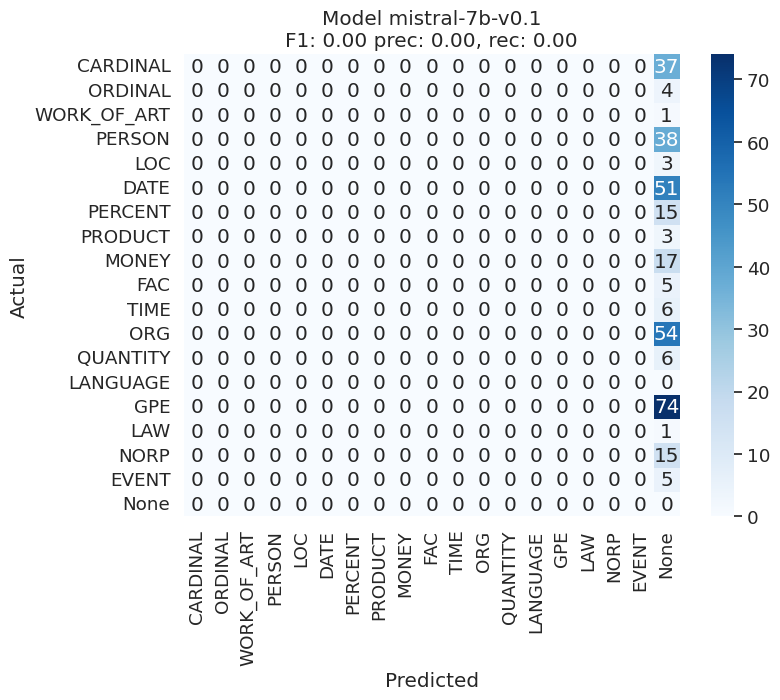

In [1]:
# ToDo 
from llm.LLMModel import *
from ner.llm_ner.prompt_techniques.pt_abstract import PromptTechnique
from ner.llm_ner.prompt_techniques.pt_discussion import PT_OutputList
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_wrapper import PT_Wrapper
from ner.llm_ner.prompt_techniques.pt_multi_pt import PT_2Time_Tagger
from ner.llm_ner.few_shots_techniques import *
from ner.llm_ner.prompts import *
%reload_ext autoreload
%autoreload 2


model = MistralAI()
plus_plus = False
pts = [
   #  PT_GPT_NER, 
      #  PT_OutputList, 
      #  PT_Wrapper, 
       PT_2Time_Tagger,
      #  PT_Filing
       ]
results, results_df = model.classical_test_ontonote5(pts = pts, fsts = [FST_NoShots], nb_few_shots=[0], nb_run_by_test=3, plus_plus= plus_plus, test_size = 100)
results_df


results[0].res_insts[0].analyse_results()
results[0].res_insts[0].show_cm()

In [ ]:
# ToDo 
from llm.LLMModel import *
from ner.llm_ner.prompt_techniques.pt_abstract import PromptTechnique
from ner.llm_ner.prompt_techniques.pt_discussion import PT_OutputList
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_wrapper import PT_Wrapper
from ner.llm_ner.few_shots_techniques import *
%reload_ext autoreload
%autoreload 2

model = MistralAI()

results, results_df = model.classical_test(pts = [PT_Wrapper], nb_run_by_test=4)
results_df

In [ ]:
# Running
from llm.LLMModel import *
from ner.llm_ner.prompt_techniques.pt_abstract import PromptTechnique
from ner.llm_ner.prompt_techniques.pt_discussion import PT_OutputList
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_wrapper import PT_Wrapper
from ner.llm_ner.few_shots_techniques import *
%reload_ext autoreload
%autoreload 2

model = MistralAI()

results, results_df = model.classical_test(pts = [PT_GPT_NER])
results_df

In [ ]:
# ToDo 
from llm.LLMModel import *
from ner.llm_ner.prompt_techniques.pt_abstract import PromptTechnique
from ner.llm_ner.prompt_techniques.pt_discussion import PT_OutputList
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_wrapper import PT_Wrapper
from ner.llm_ner.few_shots_techniques import *
%reload_ext autoreload
%autoreload 2

model = Llama13b()

results, results_df = model.classical_test(pts = [PT_OutputList])
results_df

In [ ]:
from ner.llm_ner.prompt_techniques.pt_multi_pt import PT_Multi_PT
from ner.llm_ner.prompt_techniques.pt_get_entities import PT_GetEntities
from ner.llm_ner.prompt_techniques.pt_tagger import PT_Tagger

from ner.llm_ner.few_shots_techniques import *
from llm.LLMModel import *
from ner.Datasets.Conll2003Dataset import get_test_cleaned_split
%reload_ext autoreload
%autoreload 2

seed = 10 # random.randint(0, 1535468)
data_train, data_test = get_test_cleaned_split(seed = seed)

In [ ]:

fst = FST_Sentence(data_train, 3)
pts = [PT_GetEntities(fst), PT_Tagger(fst)]
multi_pt = PT_Multi_PT(pts)
llm = NoLLM()

In [ ]:
llm.invoke("Jeremy Ferrari is a french guys that lives in England", multi_pt, None)